In [32]:
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np
from gensim import matutils 

In [41]:
# 1 # txt = 'msa der fds mll aia qqh dgi dsi ldt ffs flg rkt dff tqp qka res vqr ale rhl vra eer lqk kqt eea lrk qka aas rve vle dee eaa ska aak aaa eaa krk aem eka ana van ake ded gmk pkg lpp tag ngf dye hym fsq tlq eve vrv plp ian akg rdl div lqq rhm rvg mke ktp imq fcl rqv afk dnp tas ddv cgi wrq grp heg gdv qkl vam hch fgt knr sna mkk yih srt keg tni idl hmt wek lil aar via ave npq dvt vcs trl fgq rai fkf sql vgm sfl agr fip gtf tnq iqk kfm qpr vll vtd prt dqq afr eas lvn ipv iaf cdt dap lef vdi aip cnd rrr ysi smm ywl lar evl rlr gti prs vpw dvk vdl ffy rdp eea lkh eev nqa aap vae vde gfg wve rdn naw gav sgg hst rhe egp cns lrl gvr nnn chl fcf lfv fwm lea qvq qan lwk rli eci sgl vne anf dcn pgg lsi qam dts hva lvh lll rdd cft kyq cer nsi lgl nla sls kvl kiv egs dsl tlh hed dsd vvv lts env eks rkc eyq lkl lei ege amg ipe mey gst vtl ssq efa kiv rdm svf get vti eir keg vkf sss gdv geg yaf lra agg tgr tvr tap evk kee ddd tpi gra nas gtk nsh tai gve vrt dep vtl sfa lrf mnv fak gst lsd rvs lkf apd spc mve fni dqv gyl ryf lap kmd dvm mtt ite afs gfa vpd lda ada fyr dvl gla ver dam gis tlt lpd gtp ilv ypk pdh rpa vyt iln fvv pdi daa vad lts rgi ell ryd gfd hde kgi vrs tgd gpt icw ftd pae nvl sfi qnm gyw sgs fre ian shi ldv hlt nal igi sag vdi pii tmv grq lgc sen via tyv alv aic rvv adv psg vla dyv dvr rli sws vfv lai gca ipl vlk pdt ltl gif gvl sgf stg vff lsr hiy var isk peh rgi vls fla gvl rls hvl gpv mlg ava aec kng rff fav pls aal law lcv eva rcr gat hea etg yes krl lpt apv aiv taa asd set vpm vps yes ttv kcs ggc rgc eqs tpv amp rtq vfs cts kgg dds psw ycs lws tiv enw fti wrl gly ivl yva lra nrk lll'
# 2 # txt = 'msd lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp ppm sgg lpp pps sgg lpp ppm sgg lpp pps ssg lpa ppt stg lpp lst gvy tps kki saf ggn tri qda gpe ptl lrt caa cqq rit etf yvt cgd yyh qnc lkc shc qtp lkp ptc amf rge llc mrc any hge lrk cqv cdq yly die eri kpp gfe hai ham yvr ndc ktf rfc rgk crk fwm kkk npr kfk wtk ayr aaq gkd lvv dst fdf eqr rnr pik ydr niv aqt lrt irl ide irq qre aah wer rmr taa tie trq klf dia qni nli ehv pev vre qtq rae aei neh kam ile err qkr lqq kqe ngn ndq mkq kei nsp kde nne kys ske ekd tsk syd ikq sal sss sed viy rts kgi sid nyd pkq pkp ftd plt kqa lkn lgi spn dlf ypt ead lnr ytt dkt mhs kir qnl idr vgr tae fvr ner drl mri ppt prl mtt yer ktn ene hkf sel eks rmd klr ekn khe tek lil sll iek eli ees nde qer ykq lkr qhd eel ker qre qhq lql kri kqi eek elr nhk efe rkr kea dek eqk fiq kka eie akr kqh cme iek erl rkn qea qri tre lee krr kqn dem qqq qei ker eyt akk qre kke ree kik qne rek qer iqt ilq nnq nil eek rnk tne kak kqe daf mkm kql rtq emi llf ips iic dkk pkh aif yyg qsk yip phl dnf mkh hes yck gkt sdr kcd kgn sii fks ksi ify kga nel snl and lsg ies avi yve dmd hpi tfd lsk vti pkl giy nlg ftt lik nad isk tip via lkn ivs vts gtf vvd qiy aig tqg nvk anr yig epd nkd vvt tkr qyi ftn pie iii ned hye ian qys ngv rky sfk ykd dvg ill npy edr vik vtl asn cke nsv ini fie dpm sse shg eev pha qsk flq qrl gsc kpf ytp cvs sii fii ltv vsl afg lpi fla sdg lwe aiv ryd dkc qig tvc nvs fdv drd lkk tql ffy yql tnf fqn nfl yms skn wdq fsg efv tsd nld kcd pmr vnd i'
# 3 # txt = 'myl lms kfl vwi iif gnf fvv hff lcf kip nnk itn vlt ydn skk qri nsr hnt fly knd tln kll nrk knk htl fyr skk ekd iqe sgy lyp fdh lek kkt kfp pdp yip sed eke ssi dif hdk ind ddl miy edd dda kky fgk ttf nkp nii qkd ens edd qdd dln dqn ddp inn ptn nlt dnp tnn std npt nns idn ptn nsi dnp tnn sid npt nns idn ptn nsi dnp tnn std npi nsp nyq qvt qsn iil dhk tvd pei vev eei pse lhe nev ahp eiv eie evf pep nqn nef qei ned dks ahi qhe ive vee ilp edd kne kve hei vev eei lpe ddk nek vqh eiv eve eil ped kne kvq hei vev eei lpe dkn ekg qhe ive vee ilp edk nek gqh eiv eve eil ped dkn ekv qhe ive vee ilp edd kne kgq hei vev eei lpe dkn ekv qhe ive vee ilp edk nek gqh eiv eve eil ped dkn ekg qhe ive vee ilp eiv emk sfi nit lsl fll hly iyi nnv ask eiv kky nln lrn ail nnn sqi ene env ntt itg ndf sgg efl wpg yte elk akk ase dae kaa nda ena ske aee aak eav nlk esd ksy tka kea cta ask akk ave tal kak dda eks ska dsi stk tke yae kak nay eka kna yqk anq avl kak eas syd yil gwe fgg gvp ehk kee nml shl yvs skd ken isk end dvl dek eee aee tee eel eek nee ete sei sed eee eee eee kee end kkk eqe keq sne nnd qkk dme aqn lis knq nnn ekn vke aae sim ktl agl ikg nnq ids tlk dlv eel sky fkn hmk ttl fcs isf cni iff fle lsh ehf vgq ssn thg ass vtd fnf see knl ksf egk nnn ndn yas inr lyr kkp ymk rsl inl end lfr lep isy iqr yyk kni nrs dif hnk ker gsk vys nvs sfh sfi qeg kee vev fsi wgs nsv ldh idv lrd ngt vvf svq pyy ldi ytc kea ilf tts fyk dld kss itk ine die kfn eei ikn eeq clv ggk tdf dnl liv len aek anv rkt lfd ntf ndm apk grs tne iel sar dvl eni gig iyn qek ikk npy eqq lkg tls nar fhd glh kaa dlg vip gps hfs qly ykk htn ntk yyk ddr hpc hgr qgk rfd egq kfe cgn dki ign sdk ygs cap prr rhi cdq nle fld nnh tdt ihd vlg nvl vta kye ges ivn dhp dkk nng nks gic tsl ars fad igd ivr grd mfk pnd kda vrh glk vvf kki ydk lsp kvq ehy kdv dgs gny ykl red wwt'
# 4 # txt = 'mrs aea ngt plg api lcq vrt gga tgs rlv gti hir lns slg dvr lll rsl asr arg das gps gle vhg apv nvt qge wkk ams ypl hpf dls laf sfv kcg gcl piq qqh eek lll vdv fpr lpr awg mst vag wim ept ppm vkv lar pge yvp yrd ala vvf iaq gep enl mpe dvl ver qml qqc syg rpy qlk elf tll nqw ngn vkd cfg rtv lhe cvy qgh lea vas lls fsf irv neq diq gkt plh iav rvg nel vvs rll mqf clr qva fkd npt asd dvc giw rqg rph egg dvq klv amh chf gtk nrs nam kky ihs rtk egt nii dlh mtw ekl ila arv iaa ven pqd vtv cst rlf gqr aif kfs qlv gms fla grf ipg tft nqi qkk fmq prv llv tdp rtd qqa fre asl vni pvi afc dtd apl efv dia ipc ndr rry sis mmy wll are vlr lrg tip rsv pwd vkv dlf fyr dpe eal khe evn qaa apv aev deg fgw ver dnn awg avs ggh str hee gpc nsl rlg vrn nnc hlf cfl fvf wgq qhw tfa nsa tha gct npi ile wea gki imi tsc esd rrr vye std kgn twt eal gtl srv wsn sla glg lhi qsg fit ati ggk kvi llt qle ysr hds kge irl wlt dan riy nvg lla tgy gat sss lly add rly cly eas ggs dsg aff ldl tse lqr irh ald twa akd nal gkc ssi asd aal srw gcs vpf pta glv ghl adr fsg hkw ede ylg vna vvr gat kkv psg ltf egq gag aew pvd kqw ptr plh fan ygf tla atv sih evp kgi tpl mgl krm gtt tll gls ydk nme wsv vnd lfp khf taw evd kty hvv lkm hdg vgs vyv dgt llw nmr lkn sfn egl gtv shf yfg ayd eql ssg kih atv anv fly nrp lne tei gal nas kvt ipp per kpv paa aat sss vep ane rvt tnt qpt vps pat agp qqt dqt tln ass vps gga psk pae pks aep epa epk sag pkp aep ksa mav mfs aff icp rrt ntv paa fmt hvp fll llw flc gap lla var thi imd vdg svd dya slt tim qsp hlr sql sli tis gmt wgh aat var nic rff lls qlk gvt vsi gal qat add ynt vls rgg crh sqg fps tph dal rrg mpy sra dvt ssf gaa ysf ppn sfd vrv nas eal hal lng msv dds vky faf asl tnl asa lny ler hdp drl qrf kqs avv hif ekg ysl avd nvs tsq vla epe lrf vly mps fyd paa afs fss wse fgn lak dag ask ava wlf saw eak kal ves rsd dpl kaf fke rgm aih atr rwt egl lss fsm ilv sei gdk tff iac lma mrh skv lvf lga iga lag mtv lsa lmg lvv psv lsv rvt kml avv lff gfg gki lyd efa krg qgd aes dde mte aaa iir kkd pnd ave ags iss tga gca rrh wfa fhp vma evf alt fva ewg drs qla tia laa akn pfa vti ggv lgh avc tgv avl cgn mta ryv smr svn ivg ggl fiv fal atl yel vtn thh ide mrq qkk e'


##### GERÇEK ÖRNEK PROTEİNLER ########

#entamoeba histolytica# txt = 'msk nvk tnf pdi lkp sae dik mmv acr vhi isn etp sdv vav agr ema hra slk fmk ytg apa sye nve gkw kpe idq hcp nvp iil vgt kid ird dpe kkd apv iag eek vak ved kka asd atv ast ewd dqk knm rpv klv ivg dga vgk tcm lis ytt naf pne yip tvf eny qvk rla ekn ivp iqp pqg del akk iga vky iec sal tqa nlk lvf eea vra vla kaa kep tgk kek ggk kgc slf cta vag rft pgs ftn qiq kkf mep rli ivs dps vdh qal res gyi nvp tia fcn sdn slk nvd iai pcn nrs rls igl gat nln fam eey vye rgn nne cif nlm ktw ekl sla arv iag mww mlt rei lry qgk lar dek wdv mvd lfl hre lda nss lvv ddv kin lgl wdt agq edy drl rpl syp std vfl vcf svi msq ekk vks sii fdi eke fqi gtl qpk sfd ene qee eem dke dlq qit spi kev tqm eei slv ees hve kkk tnk ste eke qnp dqe iqs qte kke snl stn qei ied kts eik dkt nei ied kpn eik dtk eaf snt its sqk egt tei nvq etp kta een lek nlv ees kqq ike vea lpq eht ttn kel eis dit sne src sef esk igi trk ene ens lgi sqt tpk kik krk lsl vgk kig eet ecq ikk pvp ats inl fns sil qpr gtr tkt lpc lns ngr lcs let dme kde qsa ysl lqn thi nln qdm nnd int shi vdn vdi qkt tne sqs snq nqv eed eie sem rsi qln mrl sny rns tnk nek ven iee ekn sii lth end lid kke sst isk tfs aqe qik asq cre sli hte rlm atv kdn ihq aee kvv stv kyn kie tpr kra svs rit lld dpi khq kte fng ike dii phk kes vtr isd gsr fsv kkl pie tqt pnh nkn eei sgi ssi srl sdk mre etk psk slm lnk nim dnn tkt aii ihp dlg igg yid nlc gka sgf lgt lce kil sfg vde lvk lie nhv dpv vvc eki hac siv vns lyt qsv yek afp shs rtp qvl ypt ynp ile esm nse spf eee pke grf qvf vhg dfl knf sne ere ylf kka tav lyt aer lvv dia lal ehe dyd vkf yts hhd keh cfp etk aqa vrq ppf ehf giv ple ami kgv pvi acn ngg ple tvq nel tgl lcd gsk egf aac isr lch dnn lrq klk lna kka tke kfg pit lfg yfy iff ati ral yls iiv awk tna diy ivd qis igv pil klf nkk vlf ych hpd kcl cke ggf mkk iyr ipf dwl eek smg lsd fet ftk kvs evv hqv isn mra iif vli fai afa atr ega ilc nlc kdt vkl ven llt vdg efw fis inr yeg kkn hkv ale als lle ddl knn vri iia ggy dlr vke nkd vyn ele qls hql hie dhv sll '

#histomonas meleagridis# txt = 'mkk kea dee kqn ein eke ike ene fdd wig ekq nnk tnn etk sen kne nek hfe lsi gdd ltf ndd ntf ndf lan ene ndk tke nei nek ese ekk ien eik kel eis idg lge sdd eik esk nvt nek enk esn eti enk ite nns nen ekh nsi vgk eti pdd yks idi dql fdv fdk get een eai rne nes kei see ntn dye vir nei tek enk eev ine vne ien ken aet nhe ekk nen yeq inv vek enk eir ptt air nen enk eit etg tse nnn eei gne ike een evi rne tne ken kee nea irn ene nke ite tgt nen nne eik eei knr emi ekl tre hpe faq qla kaq sgk qne iei arn etn eks esn etn stk ane iqn drn nei idn gtm psq tka dst nnt kan eqq ndk nse iid nst vps ptk adf tne iga nda ers prp spr rsf asp han tsk rrt aas rrs srl tki glp kqn gvk eee isd ink saq svn enq iia nei evn enk tvd die ske etq nei ddn tqk eei iet kte env nnd tks dem nfe dfl net qnn env kle vga nes igd nsd kei hnt ein etk eek sev qsd eki itt ene vhy nse thk aet nti lev aad fap laq est apq apa qhv pde ldg ied ffg lms nel pyt weq tle dvt vsv ive agi pgk mvn cqi kkn hli vgi kgk tpi idg dls eev kpg mqv nvt vhg pqg afe ypf efp lpl nlp gvf hek ggd nfi dsy ykf ivc cdi pga acy pla qag gny mgh amk asa ema ndl aev hge imh dmi kqg nmp pea mnd mmq dmg dmm ggm gha ekv kfq evv qes tge gen ahm etk fke lke ske ffn qtl vpy pta gii kke lkk aag fid ksn kir vel inp tgt gyy vgg dvv rgk ihl ncl vpf acn gvi lkv kgy wka gsg  wea kve ykf iat vdv afl ndl kdk vkl iin ekf dqt vrp sya hde kkf lig dgk itv din ldk nay fpg erv lck lqa nnt sak ctr klv lkv fry vhl kaa gks kdi etq vqr ihf pgf apn fyg vrw lpf yip vnl pps tks nfi dsy ykf ivc cdi pga acy pla qag gny yqk ppd qms eil efv vdy sss ttd fka lls pes ikk gfl gkt taq lkn eee ktp nkk qik ivn dip kat sie fsp ild tik pik gpy skl lev sni sfn sfp irq nlv ipf npf ask ank nqi ess ess kea agi knn sfi eii hsk fsv las vss stn vsp qsi lls rsl rvn lrc flg env ycl nke eia lcm psg sgk tfl aqa lrt etp ini ili eet vmk kah akr dpf asv kkk qfk sse sse evk pkk nal rkd pfa svi nkn krn hkr avp ffr yne gip hha qgk fsh knk tkr rdp fas vtn nri ief kvt ect pnd gcv its qdi ikv sdt pve rdg apc frs tsy ddv agl nni ise irs iie ppl iqh rlf qtn qfs nks kmk sse fas vsr keq ies ses sde ikp kkk svr kdp fas vpn kkq iei ses sdd nvk akk tsi krd pfa svs rnq ids sns see eit qkk kha kre ewg cps srw pek sak lfi kli kna lag aaq kpe inv dnl yiv hvq cny arm yry rri hqa hgr vkc yas ppt nvq qse ssd ssd eip ink lsv krd pfa svt nnq ies ses pdk ikp kkn ttr kdp fas vkn nri ess vss ddn ask rke lsd sse evk pkk nal rkd pfa svk knq ies ses see vkp kkn air rdp fas vnk nqi ess dss eev kpk kna irr dpf asv tnk srk els dss eee vkp vka kkt svk rnp ses sed ftd knk npf sfg kcs ell vsf dal tsl ngy fke iis krp cig yfd dfd fva tns ipn ede ads klp dal lng idr lre mkg vli iat tsk stk irs dfi hkt rfd kvl tvg rpn eke rls ilk ilt ksm nvk ngs lek vse itn hkk aaa krd pfa svk knq ids ssn akq nes ses sed dia akk tsv krd pfa svk kkq nes ses sdn ikh kks knl srr dpf asv kkn qie ssd sse efs akm sss ykn pfk sat tnk tsd sgv kei ksk rnk dda kqk qne tlk nns rkd pfa lvi dpf asv tnk kqn sss esa see fak drl pmn nak rdp fta vpn kkq sls seg psk qqt dkr dpf aav plp nqmcve sds ees mky tyk sng apv lka ctp ter vhf kpm fet gra ing mkv ska lay lea vie ivl aek kap vka ak ets ekk tlt kkd afa psn nqn ksd sne eei vtk knp fas skk qer tsd sse eei vtk kns vkk npf asn ktr nks sds sde emi svk rdp fas apn kkq ies ses stk hqn kak rdp fas vpi kkq dks sds see eii skk nti kkn pfs vnk ssd sse dei stk kdp fas ask kkq ret tsd kgn sle kvt sen qrf hsd ask ikn pfg ttf dns hls trf skp tkv vnl '

#trypanosoma cruzi# 
txt = 'mlh eip sam smt etf afq lhd asa saa erq ega qgg rvv vtf ftt sfp ktm peq sys vpl dtl pdg lnt lvq svl aee sqn fdf lln dey itt slq kfl vrr gis yee hlr irv vpd kan ktl tve dtg igm tka elv nnl few sql lst etp pns kap lis ftd htr pvl acr fsa tng psl lys agl dga vka lsv eqa vll sny egd gti ars gtk afm eal eag all tld tmh tdg vld vty vgn aqi asg gkd nkt kif sls hgd aei nql msl iin tfy snk avk ptg ggg dli iaa ctd nra rly dtr qkn tvk afs ghr qwl yaa twm wrr eeg eqg gph lfa lln iey lck amk dvl gdk vek vvv ser lat spc ilv tse fgw sah meq nss dac dki ryq slt nqa vlg des tas qds tvr eif lre lis smi gqf gvg trd pkd vtk eey aaf yka isn dwe epl stk hfs veg qle fra ilf vpk rap fdm fep skk rnn ikl gdm imr nqa lrd fys ayl vad rvt vvs knn dde ayt wes tpa mqa keg sll phd dwv ssv rap flg cad lll tgs ydh cvr lwd gen cva lgt yht ecv kev clh pvr pmt sst aak els rkr kra akm edf mcv scs kdg siv awr fes gvs kfe plg aln phm dgv dsv dis pgn gey vas asw dct vkv hpi qgi vwd lrs ssa yvr rvf imd nce dlc pew laf vrg vvd egv hfe ete eek kqr eee kta yer sag gtf tvt ptp dcd lkr gtr ivl hlk edq qey lee rrl kdl ikk hse fig ydi elm vek ate kev tde ded eaa atk nee gee pkv eev kdd aee gek kkk tkk vke vtq efv vqn khk plw ssm say mms kkt mei npa hpi vke lkr rve ade ndk avk dlv yll fdt all tsg ftl ddp tsy aer ihr mik lgl sld ded ngn eea epa aav pae pva gts sme qvd sed lpl nis ren lqq nki lkv irk niv kka lel fee iae nke dyk kfy eqf gkn vkl gih eds anr kkl mel lrf hss esg edm ttl kdy vtr mke gqk ciy yvt gds kkk let spf ieq arr rgf evl fmt epi dey vmq qvk dfe dkk fac ltk men fhw dgi dpr gsq csv rlg srf scr ssv rge ght ide trr kqr vir lkt klr det emr eae rer aaa eea ara alg rry sar npv pra ake rrg vme aat aes nsh das iav nra pvs gia trd dpd plw ngy fsr rcd scg sat sfg yev ehl qkk mae iqr qea elq fkl rra qdd vaa ymq eer era ars kie rek hed wms ira ler ger mqy mtd eer taf fqr eam kgv kpk pka kkq qrq svr tna sgg kfg pag sns srr ple aet nss vda wge iqp lre qle rqs sal krf sde nde ara dae nar qmq rsa een flr evk ran des alr kla esr aes lek rve emr tem eee vqr mkk ead knm smf ren ekq lts lre qlg dvr ekn erl qde hkq lrv ekn ava tra knp ppq sve lqd qap rde lnt ett rrk edm qgg vrt aka iad asy and sas skk lqt eln rmh arm ees edq kqn aia mae slr qkr gsp rkl eel stq slh pkd dss lrr qle qae kea erf rae ara arq eld dar vny gre its lka wca rld aqc krq mse pmr rea dkt tev mfn fvl dvw rly gcl sfc lsl tff fff lls flc fvl hss cre gqr htl asc kkr vvg alr rae rge srg gev cvk nsy lcn slr mry srs rsr gar gra rtr rky rav isl lvl lfc lyl flr ilp pra lat ird dsg fli pgg nts svt vvi tel rvs krl ell lpy llr ryn gif atd krl lep elv dav spf ctl fhr qaf dav kgf dsl sfs ent tls rap dia gwe ysi flq rey kew qvw ssa afg iid egt slp ssl lql tep asf saa nla gsr lkq als rra wct sss pms lvs lvm lfy app dna sws ggi pvs iqp hgd sgs wnl wsv dla dnw gae hfd tlq rlh nrr krg ire kyn vap cvm ear vlf aas agk ves dsy gmd laa vrv alr avr rtd yfv lla dfv rpk sdd fme klf lps rrn ggk vsa vqc tll ekk stn teg idk gqa vvp dal hvv sdr gvf vgl aal trr erc lrq paf paa lql ycs fat pyr krg eed tvd kpl spl lff ard ync scc glm rev igy lrp lte rya vsf lrg lcr gfc sda vgs rkg wdv llk ayw kaf gps spl hnn vsl ylk vkw iql ysg gag nhn ine lig nws ekn lpg fts med mph ivf lsg lgy vge qsl lpd vnr wer vvn sqr ite dry alv eee gvm hkv nwg lyc erl ete lka sle rlp qyt llm kav pss wkk ldi eis vvr gls lre ama qck lsm rkg hqi vfr ale iaq qga eak gle kdn lri ahi scf pgp tdk qid irs rgy yaw ktk rss hli elv sle ltd elr aen fft sfs nsv kwq iay knr pki vim hlr aps ykd vha slp hkm dyf igr sls efs lip rdw vdg mhr yad evw atg eff rtv yrr sgv aae kih vvp esv nih ryn pln crp psf pls lpt ayt nrp gls ped lrr rfr fls vmk wem ltl aed pem vlp drt sip yas lls mkr agl ste ptv vda fvf ptr aeg wgl pat eam amg ipv iit nwg gtt tfm ppn atf gir vdg lee vps gag yrv fra nkw alp svq dta elm ryv vdh peh arr vgk rgr rhm eey fse eii adl fdm rle aav rkl rgn sqr gtk dth ads hkr gea qkk ere ggk ggr mpk pap rfa mgh ilp rrt nvg sqf lyt qkh gar nvw ykk qyf sir pfa iqr hrg ttp ril ldr slw ksv wlt kvn'
liste_yeni = txt.split(' ')

In [42]:
def var_mi(dizilim_1):
    for i in range(len(words)):
        if dizilim_1 == words[i]:
            return True
    return False

*******************************
1: Entamoeba histolytica
2: histomonas meleagridis
4: trypanosoma cruzi
******************************
Antijen Tespiti Yapılacak Türü Seçiniz: 4
Seçim:  4
Trypanosoma Cruzi


<ipython-input-43-2cb2a8b4698b>:335: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model_4[model_4.wv.vocab]


Tahmin Edilen Antijen Dizilimi
******************************
scr ssv rge ght ide trr kqr vir lkt klr det emr eae rer aaa eea ara alg rry sar npv pra ake rrg vme aat aes nsh das iav nra pvs gia trd dpd plw ngy fsr rcd scg sat sfg yev ehl qkk mae iqr qea elq fkl rra qdd vaa ymq eer era ars kie rek hed wms ira ler ger mqy mtd eer taf fqr eam kgv kpk pka kkq qrq svr tna sgg kfg pag sns srr ple aet nss vda wge iqp lre qle rqs sal krf sde nde ara dae nar qmq rsa een flr evk ran des alr kla esr aes lek rve emr tem eee vqr mkk ead knm smf ren ekq lts lre qlg dvr ekn erl qde hkq lrv ekn ava tra knp ppq sve lqd qap rde lnt ett rrk edm qgg vrt aka iad asy and sas skk lqt eln rmh arm ees edq kqn aia mae slr qkr gsp rkl eel stq slh pkd dss lrr qle qae kea erf 
******************************


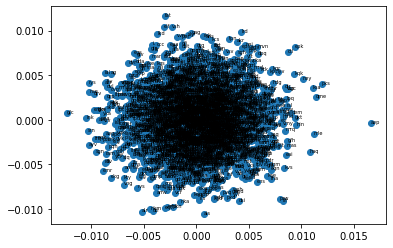

In [43]:
################## Tür Seçenekleri Gösteriliyor #################3
print("*******************************")
print("1: Entamoeba histolytica")
print("2: histomonas meleagridis")
#print("3: plasmodium falciparum")
print("4: trypanosoma cruzi")


print("******************************")


########## Antijen Aranacak Tür seçiliyor #############
ant = int(input(("Antijen Tespiti Yapılacak Türü Seçiniz: ")))
print("Seçim: " , ant)

########## Antijen Yapılacak Tür Seçildikten Sonra Seçilen Türün İçerisinde Antijen Tespit Etme İşlemleri Başlıyor#########

if ant == 1:
    print("Entamoeba Histolytica")
    
    
    text = 'icq fnl rcl efl ksy isr kem yfm lcl idh iis nye pfr kgf atk etf enf rqv aqy nnf sif skk nsf lse kck efa yqw riy pem elf ahw skd hlp inp evk isn gsl est art vee yil lvg dil eey eak kkk pkg ydq lik nar ely tef tes lde sif nge ine kek ael nel eed frt ils ime sqi epn sfn eke ykk sks alr yts ski flr eet pki ise ivl krs . icq fnl rcl efl nny isr kem yfm lcl idy mis nye pfr kgf atk etf enf rqv aqy nnf sif skk nsf lse kck efa yqw rly pem elf ahw skd hlp inp evk lnn gsl est art vee yil lmg dml eey knk kkk pkg ydl lik nar ely tef tes lde sif nge vne kek tef nel eed frt ils ime ski epn sfn eke ykk sks alp yts ski flr eet pki isk ivl krs . mrl sel vks aid nee vnp slh rfn qil hvl ksi pka vps lic qfn lrc lef lks yis rke myf mlc lid hii sny epf rkg fat ket fen frq vaq ynn fsi fsk kns fls ekc kef ayq wri ype mel fah wsk dhl pin pev kis ngs les tar tve eyi llv gdi lee yea kkk kpk gyd qli kna rel yte fte sld esi fng ein eke kae lne lee dfr til sim esq iep nsf nek eyk ksk sal ryt ssk ifl ree tpk iis eiv lkr ses qsd ysk tet nye syp vqr ess srv sps ilk pla dyg iln pvs rka gpm tyq mle dd. gsi kei din eyr gky vvl lfy pld wtf vcp tem igy sel agq lke inc evi gvs vds vyc hqa wce adk skg gvg klt fpl vsd ikr cis iky gml nve agi arr gyv iid dkg kvr yiq mnd dgi grs tee t. gsi kei din eyk gky vvl lfy pld wtf vcp tem igy sev agq lke inc evi gvs vds vyc hqa wce adk skg gvg klg fpl vsd ikr cis iky gml nve tgv srr gyv iid dkg kvr yiq mnd dgi grs tee t. ggv gkl tfp lvs dik rci sik ygm lnv eag iar . mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. ifg nkp img gpa pir pkp veq kne esn eet iei rhd gki srr svs gpk grr rpt mkk iqf deh ter lmk ein dnk tqe snk eri qdl ldg kev kpi rtd dik hqe vde stk evh vla kkk rki qgi vmv lll kmi nhq alq ilv pkr mil kkm iln irn k. gcc kke cqe kec cke ccc pri kaf kkf int fek aqi gke ape fka pay cpc gsi kei din eyk gky vvl lfy pld wtf vcp tem igy sel agq lke inc evi gvs vds vyc hqa wce adk skg gvg klt fpl vsd ikr cis iky gml nve agi arr gyv iid dkg kvr yiq mnd dgi grs tee tir ivk aiq fsd ehg avc pln wkp gkd tie ptp dgi kky lta h. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp nes snn kps ess nnk pde ssn nkp nes sdn kpn ess nnk pne ssn nkp ses snn kpd ess nnk pne ssd nkp nes snn kpn ess dnk pne ssn nkp gss sdn ydn lda ass pfi vlf aii vvi lf. msr iii knl per ade kil kqq fek fgg itd ckv mrt pqg vsr kfg fig fen edq aqt ait kmn gay iqs skl qvs lak aig dqt ier pws kys vgs ssf snd kkr kii ptk het pti kkk kvs ssl del kki ane rrp kld dgk kkk tds edd qnn qqm eed eem ine qeh qks mde idv kdw eeg riy itn lpf nct ede frk efd rfg nia eih lpi dki tkk skg fgk vlf vvp qda vka cne mdn kfi kgr ivh vty aka dpy ssq qtg esk nyk ekk pne lka kag nqi . sls tct rsl icq fnl rcl efl ksy isr kem yfm lcl idh iis nye pfr kgf lke lkf dsa ii. pit lnf dqr vda gaa vaf vgr wft qhp sdw asg cvn ker lin sgn wgp lhe mnh hmq gty lrg gng gik epg eet nnv mts iny ily tni agh rkq gls gwn yvs dgy sti yki lng end qph lrs yvn iah afg tdt lia lvk syy glw yen nye gey sik rds tsa fcl laa iat krd try lcs lfk ydi qqn vse aik nmn ypt yyp ffn vya msy ngn yyg rty kip ygt trl nft att aid psa tsv sht iks glt kgk leq vee nvy dyt pnf gad end tfv lni dci vng ekv hie qdg tfe ldp hqv eye vyk dvk tkd meq aln tiq nkt sny tvt stf fgi gny ddg tmq sml vek gkl ivp tsg yyt lfm kad dlg rll lnv nge yeq lln vkt ylg gys kti ngt yat vkl ekd tey pfi lyn lnt ggq gfi rig ycy qgt eqs svn vsk csg ldi gs. mlg sks iia vva ias aiv tgv vvi vvv vtl svv ltr ssv kdt nsi yvp dvi tnd pqm tne mdt lev iss skf sgt kpk ewt mky tky pyw tcg ltf tne ekq niv nen key mns llq lin ngs lgr mpe kyg gdk qfe ang vnw ead rle vry glf grv fgq rav awa fpg eiv tik fpk gms ykg iqv gig kcn hnp sdq wln vnn wsn drm pid sig fdl gln ttq pyi ind tfk igs pfg gmi ylr sdt tft nsf yvt fsn vgr api iny nit tne ewn svl rna pgn vae irt pgn rlv lts rni rsl eda qyi sdf wlk ais isn yav tle nip itl nfd qrv dag aav ayv grw ftq nps dwa aac vgk dgl iny gnw gpl hem nhh mqg tyl kgg nwg isn pge etn nvm tsi nyi lyt nia ghr nqg lsg wny vsd gys tiy kil kge ndq phl rsy vnm aha fgt dtl ial vks yyg lwy enn fes kys ikr dst saf cll aal vtk rdt ryl csl fky diq snv sea ikn mny pty ypf fnl yam syn gny ygr pyk ipy grt rln fta tta idp kat svs yti ksg ltk gkl erv edn vyd ytp ffg iee ndt fvl nid cvv nge kvh ieq egt fel dph qve yev ykd vqt rdm aqa ini iqn ktr ndt gra sff gig tyn dgs mqs mlv ekg kli vpk sgy ytl fmk add lgr lll nit gey eql ldv kty lgg ysk tln gsy atv kle kdv gyp fil ynl ntg gqg fir igy cyh gte ess vdv skc svs dig ssm vln ekv ktg ake pef qip pik ysr ptr flt nay rti pkc lng dda csi kcl sll plk hdd ssk csn mfd dny stm yhs rwt gqg ttf pvn ytf efs env tfn nly vhh rrp eds wgy fem fvk spe tge mel lek ykh pks ttt eln fqk lvt tdr vqf ivy nns ngg nyv nvv els fni ket fkn ytn sfg pki kst gfk kvt tpg asg gyl avn eke geg slc fka kvt kfg lyg yrk tts gkf rvt ids qpg evt sqs yfs dse rtl fya htf det ean kvh nic mev veg tvn ldi igs s. mil shf ihl ifh slf yyq lke gqs gtn eqn skg qsg itn eqn pqg qsk qkg akt pst ngk qet eqt nkq gke keq ets gtn dgq hdt tke kdd ngt nes den nkp ktp ngq eeg knt tdn ktp ntp tnk pes kse nkn ddk tnn sed eds nsn kni dga scl fii lgv iit llf f. mng kqe teq tnk qgk eke qet sgt ndg qhd ttk ekd dng tne sde nnk pkt png qee gkn ttd nkt pnt ptn kpe sks enk ndd ktn nse ded lnn hkn idg asc mfi ilg vii tll ff. mfa fll fia ftt atn vip die qel kdv gly dlf skk dsn sel den snn qpd ess nnk pne ssd nkp ses sdn kps ess dnk pse ssd nkp ses snn kpn ess nnk pne ssd nkp nes sdn kpn ess dnk pne ssn nkp nes snn kpn ess nnk pde ssn nkp nes sdn kpn ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp des snn kpn ess nnk pde ssn nkp des snn kpn ess dnk pne ssd nkp nes sdn kpn ess nnk pde ssn nkp gss sdn ydn lda ass pfi vlf aii vvi lf. mid str tkq hkh enk ynd den tqh qty nrl tnt iqy ihn nih lia ett tss qga keg vts gnt atv sqg saa tvs sqg dks lsq pve gns spv tpk pas qts qtp ead sqp ssp tpp tsp ssp qts stp ttn qps qpq tns ass tst pqs qpe nnn pqp pqt kpe eqp qqp ssq sqq nqp qqq nek kdn knt tts dis hdk tvv ssd dts dnh nnl dga spv fml laf viq lif f. mnw rwl hsm itf vlf ivl ats tet fls kgq sik enr niq mys nkh krl ynv ynv hlk gea ihe vsd irq eng ehs lkq tve keq eqq dlt hkt qdq dqk srs eav tqp tak dqt vqs lpv sst gvt dst ksv sgs stv ntp tds pvk ttt nps kdn tae ste gqq esa gle sdt kts tqq kvp nts psg ini pne qnp qgq tgl sgt gvk neq npe gqs gtn eqn skg qsg itn eqn pqg qsk qkg akt pst ngk qet eqt nkq gke keq ets gtn dgq hdt tke kdd nrt nes den nkp ktp ngq eeg knt tdn ktp ntp tnk pes kse nkn ddk tnn sed eds nsn kni dga scl fii lgv iit llf f. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp nes snn kps ess nnk pde ssn nkp nes sdn kpn ess nnk pne ssn nkp ses snn kpd ess nnk pne ssd nkp nes snn kpn ess dnk pne ssn nkp gss sdn ydn lda ass pfi vlf aii gvi lf. mfs lyk ihl kge dhv klt tdk gae ept sst qst kqa vpt seq avp ket qet kgs dka nsq ahq khh nqk iqt kqq qkd hnp ssq gee iqk qdk kqs etq tps tqg gnq qke ese ktq eng dnk nne ipk tqd dak dkq ekk dnd sqq knn nnq qtn nnp ede kth epn kne nke sdt kqs nnd ese tdn std ndi nnq kni dgt scv fvi lsi lii fll i. mlt fll iiv its gtk sin ntk vih tqi ysk qhk rlf nlh nih lkg etg vde klt tdk gae ept stq stk eav pts eqa vpk etq etk gsd vds ttg ekq pkd itt eet tsa ett kqq tes qks stp kap qse nsd ktk qqq kdh nps sqg een kkq kdk kqs etq tps tqg gnq qke kse ktq eng dnk nne ipk tqd dak dkq ekk dnd sqq knn nnq qtn nnp ede kth epn kne nke sdt kqs nnd ese tdn std ndi nnq ksi dgt scv fvi lsi lit fll i. mte rki eft tnk ivf hvl ftl kqg ltg fid eli vem kae nkl iks ggy ysn sik ifs dpd gik sig sii sie pie tny kik ftl gti ike iil ieg ntl snk tka tli eey nkk len vmn qic dlr qmi lkl nek klp qne ikk ien edl iin dli sri iqc eek ika neq tns fik ekf ivi ekr ine ien kih vih nvt nns nen ekn lnd ifk krl tec ilk tnt can eli dvk kkv sms imd nde kyt kil edi sil knk stq tei sll din kkl nsl lsp ktq itk skt ept vin ykd cil ssq vek sdt qip kld thl snn nyf qsq qkt prl ese skk kkg ehk tep llf vls spk dqq hkt ksk ssl ssk pti pvv vtp ple eke kls kgk ksl eth sep sln ssk epe pkr kql hki kks nsk tmk tsi qnt gnd dik kti ein pgv lnk its vyk ets ksk tkg sgt lkt rpk asv idp dnl ken fer kqa ike kei iqn ksq ndl ifk elk ege vmh iic nen npe qqq iik wli ntv ktn dfw evf deq epk gii ivc tnk eeg lem kmr vrk lfg dip iql igl ege tas veg fik ihf hng evt den ghi lqe fkk wn. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp nes sdn kps ess dnk pse ssd nkp ses sdn kps ess dnk pde ssn nkp nes snn kpd ess nnk pde ssn nkp nes sdn kpn ess dnk pne ssn nkp des snn kpd ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mit iil fil lvn ate sii nke ern tev iht qie tke sqr myn gnn iqf kse vvn pvt stt vsp kqe kpa vvq qtq ngd aqp ahd gta qna ket tvv qpt qng aaq stk dgd aqq thd hqg eqh neh qpi per qph pyn ehq pip eqn qhp fne hql psd qtp ekq yhn ehq plp dkq eps apq dgk dnq qpn kkp edg ndn qqk dgn kei dnk tts ssd ssd nkq ddd rnn ynn ddg tts mfi ilc ati ill ff. mra rmv gpg sss sny kst tdp crf mgc gps sst ssg yrk ggn aag pma skg twa att dig kta avg adt yea gyr kgg naa gpm ask gtw aat tdi git agv gad tye agy rkg gna agp mas kgt wea ttd igk taa vga dty eag yrr gad aag pma skg twa att dsg ita pcs gte pip dsy eaa avl aeq rkl eee aan aaa eqq . mra rmv gpg sss sny kat vdp crf mgc gps sst tsg yrr pgs daa gpm asr gtw aat tdi gvt aaa akt ses gyr ags naa gpm ask gtw eat tdi glt apv gpd aye agy rga gsn aag pma skg twe att dig lta pvg pda yea gyr gvs sda agp mas kgt wea ttd igl tap csg nep vpd sys gaa vle eqr rle eea aaa aaa qq. mit iil fil lvn ate sii nke ern tev iht qie tke sqr myn gnn iqf kse vvn pvt stt vsp kqe kpa vvq ptq sei tqq akd gtt qqt qda taq qth dhq geq hne qqp tpe rqp hpy neh qpi peq nqh pfn ehq lls dqt pek qyh neh qpl pdk qep sap qdg kdn qqp nkk ped gnd nqq kdg nke idn ktt sss dss dnk qdd drn nyn ndd gtt smf iil cat iil lff . mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpd ess nnk pne ssd nkp nes sdn kpn ess dnk pse ssn nkp nes snn kpd ess nnk pde ssn nkp nes sdn kpn ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mlg sks iia vva ias aiv tgv vvi vvv vtl svv ltr ssv kdt nsi yvp dvi tnd pqm tne mdt lev iss skf sgt kpk ewt mky tky pyw rcg ltf tne ekq niv nen key mns llq lin ngs lgr mpe kyg gdk qfe ang vnw ead rle vry glf grv fgq rav awa fpg eiv tik fpk gms ykg iqv gig kcn hnp sdq wln vnn wsn drm pid sig fdl gln ttq pyi ind tfk igs pfg gmi ylr sdt tft nsf yvt fsn vgr api iny nit tne ewn svl rna pgn vae irt pgn rlv lts rni rsl eda qyi sdf wlk ais isn yav tle nip itl nfd qrv dag aav ayv grw ftq nps dwa aac vgk dgl iny gnw gpl hem nhh mqg tyl kgg nwg isn pge etn nvm tsi nyi lyt nia ghr nqg lsg wny vsd gys tiy kil kge ndq phl rsy vnm aha fgt dtl ial vks yyg lwy enn fes kys ikr dst saf cll aal vtk rdt ryl csl fky diq snv sea ikn mny pty ypf fnl yam syn gny ygr pyk ipy grt rln fta tta idp kat svs yti ksg ltk gkl erv edn vyd ytp ffg iee ndt fvl nid cvv nge kvh ieq egt fel dph qve yev ykd vqt rdm aqa lni iqn kta ndt gra sff gig tyn dgs mqs mlv ekg kli vpk sgy ytl fmk add lgr lll nit gey eql ldv kty lgg ysk tln gsy atv kle kdv gyp fil ynl ntg gqg fir igy cyh gte ess vdv skc svs dig ssm vln ekv ktg ake pef qip pik ysr ptr flt nay rti pkc lng dda csi kcl slp lkh dds skc snm fdd nys tmy hsr wtg qgt tfp vny tfe fse nvt fnn lyv hhr rpe dsw gyf emf vks pet gem ell eky khp kst tte lnf qkl vtt drv qfi vyn nsn ggn yvn vve lsf nik etf kny tns fgp kik stg fkk vtt pga sgg yla vne keg egs lcf kak vtk fgl ygy rkt tsg kfr vti dsq pge vts qsy fsd ser tlf yah tfd ete ank vhn icm evv egt vnl dii gss . msi qhy ykq ryq lfs lyd kgi lmd eea wys vtp esi akh iaq rvq qrl ffl nkp ikv ldl fcc vgg dsi qqa vag syv tsv dfd pik lel leh naq iyg van kik tvn eda ftf ikr vne adf dvi lia ppw ggp tkc rnk rsl nql fdg lqq lyq tcv nkc pnv ily lpk dmd pqd iit qid fpf erv eys fgd hkv mqv llt gal ivn . mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpd ess nnk pne ssd nkp nes sdn kpn ess dnk pse ssn nkp nes snn kpd ess nnk pde ssn nkp nes sdn kpn ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mkr tsq dnk vkk sdi sqd ive dik kve tte evk esl pte nik nne eke ehk lde kee hns eek vke esa eel fps gde dik def see etp feq nak ktn lke aki kae aae emq tni aae qrh tlp sgq eii haq eig dva tig tri rei vav lcd fka rhe egr srq eyi sll iqd mqt yys cne fla tlv vdl fgp kga vdf mea nea prp vti rvn tlk srr rel aqk lin rgv nvd mie wsk sgl vvy dsq vpi gat pey lag qyi lqs sss wvs via lap qpn eki ldm caa pgg ktt hia alm kdt gvl van dis kdr lka vig nvh rlg itn tii tnc dgh efp kvm gqf drv lvd apc tgl gii srd aav kls kse qdi kdc tri qke lil hai dsv npk skt ggy vvy stc sit vee nea vid yal kkr nvk vvp ial qdg vge dgy vnh rqy rfh psv kma krf fph iqn mdg ffv ckl kvn vth . mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp nes sdn kpd ess nnk pne ssn nkp des snn kpd ess nnk pne ssd nkp nes sdn kpn ess dnk pne ssn nkp des snn kpg sss dny dnl daa ssp fiv lfa iiv vil f. mvg pgs sss nyk stt dpc rfm gcg pss sts sgy rkg gna agp mas kgt waa ttd igk taa vga dty eag yrk ggn aag pma skg twa att dig ita gvg adt yea gyr kgg naa gpm ask gtw eat tdi gkt aav gad tye agy rrg ada agp mas kgt waa ttd sgi tap csg tep ipd sye aaa vla eqr kle eea ana aae qq. ikn lpe rad eki lkq qfe kfg git dck vmr tpq gvs rkf gfi gfe ned qaq tai tkm nga yiq ssk lqv sla kai gdq tie rpw sky svg sss fsn dkk rki ipt khe tpt ikk kkv sss lde lkk ian err pkl ddg kkk ktd sed dqn nqq mee dee min eqe hqk smd eid vkd wee gri yit nlp fnc ted efr kef drf gni aei hlp idk itk ksk gfg kvl fvv pqd avk acn emd nkf ikg riv hvt yak asp isc qqt ges kny . eke cck ecc cpr ika fkk fin tfe kaq igk eap efk apa ycp cgs ike idi ney kgk yvv llf ypl dwt fvc pte mig yse lag qlk ein cev igv svd svy chq awc ead ksk ggv gkl tfp lvs dik rci sik ygm lnv eag iar rgy vii ddk gkv ryi qmn ddg igr ste eti riv kai qfs deh gav cpl nwk pgk dti ept pdg ikk ylt ah. lfi aft sat nii ldl dqe vkd tni ygv flk nea spe kle eae eke kss sak pes ssn edn edd ede kas ssd nse sss sdk pdn isf ass sdk pea sss dkp dnk pea sss dkp dnk pea sss dkp dnk pea sss dkp dnk pea sss dkp dnk pea sst yk. eci lgg ein nvg aia aat tva vvv vav vva liv vsi glf kty qlv ssa mkn ait ttn ena eyv gad nea tna . gph mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. msc nqq kec ckk ecq eke cck ecc cpr ika fkk fin tfe kaq igk eap efk apa ycp cgs ike idi ney rgk yvv llf ypl dwt fvc pte mig yse lag qlk ein cev igv svd svy chq awc ead ksk ggv gkl tfp lvs dik rci sik ygm lnv eag iar rgy vii ddk gkv ryi qmn ddg igr ste eti riv kai qfs deh gav cpl nwk pgk dti ept pdg ikk ylt ah. mfa fll fia fts atn iil dld qev kdt niy gvf lkn eas pek lee aee kek sss akp ess sne dne dde dek ass sdn ses sss dkp dnk pea sss dkp eas ssd kpd nkp eas ssd kpd nkp eas ssd kpd nkp eas ssd kpd nkp eas ssd kpd nkp eas stn kpe ass tnk pea sst nkp eas stn kpe ass tsn snd ksg sss dnd nnn lda ass pfi vfc aii iai if. ess ssd kpd nkp eas ssd kpe ass sdk pdn kpe ass sdk pdn kpe ass sdk pdn kpe ass sdk pdn kpe ass sdk pdn kpe ass tnk pea sst nkp eas stn kpe ass tnk pea sst nkp eas stn kpe ass tsn snd ksg sss dnd nnn lda ass pfi vfc aii iai if. mkl kei ikq kke ktk ntl fmq qik ypt tis lls ygt fgk pvn gyv ein ipf ptf ikk iql vvv scf tgv klt gvt ppp vpp lti dsn idq wqr lts yls pil tvd cte niv cer snl nts fik elp pgi hrf pfs fil pqt hcp mlv lpn eer irf vye ika ivy tkv ssf dsd yfp lpm lfh tvp plq lsp skv etp fgk dsk vtl tip ktt yft ger mdi tmt lsl gkp iyr ahl slv amy tap gci hri tln stv ipl gpe pkr fli dil psv ppt ivt qff kfe hfi lie ift qig apl kif ipv tii tsq dnn irs yya kvc gvl lps tpy fgi hnr ppp pfp ssi idg lqe gvt efs gnv wln hik rcl qrt kdg dpm dev ypl ftn sml peg wit gns hne tyy idv ihk tts wkd prd inm ikp qhv lah skg vln ilp ina egl pcc skk qpe vvv mvf tdf qrv lrt epa kgs dpt ftp ktl ave ldd lre nvn vfl yvk gnp diy lgn ini dlt llp fps iie dwf ylq pip ftd nvt sgr ikl rla yle hpm alt evn pml lth vlt sln spf fpm tpk yee evd kql krm eng sir mik keg nri vlt wer ntg glv etk yen tnk gsf ker vgq lft gkk kda qee vpl idv hsl ngn cad dfe qgn dlf etg yvd mgk vte sii nsk dee lkl kas tnt snf sgs kep mis pvv vnn nde vke ikt vnq inn qei mty pil ddi dtg cqd nnn eei qke piv qen lld lne vrp dpl kgl fpt kk. msn snn tsv vtv tlq tgg iag ety cgy vty qvq kpi fvr sgi iel rle ttg iki nst pnl lpg nln veg ftt rsg sgt ydv iss yql igt fei pgl lhs msl elp pgt yef pfs fil phd lpp asy fgp kgl rar yvv dai lyt seg pvq sry vsc pvi fnl ggv pls lpk tvs lvl ktt hit vsl pkq cfa lge tit lnc sik nla ggk nde llv eli syy sff fgg fsn sil syc vks ide pfq qqi sfv ipm tts psf nnq sys ysh yir itn ksv nts ghv ege yip iti fap kpm ssq lie enq asn vek ilv spl dnl kpp rfp erc vng fek irl edg kvv yvd hfk rlv yen eng tps qvp ypc yes ell ppg ltf gyy knq ryi vdf cnk qtf fef qrp ipc vsq asv ndc snp vvs ihv iet igm ktk kgk spk tll cav idn ngk llk ske skg vdq typ kss fil npg ier rnv viy ffe kka lkk dti igs vsf dlt kik fgs hfd gwf dlk gsp fgn eyv cgr ahi lfg ydr seh nin gqw ihl ndf cse ilv pyy pnd dam kki idq qne lrs kkg vsp iyd tsk gcv ipi kya df. mty lei stq hqh nln nkk krk dqp kkk idn vfe aet kkq evk aqg skv ssk iea lfs tke epk kkp vsd nei kse kmt ktq tkt kle gif gnk pim ggp api rpk pve qkn ees nee tie irh dgk isr rsv sgp kgr rrp tmk kiq fde hte rlm kei ndn ktq esn ker iqd lld gke lkp irt ddi khq evd est kev hvl dke eke dsg dsd gfv ied dqp sst tni sak end ike ndt ehk eqv ksd dtt vid eif esk eed kkn eed iik ksd kpi dns kic sef dfd dff . mld ffi tlt hpg hil gep iqg fvt vtt nsp tfi kgi tvf ieg vfn thy tet itt tet dne gkv hqt tre vet pkt tii yss pky pvl eel hnh nia ltt ela pgs ysy pfv iql pkg ips ssf fnd rdv nvq ymi hce ltk kng skc rsd gfv ipl cvn pdy hlp rpr vfc dns sgv niq ltl sdd sps vgd ivq mtl qct nll rdq lel ras fva thn ykt tnv nsr sse fvf qpi lth sts tlv gtl tip ldl ptt ths gef sin tyv niq gka grk tid ilf pve igy dik gpq lmt ers rlf ggr rdf tkt tgf yga hfr mpp syq tvv dkt lap gie qil tvd qqp yyv shf trq tsl tpd mnn pca lpy piy naa mlp pgw sig qdy gew yfi dhn tqt tsw idp rpl eqr iip hii kgk ear fev eiv kai glp vlg wgc pdp yac vwd sne nwi ktn kqs nsl dpv ftk knk isi ivs ker tnv vvy lyd yhr igw dvf mga vnf dlq yfp pdv iiq dwy qls nfg nks tav tgk vll kvc ykv eqt nei ptv iin ghs ply rdy ypd tcv vrd qik kqn elr kkk kmr enp mmd yeg hii cmt pfl . mpp tik fvf pfh qfl lgq mvd gkf ive tkh nlm vvt tti ayv cve vvl een eki ekt ihq htv vik ssn epf iik dgd efp fhi svp idl ppt ikn dcv sie hrf iat vvk akt tsf fgq kkl eeh iiv dml yph lsg lsy ftk rhe fsv egy sls vnl erd iys lgq nlr vny lle gsa ekd vql pll msl vrt ftn rst gem avi tkh ddh iri nqp isl eit vpn tic ptv ksa ise vnv eys liv svd mls lcc kri qie gki pil itd mqq ssk snf nei gtl itp nef nen yke qln svl nny qmv lqt lld mkf ykd fvv pdc pnr rmf nin qyi slv kei les ils lvi npv twr dst tll pny csi rkm trm fqv aih fsv nli lli ppt alr tsi yvn clq tln cyq nll yhl ymk kks iee sie elr ksi shy lec iie ade dkw vve lde frk wln glt les ipi ntt ipk eni mdq lkp lfh evp nll yni rma cdt vsl egl kdl iai fkt kvi sfi gli qgl itd ers kef lrc qfi nfn rgl esy ver aev lsf ept yrt eky wdy skt vls mwn ivs ivi edn pin nnn dyf liy qcg men dnf vir gen gii ven pci ycv ykd gls sii keg iyr lkt nys dfi emh skd flm vfs kfl hll sas ylh pnv fsk fvn qfq ikq rdv qlf npl kel fir ien fiq kli ify rin tsr dpt siv ydt cha qkr vve qlm vlv rlc llh gqi ysp iyv qmi def qkf rem vyg lll rqf hrl nee vkh sna idd eiq gsf fga kqr qvv ytl lfe ehv dcs esa dip iqi kel eee vvs sae ef. msf fgf ggp tvn vni qld enh rkk tif qte nke kif ipi yte kdt vfg tie iqc enk kce hng ikm ell gii end ssk iqk efl rnc idi cgt ntl seg itt ypf tfg kie kky nsy ygs igr iry iik cti qrf ski ike iei gvi nks phr ikk sfe ttl trp ilm hfa ves ity evn dii hgl lkv vts kny ssd ift sin lel ikk eif ste kit kel skk iie iev lkg vpe sde iip fnl ilp tek lsp sfk tie gfs lqy fli ini hlk dts nsk ten snp kte ipi nil kee qtk ilf dek mng mle wld emd kfe eii pqd fge tpl ikq sid efn nve eid slh dlk eae ekl ksd acl ikk vef dw. mss pkk vss kia qli gqy eql eak kqe ele req kvk sqt rnh pnr vvv kqs tlk iqr kks sks sss see ita skt pqk tfk pak qqg kia ilt kql agg fdt kqs sfe ieq kei ekn tts ied esv ksl dds kqs lpe vsk dnv nes sst ltn gek kls tsl cne qde lqk sks sss tdn knd krd eih fvd vlp kne eke ism eie ssk tee eks nlq ips lnl seg kdk nes vei akv lkk sns snn sge edk qde evs cek fds qee kke emi kae vsq nke vkd kst ttp sle vse qie qkl kes isq evv tqs eev ket spt ike dds lsd eek edd sls dee kev hdk etv lpn nge epk eas ihs qsp idy snn eid tnn sve kdl qek tsk phs eeg hii kgn vli isd dvk htn sse fse ssh ggd ykd vmv cvg enk ktp sgs sls ndq kee pit nin esn qen ivv ngm efs ikn enk iss ssa kss lcs vee rdk evy vni ddq kga spt ike yss sds mde emi gtv vvg vvn elv eqi qne pke evn qpv les sps lse gkk dek sii ssn gde kei qpp nld eqt ias iqd lvt ski eac qkk net ena ael dls nss ipe kvt tqs nss sde gme vqh eya nvi ene vie tik ski kee ndn elt nee qqk qee tki kfi ike vts etp sss eee ste vtd kev isa see nke ena tnq vil eep kqq vde epk qqv dee pkq qvd eep kqq vde epk qqv dee pkq qvd eep kqq vde epk qqv dee pkq qvd eep kqq vde epk qqv dee pkq qvd eep kqq vde epn vrd iqn nel itk eke iqp tds ltl sse dkk esk vnn lse rps ekg rlt yeq kei nef fnk idg evq lip vqk iks kpg krk qit keg fay rkt lsc etd qsl nkv rsq dsp sge mvp pkk vpv ggv slf ggf npa kvs lrk tny pke eke ssi qns esn ppp rsi sen tsr pgv pgg qpl fgg fnp atf klk ktt vkk eni pek ksq eei pef mkl klk kte k. mdv tih lnk els ypk ttl rnk nek ktl itl skn eki sgt vyi skp skp fih sgl qll fig tnh erg kvi qfh tqt sll tpp gki eda tnf pfn ltl nap fds yls nni qis ycl kae flk ssk isq iiq ipp igi vdl fik tys sgi kgn piv dei tqp nlk lkv ein snv fdt kgi ikg kil fee vnl enp ieq vnl vli rke rfe qev iet kvf tle vmd gsp edl iti pfn mfl kpl sls ptt ssq int fsl syd lrm nle tek krl fkk wev ilf rkq drk kks sqk shr psh qpi tlt qqs lsr sds ies lne slr ess tkn slq llq lvd nss hss lsq htd fgi elg vss kgd sse dll . myn kvl nkq eeq ind kem kei pst tqr hfy elf ksc dee evi krl eel kii qmk kks val rgk eye isk pit mki gts idq snn iei sgi gei nny les gih gei amt trm qgg klt ipk psf nig ipy yfn kem hlf smg ich eey eet fpf vhe enn mct eik yqr kyl svt fre rcn ktt aka dns leg iph eii dgs nkm eys iet tlk gkk kkk wih ley lik nmi gvy nen lfm kpn iim kfi tde wkr cwl tsq mhv gmi isp kwv rms eyy ylg gne lrg frn rgc hgd kke khl ggd fia tfq emv hyr lpi gin tsi fgy lnf gll sfa kvq gkk cfd cin ssc gvg vsl nni efn fty pll yke yde kvs fqi tts f. msq lne syi sed lle rdv tsl stt ngp tng ssm rqt eqm nqs qfq fts ryv ktl sst lql lyn kes ktp vin lwi dsn gik lfi eek gvf qci vfw qrd lfe iyg fee kdq ein lrl plk dll vff esa liq tes rvd iyi let ssv llq lrt rit tvr mki stf sqd syn nrv fef sty kgi lhi sat sis lmp sfr sle wnh myi tfe tdi hgk lmi ssq sps dsi ttt yss qtf vhf ecl anv tar yhl nyf rai kka ldq skk vii lmn snk mly iec tye sdd kev sae iaf yvc aqv sdd tih eee pqq qpd ldq hie eeh dhp lil kne ddl nee qpt iie sne lyd e. msv dpi vts qdi lgr tra sil tct sdn vqs mkh siy sfs tcq gki lqs tie tlf nke lpn nnv tlw ide ygi kiv seq ksv cqt ivf wek dif dsy ifd nnh nef svk ipl kel vlf fds iis evr fnv dif ile sne ill qsk nni itv rmk inp isd sic pan ifd fsk frv lly its syq pli psf gtm ewn hly lif dan idg tlt iss ssi sds vst hys qns fvk fec yqt fsa ryr lsq fkc irk alk hsk kit imi nqn kll yie csy qse dkd vda eia fyv saq ved ipf pll qek sqs ptp sqi ptq iee v. mki div lcn kgv ige pvn gyv evt tkh pif ikk vkv lfr tks ryp nyt nsg sid are ksn vyi wse wlk ddi gfq sie tec fse hys ikd grf tey apg vnr fpf eiv lpe ncc vtv vmg nch lkw emi glv eee dst ihk sqp iec pll ysq rti ndy spi dle hdt ekf nik csl qtn kvq qgd iln gqv ifr nkt dkp lel fvs ces ile alk knn sam dkr ifs hck ytv gtg vtt lel nip isp lql ptv iap pfs ltn cii ikv sgt nln ske esg miv pie vft lpl nrk nmv eya tsl gys ylt fkk knf ygt hkv spp kin fke gve evr eid sni pyf idh inr vvy ddk ttk hic dki ype elt llp qgw scg yfr ner yfi nal tna ttw hdp rdn plp qhv ieg vtg sls iip iqa esv gkd kgi ele ill gkt kik ssi akg ida efd pip irf nld qqr nnv lvy vye ske llg vie ldl tem kff sni krw yyl hpi ehq rte smg ril lqi aya spl drp qit egf dyi ska hwy fyp pts qfm eyv nkl nef rnk fnk epl vkv ydn kyi vla res ymy ffq ide sid aef sat kkt ptq ptq ptk pyi tvd lti kvv evs iip cev tye kpr rrf sls ikk gsr sss rkr edi ieg dei rhe sif grs lsr hds ksr gss kdr evd pea yee lis pqt rsr srs ssf aqr fni sls set kkp tyv int kkr kgs vst gsp ysl enh eel evr rnd ene gil ld. man hhm iln ckp yip nqq lly gkk edv lcl fpd kns fen eri krk kal lqk qed ikf cte ele itq myn spp iip yk. msk faf knl eel kgi vqm iek tna dyi pfv ldq dsl kiq min sst tvy fsv elk eel fhy ltc ker iqf svp sqf fcn yil ktc qvs sel tve ikk kki lft tyk kgs pft sgi plt lck sti efq qpk kkg dar itm kti eli ksv kvv agm dqp qis fki hkn gky eii gsg nsi yqd siq yfn edg vla svn lke tfn tsa lls fic vsp pld yit ilf yks gpt yfq yhn all div vvi skm rd. msf lfg gsa skq stv qil fdd dhi kpk vkv erk ngt iel vqf tpq esi kgk vfi qmg nik kpi mhn gik lvl qgi fec qsg mkp qti idt svd lcg pns ltn qqv myp fef apl nqy esy ngk flk lky vls vri msk shi npq eke fal iip htp sli qpi nqe lgi eki iql dlk lsk nsy aln dvv mgs lfi rll hvk icr vem nvi rve sig rpl mek srt nfk niq lvd gql vkg div plr ffl knl qlt ptl tni adi fsv nyy lsf dfi dee gmk ync ate inl yrg ekd qkd vrm ipp vni vdl ehl asv shl yig esd hpt eeq env ggs dnp tee qvn sqp nev pkq esd edk lps fgd dfk eev dee tkq ddt pkk sts nnv edf if. msq ekk vks sii fdi eke fqi gtl esk igi trk ene ens lgi sqt tpk kik qpk slv ees hve kkk tnk ste eke qnp dqe iqs qte kke snl stn qei ied kts eik dkt nei ied kpn eik dtk eaf snt its sqk egt tei nvq etp kta een lek nnd int shi vdn vdi qkt tne sqs snq nqv nlv ees kqq ike vea lpq eht ttn kel eis dit sne tnk nek ven iee ekn sii lth end lid kke sst isk tfs aqe qik asq cre sli hte rlm atv kdn ihq aee kvv stv kyn kie tpr kra svs rit lld dpi khq kte fng ike dii phk kes vtr isd gsr fsv kkl sfd ene qee eem dke dlq qit spi kev tqm eei pie tqt pnh nkn eei sgi ssi srl sdk mre etk psk slm lnk src sef krk lsl vgk kig eet ecq ikk pvp ats inl fns sil qpr gtr tkt lpc lns ngr lcs let dme kde qsa ysl lqn thi nln qdm eed eie sem rsi qln mrl sny rns ni. mti lii lni lvf nsi ait cqk syy ekn gdc ikc ply cye dsc lde vgc tkc keg sfl sdd gkc ysc qtg cfs ctd sth cqq csn gfv kre dkc cma ycd vhc kcn scn eng cms cvn gfy lnn sqc vsc plh cdl cty nqc fac eng ysy dsi tks cie nkt nnf tmr fif til cas lcl lfi iat ssi fli lkr ere erm kkv vka ll. mrn nik tsl lvy srg ddl kgk vli tlr dps kqi qhq giv isl vgl iki spl nkt yqf yee nie psr ggi ifq ekt lip fif eqp fkn yet fig dsi klq yfl riq int kyp prp yfe kei yvs lpi eki pls psi nce vrv dri iqc slh lrk sny ktv gdl ilg dii lrn iki vls gie ihl vrk ecw ngn tek svs ivk rfe vmd gap ikg eki pir ipl rgv plt psy nni ggl fst eyf isv vvi dsd grr ffs etl ikl ykt ddd tvi kag mqp ptm nfn ldh ltq vvq pii pkf eev ncn lis q. mkr hwm ggq rkl akr kkd mkl eiq rnv faq yee enq nav eyk kii tqd ivg llg sld ldt irn dlq ehs iem cgq lkn dlt kkk nee enn nde qnm iss ted dne sne erd kse gvd kev ile pdd fil . mmm qnp hys ets tyn ede gii nkf dyi rse wke dki inl ngk smk gei isl gdt kdg ywi eig ege dyy liw fkr elf ssk grl fnv pfm kia kpn mkv iin nil ved yei lkn eqm kky lii hlq snd snn tkw lfy nqg ryl ley etn gef nqg kky iln qqe lkf iqs iyy nkp ske inf itq dtn kyl rqe gmf fei igy vid tir lee nnt pit kvv mvt gfn pse vkn tin sis ktc wvg mny lkk icq svs fki kgn nik pmk drw iti knv rfn kys sfi tld fgl ikr lei tds evi nki ktm ied gfk sdd etg kfi amq fic qke ikd kvl ksf enn kri qci iqn nei qke ssl dhk lik eks tek eme ylp syv cne tiq kqf eee eec yif ncs edd lvf nai pgr ycd idd dvf nlp eiq vdy khi sdp nnl qvs dnv dke vde sit tsn nnd eid ent evq nqt nvl pnl vit rsk nnk tdq idh eit rkh ivc ske gnl pll krv i. msv vsl nvr fin kgy avg erl qgf lli nvt krv ivn qlh fnl ige til snn asd kka ikt vtk fft srn ypp lae qsn vsc epf yhe yfp gth avp fsi iip ivp hps lhl kge vgv ryr lqa tlq ivp lki ked sek tma lst fts sne vpi iyc vkd vfd vkk pee vyn rdq vlv rmr ctt gik pne pik vfv tis nnt gkp lkp iml wys ehi yre tyi tsn ggi qel dei pkl lqk efi les tnl fpt ike ddf ive syv eir iql kkk pti ivk fpv tvg wgk stv egn rar aal dgi dfa kek iaf ygt hmr ptp kce nii qkv dve gvp vyi nhl wrk cyg des ckn yln iry plp eck rlp kgw gig mdr gem yfi nwn kky ttw idp rsf eer qik vqn iqi tli rgi nfp tlk gkq tqf wcv vtd kdn nqi ksg kst ksi dpv wdg den tfl vql een ren ivi gff ssk kfv gav dlp lwr vve ngi eew fql knf gdf sip qtg evl lri qwe gdv lpv qpe rvl mrf dpy ycn tev tke qek fin kik vke qmd nvt fkt sgd fit gkk diy les gis enn iim gva pny dvd lvg skk eee vfd ipe dee lva eel ptn vnt kkl edm kkg evs sss aie set eec kne lms ntn pks sse tek vie var ees kks iet nne elq ste ikq nek eet tit hqg die vhk the vvn des qke cee nli kse eet inn kll gtk sei dkq tqe ngl dnk tek tlp did dtk elf dqv shq eln nke dkq vle lke eiv knp qek eel vqs snk ens lqd ttl psk nvi mtk eet etd qiq ndn igq ede dee lve lkk iaq kak eye qkr kee ker kkq qqr pqq lqk eks ikd iiq lne mit qre kee ddk kem irk qee eri kqa qke eee keh qii eee mkr qee kii kqk kee eer kkk lea eie iek qsk qdq eks rte eek nee lki iqk ene eee hnk rik qda een erk qkk eee eki qkk kee eee kek qrl nee kkk kal ehq qkk eer rkr kee keq aqk ike eee rkk kqe mes kaa sfg vvd qmn ftn sek ell gli . mki mkm mkm kkq vqv itq nqa qvi nqi inq kqv qvi nqk qvq vin qii nqk qvq vin qii nqk qvq vin qii nqk qvq vin qii nqk qaq vin qii nqk qaq lin qkq aql inq kqa qli nqk qaq lin qkq aql viq min qev vqi tii itl mlh qvh slf svl sl. mfa fll fia fts atn iil dld qev kdt niy gvf lkn eas pek lee aee kek sss akp ess sne dne dde dek ass sdn ses sss dkp dnk pea sss dkp eas ssd kpd nkp eas ssd kpd nkp eas ssd kpd nkp eas ssd kpd nkp eas ssd kpd nkp eas stn kpe ass tnk pea sst nkp eas stn kpe ass tsn snd ksg sss dnd nnn lda ass pfi vfc aii iai if. mkg ist mee mrq iee wtn rkv rnr lfd shi ddw nkn tsv fiq rvm nke hii iie dee gnk iwr yvn ski dkv dgf iny sqs flf sle skg kne rne ei. erq mim kaf gae lil teg kkg mpg aie evn kmi ken pgk yfv anq fgn pdn taa hhy tan eiw edt dge vdi vvs avg tsg tvi gva ek. mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. egq sgt neq nsk gqs git neq npq gqs kqk gak tps tng kqe teq tnk qgk eke qet sgt ndg qhd ttk ekd dng tne sde nnk pkt png qee gkn ttd nkt pnt ptn kpe sks enk ndd ktn nse ded sns nkn idg asc lfi ilg vii tll ff. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp nes sdn kpd ess nnk pne ssn nkp des snn kpd ess nnk pne ssd nkp nes sdn kpn ess dnk pne ssn nkp des snn kpg sss dny dnl daa ssp fiv lfa iiv vil f. msi qhy ykq ryq lfs lyd kgi lmd eea wys vtp esi akh iaq rvq qrl ffl nkp ikv ldl fcc vgg dsi qqa vag syv tsv dfd pik lel leh naq iyg van kik tvn eda ftf ikr vne adf dvi lia ppw ggp tkc rnk rsl nql fdg lqq lyq tcv nkc pnv ily lpk dmd pqd iit qid fpf erv eys fgd hkv mqv llt gal ivn . mit iil fil lvn ate sii nke ern tev iht qie tke sqr myn gnn iqf kse vvn pvt stt vsp kqe kpa vvq ptq sei tqq akd gtt qqt qda taq qth dhq geq hne qqp tpe rqp hpy neh qpi peq nqh pfn ehq lls dqt pek qyh neh qpl pdk qep sap qdg kdn qqp nkk ped gnd nqq kdg nke idn ktt sss dss dnk qdd drn nyn ndd gtt smf iil cat iil lff . mit iil fil lvn ate sii nke ern tev iht qie tke sqr myn gnn iqf kse vvn pvt stt vsp kqe kpa vvq qtq ngd aqp ahd gta qna ket tvv qpt qng aaq stk dgd aqq thd hqg eqh neh qpi per qph pyn ehq pip eqn qhp fne hql psd qtp ekq yhn ehq plp dkq eps apq dgk dnq qpn kkp edg ndn qqk dgn kei dnk tts ssd ssd nkq ddd rnn ynn ddg tts mfi ilc ati ill ff. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp nes sdn kps ess dnk pse ssd nkp ses sdn kps ess dnk pde ssn nkp nes snn kpd ess nnk pde ssn nkp nes sdn kpn ess dnk pne ssn nkp des snn kpd ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mlt fll iiv its gtk sin ntk vih tqi ysk qhk rlf nlh nih lkg etg vde klt tdk gae ept stq stk eav pts eqa vpk etq etk gsd vds ttg ekq pkd itt eet tsa ett kqq tes qks stp kap qse nsd ktk qqq kdh nps sqg een kkq kdk kqs etq tps tqg gnq qke kse ktq eng dnk nne ipk tqd dak dkq ekk dnd sqq knn nnq qtn nnp ede kth epn kne nke sdt kqs nnd ese tdn std ndi nnq ksi dgt scv fvi lsi lit fll i. mfs lyk ihl kge dhv klt tdk gae ept sst qst kqa vpt seq avp ket qet kgs dka nsq ahq khh nqk iqt kqq qkd hnp ssq gee iqk qdk kqs etq tps tqg gnq qke ese ktq eng dnk nne ipk tqd dak dkq ekk dnd sqq knn nnq qtn nnp ede kth epn kne nke sdt kqs nnd ese tdn std ndi nnq kni dgt scv fvi lsi lii fll i. mid str tkq hkh enk ynd den tqh qty nrl tnt iqy ihn nih lia ett tss qga keg vts gnt atv sqg saa tvs sqg dks lsq pve gns spv tpk pas qts qtp ead sqp ssp tpp tsp ssp qts stp ttn qps qpq tns ass tst pqs qpe nnn pqp pqt kpe eqp qqp ssq sqq nqp qqq nek kdn knt tts dis hdk tvv ssd dts dnh nnl dga spv fml laf viq lif f. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp des snn kpn ess nnk pde ssn nkp des snn kpn ess dnk pne ssd nkp nes sdn kpn ess nnk pde ssn nkp gss sdn ydn lda ass pfi vlf aii vvi lf. mfa fll fia ftt atn vip die qel kdv gly dlf skk dsn sel den snn qpd ess nnk pne ssd nkp ses sdn kps ess dnk pse ssd nkp ses snn kpn ess nnk pne ssd nkp nes sdn kpn ess dnk pne ssn nkp nes snn kpn ess nnk pde ssn nkp nes sdn kpn ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mng kqe teq tnk qgk eke qet sgt ndg qhd ttk ekd dng tne sde nnk pkt png qee gkn ttd nkt pnt ptn kpe sks enk ndd ktn nse ded lnn hkn idg asc mfi ilg vii tll ff. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpd ess nnk pne ssd nkp nes sdn kpn ess dnk pse ssn nkp nes snn kpd ess nnk pde ssn nkp nes sdn kpn ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mkr tsq dnk vkk sdi sqd ive dik kve tte evk esl pte nik nne eke ehk lde kee hns eek vke esa eel fps gde dik def see etp feq nak ktn lke aki kae aae emq tni aae qrh tlp sgq eii haq eig dva tig tri rei vav lcd fka rhe egr srq eyi sll iqd mqt yys cne fla tlv vdl fgp kga vdf mea nea prp vti rvn tlk srr rel aqk lin rgv nvd mie wsk sgl vvy dsq vpi gat pey lag qyi lqs sss wvs via lap qpn eki ldm caa pgg ktt hia alm kdt gvl van dis kdr lka vig nvh rlg itn tii tnc dgh efp kvm gqf drv lvd apc tgl gii srd aav kls kse qdi kdc tri qke lil hai dsv npk skt ggy vvy stc sit vee nea vid yal kkr nvk vvp ial qdg vge dgy vnh rqy rfh psv kma krf fph iqn mdg ffv ckl kvn vth . mlg sks iia vva ias aiv tgv vvi vvv vtl svv ltr ssv kdt nsi yvp dvi tnd pqm tne mdt lev iss skf sgt kpk ewt mky tky pyw rcg ltf tne ekq niv nen key mns llq lin ngs lgr mpe kyg gdk qfe ang vnw ead rle vry glf grv fgq rav awa fpg eiv tik fpk gms ykg iqv gig kcn hnp sdq wln vnn wsn drm pid sig fdl gln ttq pyi ind tfk igs pfg gmi ylr sdt tft nsf yvt fsn vgr api iny nit tne ewn svl rna pgn vae irt pgn rlv lts rni rsl eda qyi sdf wlk ais isn yav tle nip itl nfd qrv dag aav ayv grw ftq nps dwa aac vgk dgl iny gnw gpl hem nhh mqg tyl kgg nwg isn pge etn nvm tsi nyi lyt nia ghr nqg lsg wny vsd gys tiy kil kge ndq phl rsy vnm aha fgt dtl ial vks yyg lwy enn fes kys ikr dst saf cll aal vtk rdt ryl csl fky diq snv sea ikn mny pty ypf fnl yam syn gny ygr pyk ipy grt rln fta tta idp kat svs yti ksg ltk gkl erv edn vyd ytp ffg iee ndt fvl nid cvv nge kvh ieq egt fel dph qve yev ykd vqt rdm aqa lni iqn kta ndt gra sff gig tyn dgs mqs mlv ekg kli vpk sgy ytl fmk add lgr lll nit gey eql ldv kty lgg ysk tln gsy atv kle kdv gyp fil ynl ntg gqg fir igy cyh gte ess vdv skc svs dig ssm vln ekv ktg ake pef qip pik ysr ptr flt nay rti pkc lng dda csi kcl slp lkh dds skc snm fdd nys tmy hsr wtg qgt tfp vny tfe fse nvt fnn lyv hhr rpe dsw gyf emf vks pet gem ell eky khp kst tte lnf qkl vtt drv qfi vyn nsn ggn yvn vve lsf nik etf kny tns fgp kik stg fkk vtt pga sgg yla vne keg egs lcf kak vtk fgl ygy rkt tsg kfr vti dsq pge vts qsy fsd ser tlf yah tfd ete ank vhn icm evv egt vnl dii gss . mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpd ess nnk pne ssd nkp nes sdn kpn ess dnk pse ssn nkp nes snn kpd ess nnk pde ssn nkp nes sdn kpn ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mra rmv gpg sss sny kst tdp crf mgc gps sst ssg yrk ggn aag pma skg twa att dig kta avg adt yea gyr kgg naa gpm ask gtw aat tdi git agv gad tye agy rkg gna agp mas kgt wea ttd igk taa vga dty eag yrr gad aag pma skg twa att dsg ita pcs gte pip dsy eaa avl aeq rkl eee aan aaa eqq . mra rmv gpg sss sny kat vdp crf mgc gps sst tsg yrr pgs daa gpm asr gtw aat tdi gvt aaa akt ses gyr ags naa gpm ask gtw eat tdi glt apv gpd aye agy rga gsn aag pma skg twe att dig lta pvg pda yea gyr gvs sda agp mas kgt wea ttd igl tap csg nep vpd sys gaa vle eqr rle eea aaa aaa qq. mte rki eft tnk ivf hvl ftl kqg ltg fid eli vem kae nkl iks ggy ysn sik ifs dpd gik sig sii sie pie tny kik ftl gti ike iil ieg ntl snk tka tli eey nkk len vmn qic dlr qmi lkl nek klp qne ikk ien edl iin dli sri iqc eek ika neq tns fik ekf ivi ekr ine ien kih vih nvt nns nen ekn lnd ifk krl tec ilk tnt can eli dvk kkv sms imd nde kyt kil edi sil knk stq tei sll din kkl nsl lsp ktq itk skt ept vin ykd cil ssq vek sdt qip kld thl snn nyf qsq qkt prl ese skk kkg ehk tep llf vls spk dqq hkt ksk ssl ssk pti pvv vtp ple eke kls kgk ksl eth sep sln ssk epe pkr kql hki kks nsk tmk tsi qnt gnd dik kti ein pgv lnk its vyk ets ksk tkg sgt lkt rpk asv idp dnl ken fer kqa ike kei iqn ksq ndl ifk elk ege vmh iic nen npe qqq iik wli ntv ktn dfw evf deq epk gii ivc tnk eeg lem kmr vrk lfg dip iql igl ege tas veg fik ihf hng evt den ghi lqe fkk wn. mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp nes snn kps ess nnk pde ssn nkp nes sdn kpn ess nnk pne ssn nkp ses snn kpd ess nnk pne ssd nkp nes snn kpn ess dnk pne ssn nkp gss sdn ydn lda ass pfi vlf aii gvi lf. mnw rwl hsm itf vlf ivl ats tet fls kgq sik enr niq mys nkh krl ynv ynv hlk gea ihe vsd irq eng ehs lkq tve keq eqq dlt hkt qdq dqk srs eav tqp tak dqt vqs lpv sst gvt dst ksa sgs stv ntp tds pvk ttt nps kdn tae ste gqq ese glg sdt kts tqq kvp nts psg ini pne qnp qgq tgl sgt gvk neq npe gqs gtn eqn skg qsg itn eqn pqg qsk qkg akt pst ngk qet eqt nkq gke keq ets gtn dgq hdt tke kdd nrt nes den nkp ktp ngq eeg knt tdn ktp ntp tnk pes kse nkn ddk tnn sed eds nsn kni dga scl fii lgv iit llf f. mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. mca fha kfk eaa lfk rvv esl kst idk tnf dcs dag iav qcm dns hvs lvs lli etd afd efq clk pit lgi nlt hls kil kal dnd cgl ild vkk vdd avl sit seg tnk tmk fgl nlv die aes vei pel qsd aii tls sae flk itk dfs alg dds iti gct kne vtl ttk gam cet cmt lsa len vds ngl qie hnk dvt asf alk qis efa ksa pla dnv kls lsg qap lim efk gea cvl kfy lap kfd eed epq e. egq sgt neq nsk gqs git neq npq gqs kqk gak tps tng kqe teq tnk qgk eke qet sgt ndg qhd ttk ekd dng tne sde nnk pkt png qee gkn ttd nkt pnt ptn kpe sks enk ndd ktn nse ded sns nkn idg asc lfi ilg vii tll ff. mng kqe teq tnk qgk eke qet sgt ndg qhd ttk ekd dng tne sde nnk pkt png qee gkn ttd nkt pnt ptn kpe sks enk ndd ktn nse ded lnn hkn idg asc mfi ilg vii tll ff. mfa fll fia ftt atn vip die qel kdv gly dlf skk dsn sel den snn qpd ess nnk pne ssd nkp ses sdn kps ess dnk pse ssd nkp ses snn kpn ess nnk pne ssd nkp nes sdn kpn ess dnk pne ssn nkp nes snn kpn ess nnk pde ssn nkp nes sdn kpn ess nnk pgs ssd nyd nld aas spf ivl fai ivv ilf . mfa fll fia ftt atn vip die qel kdv gly dlf skk esi hen die nee dkk sss nse lde nsn nqp des snn kpn ess dnk pne ssd nkp des snn kpn ess nnk pde ssn nkp des snn kpn ess dnk pne ssd nkp nes sdn kpn ess nnk pde ssn nkp gss sdn ydn lda ass pfi vlf aii vvi lf.'
   
    #remove extra characters
    text = re.sub(r"[[0-9]*\]", " ", text)
    #remove the extra spaces between words
    text = re.sub(r"\s+", " ", text)
    #convert all letters to lowercase
    text = text.lower()
    
    #tokenize the text to list of sentences
    tokenized_sentence = nltk.sent_tokenize(text)
    #tokenize the list of sentences to list of words
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]
    #define the english stopwords
    stop_words = stopwords.words('english') 
    #remove the stop words from the text
    for i, _ in enumerate(tokenized_words):
        tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    
    
    #invoke the Word2Vec with the tokenized words as argument    
    model_1= Word2Vec(tokenized_words, window=2, min_count=1)
    
    #return the list of words learned
    learned_words = list(model_1.wv.vocab)
    #print the learned words
    #print(learned_words)
    
    model_1.wv.save('model_1.bin')
    
    #retrive the vectors from the model 
    vectors = model_1[model_1.wv.vocab]
    #instantiate the PCA class with 2 dimensions
    pca = PCA(n_components=2)
    #train the model 
    result = pca.fit_transform(vectors)
    #plot a scatter plot
    plt.scatter(x=result[:, 0], y=result[:, 1])
    #add annotations of the words to the data points
    words = list(model_1.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, size=5, xy=(result[i, 0], result[i, 1]))
        
        
    
    
    liste_benzerlikler =[]

    for j in range(len(liste_yeni)-1):
        if var_mi(liste_yeni[j]) and var_mi(liste_yeni[j+1]):
        
            a = model_1.wv.similarity(liste_yeni[j], liste_yeni[j+1])
        
            liste_benzerlikler.append(a)
        
        else:
            liste_benzerlikler.append(0)
        
    #print(liste_benzerlikler)  
    #print(len(liste_benzerlikler))

    
    th = 140
    toplam = 0
    antijen_dizi = []

    for x in range(len(liste_benzerlikler)-th):
        for y in range(x, x+140):
            toplam += liste_benzerlikler[y]
        antijen_dizi.append(toplam)
        toplam = 0
    
    index_min = np.argmin(antijen_dizi)
    index_max = np.argmax(antijen_dizi)
    
    #print(index_min, "min_index")
    #print(index_max, "max_index")
    
    
    print("Tahmin Edilen Antijen Dizilimi")
    result = ""
    for k in range(index_min, index_min+th):
    #print(liste_yeni[k])
        result += liste_yeni[k] + " "
    print("******************************")
    print(result)
    print("******************************")  
    
elif ant == 2:
    print("Histomonas Meleagridis")
    
    text = 'meq etp qke qkd eds lss dke alq kns nkn dls spk idh sln kqe tsr keq kde nst ssn kev erq nan knd ikp pki dlk ane tap kvp kne dsp ssk lak snk anp kpp kin iks spk gqi tsd nes kss sks kss srt nks vfe tdv pna qha sdd sdd nyt hyq srg isi dny dpn nrr rft dpl tnq air nlg vsl eel fyp ten dlm ryt rdk slk dvv rqq lie rad rta edv rne rdr isk lpp srt dyv ird aki eem tqr tke far ler erm sri keq nkr eae qii lam lie kem iqe gid qre aeq qkk ieh eka vre kar kek qrq ler mke lel adi enk kky ekr kke eee qek rfl qhk rev eek kkq hyk eie qer qrk sid aqi fhq qqe ekr rke yde lqk qiq ere val alq kqk kqe alk eka ria eqe rva rla aiq qnq qrk iee kri ktn vkn qrq eet yrq iqi krr qel ekq kqe nek kql qsq eir vtk yqe kek kkl edf rnk eqk stk yyq eki eee amr rkr iai eqq ikr eer kmv anr llk rke set let qkq yen rir mia qke qmk ikl tnd sql mrn qle rek dml qng lis tad lrk kdn kqi ksl aen lgi dlk ale eka kla rrg lkg gvr ssl ppv rqp svm sdk k. mkq kei nsp kde nne kys ske ekd tsk syd ikq sal sss sed viy rts kgi sid nyd pkq pkp ftd plt kqa lkn lgi spn dlf ypt ead lnr ytt dkt mhs kir qnl idr vgr tae fvr ner drl mri ppt prl mtt yer ktn ene hkf sel eks rmd klr ekn khe tek lil sll iek eli ees nde qer ykq lkr qhd eel ker qre qhq lql kri kqi eek elr nhk efe rkr kea dek eqk fiq kka eie akr kqh cme iek erl rkn qea qri tre lee krr kqn dem qqq qei ker eyt akk qre kke ree kik qne rek qer iqt ilq nnq nil eek rnk tne kak kqe daf mkm kql rtq eie kqr ken eik qqi hke nre rke ken emk kqe kfi nne qra kky yqe kte enn sir ryn air qqm kte ekl krs eil rkk kes evl eaq rqy eir lkm ieq kqq mkr kma les qmm rns iek qkq dlq sgi isv adl kkr nfg rik kla dnm gid ika lqe qak lvr rnr rql sss lpp iwk kpe iss ern sad t. meq etp qke qkd eds lss dke alq kns nkn dls spk idh sln kqe tsr keq kde nst ssn kev erq nan knd ikp pki dlk ane tap kvp kne dsp ssk lak snk anp kpp kin iks spk gqi tsd nes kss sks kss srt nks vfe tdv pna qha sdd sdd nyt hyq srg isi dny dpn nrr rft dpl tnq air nlg vsl eel fyp ten dlm ryt rdk slk dvv rqq lie rad rta edv rne rdr isk lpp srt dyv ird aki eem tqr tke far ler erm sri keq nkr eae qii lam lie kem iqe gid qre aeq qkk ieh eka vre kar kek qrq ler mke lel adi enk kky ekr kke eee qek rfl qhk rev eek kkq hyk eie qer qrk sid aqi fhq qqe ekr rke yde lqk qiq ere val alq kqk kqe alk eka ria eqe rva rla aiq qnq qrk iee kri ktn vkn qrq eet yrq iqi krr qel ekq kqe nek kql qsq eir vtk yqe kek kkl edf rnk eqk stk yyq eki eee amr rkr iai eqq ikr eer kmv anr llk rke set let qkq yen rir mia qke qmk ikl tnd sql mrn qle rek dml qng lis tad lrk kdn kqi ksl aen lgi dlk ale eka kla rrg lkg gvr ssl ppv rqp svm sdk k. mkq kei nsp kde nne kys ske ekd tsk syd ikq sal sss sed viy rts kgi sid nyd pkq pkp ftd plt kqa lkn lgi spn dlf ypt ead lnr ytt dkt mhs kir qnl idr vgr tae fvr ner drl mri ppt prl mtt yer ktn ene hkf sel eks rmd klr ekn khe tek lil sll iek eli ees nde qer ykq lkr qhd eel ker qre qhq lql kri kqi eek elr nhk efe rkr kea dek eqk fiq kka eie akr kqh cme iek erl rkn qea qri tre lee krr kqn dem qqq qei ker eyt akk qre kke ree kik qne rek qer iqt ilq nnq nil eek rnk tne kak kqe daf mkm kql rtq eie kqr ken eik qqi hke nre rke ken emk kqe kfi nne qra kky yqe kte enn sir ryn air qqm kte ekl krs eil rkk kes evl eaq rqy eir lkm ieq kqq mkr kma les qmm rns iek qkq dlq sgi isv adl kkr nfg rik kla dnm gid ika lqe qak lvr rnr rql sss lpp iwk kpe iss ern sad t. mea rls apq tlr kil dal kel vde ani ecn esg lsl qam dss hca lvs mnl nsk sfd kfk cdd net lgv nll siq kil kcg dsq dtl tls tna dht qlk fqf eng grf sef sls lmd idt dkl sip eae pev rit lgs sdf nki chd ltq fgd tvk imv ksk tiv fsa tgq lgn gsi tls syd sve drp vei emd nsi dkl els fal kyl nyf tka spl sdk vvl els tgr pli vly qld ddt gyi kyy lap kve ddd ede ene . mve ivf hqa sff kri vds lkd lve dvt fnc dsd gmt lqa idv shv sli sie lpa etf sty tct epl els fnv gtl ikv lks ags ndl lti ktd hqn edi eiq ins pnd eks trf klk pvd vqk epv sip mhq yra kls lgs dgl tkl vks lse vnd svt vnc tdg svs fsv sds lvd ait tys tge vpg nmd edv evn vse scr vsy alr ylk ais aes gla srv tlh fsp nfp llv eyq lne ggf vkf yla pkv ded gsd eel . mea rls apq tlr kil dal kel vde anl ecn esg lsl qam dss hca lvs mnl nsk sfd kft cad net lgv nlv siq kil kcg dsq dtl tls tns dht qlk fqf eng grf sef sla lmd idt dkl sip eae pev rit lss sdf nki chd ltq fgd tvk ilv ksk tvv fna sgq lgn gsi tls syd sve drp vdi emd ssi dkl els fal kyl nyf tka spl sdk vil els tgr pli vly qld ddt gyi kyy lap kve dde ded een . mea rls apk kkk kil dal kel vde anl ecn esh cal vsm nln sks fdk ftc adn etl gvn lvs iqk ilk cgd sqd tlt lst nsd htq lkf qfe ngg rfs efs lal mdi dtd kls ipe aep evr itl sss dfn kic hdl tqf gdt vkn f. mve ivf hqa sff kri vds lkd lve dvt fnc dsd gmt lqa idv shv sli sie lpa etf ssy tct epl els fnv gtl ikv lks aas ndl lti ktd hqn edi emq lns pnd eks trf rlk pvd vqk epv sip ehq yra kls lgs dgl tkl vks lse vnd svs vsc tdg svs fsv sds lvd ait tfs sge vpe nme edv evq vte scr vsy alr ylk ais aas gla srv slh fsp nfp llv eyq lne ggf vkf yla pkv ded gsd eel . mve ivf hqa sff kri vds lkd lve dvt fnc dsd gmt lqa idv shv sli sie lpa etf sty tct epl els fnv gtl ikv lks ags ndl lti ktd hqn edi eiq ins pnd eks trf klk pvd vqk epv sip mhq yra kls lgs dgl tkl vks lse vnd svt vnc tdg svs fsv sds lvd ait tys tge vpg nmd edv evn vse scr vsy alr ylk ais aes gla srv tlh fsp nfp llv eyq lne ggf vkf yla pkv ded gsd eel . mea rls apq tlr kil dal kel vde anl ecn esg lsl qam dss hca lvs mnl nsk sfd kft cad net lgv nlv siq kil kcg dsq dtl tls tns dht qlk fqf eng grf sef sla lmd idt dkl sip eae pev rit lss sdf nki chd ltq fgd tvk ilv ksk tvv fna sgq lgn gsi tls syd sve drp vdi emd ssi dkl els fal kyl nyf tka spl sdk vil els tgr pli vly qld ddt gyi kyy lap kve dde ded een . mve ivf hqa sff kri vds lkd lve dvt fnc dsd gmt lqa idv shv sli sie lpa etf ssy tct epl els fnv gtl ikv lks aas ndl lti ktd hqn edi emq lns pnd eks trf rlk pvd vqk epv sip ehq yra kls lgs dgl tkl vks lse vnd svs vsc tdg svs fsv sds lvd ait tfs sge vpe nme edv evq vte scr vsy alr ylk ais aas gla srv slh fsp nfp llv eyq lne ggf vkf yla pkv ded gsd eel . mea rls apq tlr kil dal kel vde ani ecn esg lsl qam dss hca lvs mnl nsk sfd kfk cdd net lgv nll siq kil kcg dsq dtl tls tna dht qlk fqf eng grf sef sls lmd idt dkl sip eae pev rit lgs sdf nki chd ltq fgd tvk imv ksk tiv fsa tgq lgn gsi tls syd sve drp vei emd nsi dkl els fal kyl nyf tka spl sdk vvl els tgr pli vly qld ddt gyi kyy lap kve ddd ede ene . mnh aid ngs yil eea ele isd dsd gey vev eve dlk dne kee eei fel pes alt sdq pvv ikh nev vdd fir nff kkm nme esl atf qre wys ter ktn frd lse eva dik qki tqm eae kkk wqn icd evq qtw drl kqe rny hrd gln alk kek eql tad lrk mkk dqm kle pal eel kkk feq vnk ers llr ier dkl mse iqk lqn qss dnt sd. mkl ssf vsf psv tti gey cfm nss ivs asf pll kkl pkg afc icv slt tid tpn ves ies lvf stt nlq die ies vkt isa daf qnc hnl nri vfk nll eip sal sip saq iid fga art lsn stf syq rri vql nls svt evp sss fif cts lqs vsl lsa tyi gds afq fct sll yle lpk vet vgr nsf ssc isl dyi yll nvk sia dsa fsd cln lit ldi lyc nkl gge vfs gct nlh eih lrn lms inn tvf kgl vni eyv ell gik vis tnl fan ltk lkt vhi nda tvv ssn sfd gcv sls evi mpn vve ihe raf qnc enl afp nqt wek llt cds naf knc ykf vei nfp vln slg sev fkn ipi khi qip nle stg dsf lad iqi eld ysp fdn lky igk ncf knn sll kei rlp nli etd tgt fsd cvn llk vel pml tnv sss sfe nci sie nfs sds its igs kgf ygc ksl kni efp nlr ris skt fsn cvs lks ief pkl iit etn cfe kct sle sis lpi ivd vaq eaf syc tsl khv nlp nls sps ras fqy cts let inl pkg tps cdy lfl gcv klv nfs fcy idf iae gsf kdc isl eai nfs tnf ina laf dnc tsl ksv slp tat sid sya fry cls lve ini stv vtf ygd gqf ygc knl ttv tlg slq kvp ers ldi fyg css lkr idl nss epg tfn dyf lnn sgi eki vvh qkl vfn atl clp hrs dya qyk shd rvw kql nae tpn end yle ici ytl dek tkd tpv mei alg vvg gvl lia lvp tvv vli lky rrn kre rek aly lai sai dd. mee edy evi ddf ele ede dts kfk kvm lsd dsd dde etf eil lrn aks qtt tsk qql tes tte nqt sdl ien sdi fvr ail sqm rlh etl ntf qae wyr les tgs ldk sqi tkv pim yld yyy ldq klr klq sdv qhm kda atk vqk twa klk tsr ngy kla hmr vgh ekh rtl eai rsy lhq tnq kmp tld dyn ski eta dkd rml lel evq rlr qlh erl las qpk pkt pka ssr qes kms dpn ekp tvn ika ilp gna aln pye has rpd ieh lth rvv hha hds pig ava ihp krr vya tgg ddg vwh lwn sdn sel lis gsg hsn wis hls fhp rga hla tts adg str iwd fls skc alv lqg hld vvw gcd fhf ggr lit tcg sds tlr iyd lqg gqe isi lrg her din dik wip ysn vmv tag adh lvg lwd are sam vnr gig hea tvf ava pal dgk tvt svd akg rik iwd mrk map vce mdy grq lnd cav dat gef ifv aad dgk aev lmk eds gas wvm ssf dqp cea iav nne cdm vvc saa dgs vav ctk n. mtg idl nfn dat qli kqs neq itk myl dni gks vnd dns dfi qkl ner tke yin iig pln sei fdi rtd snt lye tyl stk ssl nei qtk ldn ldk eng tlk iai edk nnq iey lqt eln kkn ten akl iet nqs ttg dlk sei ykl fte lee rrs rdg eik gie ter tqm ind igs fev qiy elq tql nnt qnq nsl llk qis eir eek etq knq fly eie ker tks iet enl kwk ies lik eke iil qri asd kev rea ieq lkt ene nlk tqk inl ekq lqi sri ehk qlt nsi sns eni eir rle dek lel lsr isv les qiq lks vkq kda ema lle kql qqk qke fne lqn nfs nlq ten lkl tke iek nke ein qsd lkc sel eyq lek sqn keq eti lkn eie rlq nei nvf dlk heq iqh ele ssq ken eel hqk ini hie nek tlh eml snt qlq ttq sdt tni inr aqi ikl nqk ise lea iir slq snk eel lnt ise nni rhk hel dil sqs iqs vdn nka qie ivt tln tki idl tnk skq yls qyq nes adh ynt kqn lik sea nys els qry rni ecd ysc lie slt klf kcm pst ssi ita atr ask tce syn nii enn kkl ene lrk anq mpn fln yrl kqt efc lel erk kcd vln lkl nss ktq kqn ltf aad fll nvi eka sdk nik sma sil lsk vdt ndg sds elw nef asm llt pkv dvk qve gll rik iee klq imn rim eki qkl dnn fnd vks kig fyk akk ehk kki isk ykp pst pkn igs lye rsl kpr tpl pvh ndl egt pfq nrk pfr vpl tai kss yen tdy snn alg kks slk lpk hns pyg vnp ipa rsy y. mni nsq ipa nqt mnf npl mns fnp qma inq rmn mnv hpr lnl fpp mpv npr gnp npq mmm npq mnf npq mim npp mni npq mrf npq msm fgv nsm pyf qyf edy sdq ehe dds sdy qdp yit dnl hee ees dqd pqv nsn qtd dds srn lps nfc ipy qgl sdm snk kaq npc ndf qrk mmq pvl dii dsk adl tnn smf kls lkn idk eea plp nrs nrk kka lgs krf tin tni rqq lyp dql lnl rdn rlp fed dle gls tdn irs vvl vye qrl ien iid irp lgv ggi fgk cyi vrf kkf ynd flr tkc rkd ndn fmh kvf aml elt rev pdy yll lgi mwi seh hfk vna ttf rra tni cgg kan sai fse kgv fls rgf ncv srk alv nlv gdd kle dvd nvn vri lvd ptk kfg vnt dis vvk yfv kkk nsk . msg rvr rer rde skk yrk eke dtr edk kdk kyk kdk kdk qeq ket syk lpf kkv yni dlp afi vkg lle nng vke dpk siq lki vlq kkk d. mvs vnf vnc lst sng gai sat nte lll ysv ffs ncl ssq ngg giy qng gel tin scr fte cka eln gdd iyk mgt elm yvy rte fih ins hgn nnn iys eam inf nyv vft iee gyc avy csq lli nng ytn vts dfe tsl fvs sqs pav irn fey qsd tts vkk ass atf ast ltf tss atf sdt ytf tds qtf tqs ntf sqt nsf sdt ytf tps nqf tgt stf sgs qtf sqs ntf sqs ntf sqs ntf sas ssf sdt ytf sps nif sps ltf tps rsp tpp ptp mpt atp tpe tpp pte tps pqp tpm pta spy pep tve prt wef ssl gig llv lgi lml lig lil nim lcv nmi qnn eii ltq kl. mss rql lqv fdk yqk arr efv qtv aeq asr sen itn lmd cgv lsl lrp lll dkv pai qqt aal aig rla nys eqi aeq ive sgi lpe ivn gls tne nyy krn acf vir tis khs tsl aqk cvd aga ldp lvk cle sfd nkv res aaw alg fia ths pdl aqs vvd ana vqf lit avq dpe lsl rri sva tlg dia khn ael aqs vid sra ipn iap llg vad pkl kqq vct tla hia khs vds ael vve gei fpn alr clk dkd knv rka aat lir eiv kht qel aql vin igg aaa lvq ylk pem gnd plh aim sig yia sfs qtl ata lin ega paa vln vfv ssk ldy vka aaa wtl gql gkh spe has tlt sln als lll dah ndk nas edl klk tkr alk fii ekt tei eal qpl itt ape nil kya leq isk llp knp kar vpf vts ggf qav qki qae pgs klr dyi dai nnc ype qav ryy spq ypq ali kei esy en. mkn tkd iee see ien ank lkt dqd imn ela ksd eef dqn kiv idd ged fve vdg vki ipf sik del keg hfd kng syv pda sdk eee dms ssy sss ese vne eka res lve aik qll qli ppd knv tda lvn ckn ddk rls ait dca tnl myl git diy ees idd lkk kls qyd kgn k. mkl ssf vsf psv tti gey cfm nss ivs asf pll kkl pkg afc icv slt tid tpn ves ies lvf stt nlq die ies vkt isa daf qnc hnl nri vfk nll eip sal sip saq iid fga art lsn stf syq rri vql nls svt evp sss fif cts lqs vsl lsa tyi gds afq fct sll yle lpk vet vgr nsf ssc isl dyi yll nvk sia dsa fsd cln lit ldi lyc nkl gge vfs gct nlh eih lrn lms inn tvf kgl vni eyv ell gik vis tnl fan ltk lkt vhi nda tvv ssn sfd gcv sls evi mpn vve ihe raf qnc enl afp nqt wek llt cds naf knc ykf vei nfp vln slg sev fkn ipi khi qip nle stg dsf lad iqi eld ysp fdn lky igk ncf knn sll kei rlp nli etd tgt fsd cvn llk vel pml tnv sss sfe nci sie nfs sds its igs kgf ygc ksl kni efp nlr ris skt fsn cvs lks ief pkl iit etn cfe kct sle sis lpi ivd vaq eaf syc tsl khv nlp nls sps ras fqy cts let inl pkg tps cdy lfl gcv klv nfs fcy idf iae gsf kdc isl eai nfs tnf ina laf dnc tsl ksv slp tat sid sya fry cls lve ini stv vtf ygd gqf ygc knl ttv tlg slq kvp ers ldi fyg css lkr idl nss epg tfn dyf lnn sgi eki vvh qkl vfn atl clp hrs dya qyk shd rvw kql nae tpn end yle ici ytl dek tkd tpv mei alg vvg gvl lia lvp tvv vli lky rrn kre rek aly lai sai dd. mee edy evi ddf ele ede dts kfk kvm lsd dsd dde etf eil lrn aks qtt tsk qql tes tte nqt sdl ien sdi fvr ail sqm rlh etl ntf qae wyr les tgs ldk sqi tkv pim yld yyy ldq klr klq sdv qhm kda atk vqk twa klk tsr ngy kla hmr vgh ekh rtl eai rsy lhq tnq kmp tld dyn ski eta dkd rml lel evq rlr qlh erl las qpk pkt pka ssr qes kms dpn ekp tvn ika ilp gna aln pye has rpd ieh lth rvv hha hds pig ava ihp krr vya tgg ddg vwh lwn sdn sel lis gsg hsn wis hls fhp rga hla tts adg str iwd fls skc alv lqg hld vvw gcd fhf ggr lit tcg sds tlr iyd lqg gqe isi lrg her din dik wip ysn vmv tag adh lvg lwd are sam vnr gig hea tvf ava pal dgk tvt svd akg rik iwd mrk map vce mdy grq lnd cav dat gef ifv aad dgk aev lmk eds gas wvm ssf dqp cea iav nne cdm vvc saa dgs vav ctk n. mkn tkd iee see ien ank lkt dqd imn ela ksd eef dqn kiv idd ged fve vdg vki ipf sik del keg hfd kng syv pda sdk eee dms ssy sss ese vne eka res lve aik qll qli ppd knv tda lvn ckn ddk rls ait dca tnl myl git diy ees idd lkk kls qyd kgn k. mtg idl nfn dat qli kqs neq itk myl dni gks vnd dns dfi qkl ner tke yin iig pln sei fdi rtd snt lye tyl stk ssl nei qtk ldn ldk eng tlk iai edk nnq iey lqt eln kkn ten akl iet nqs ttg dlk sei ykl fte lee rrs rdg eik gie ter tqm ind igs fev qiy elq tql nnt qnq nsl llk qis eir eek etq knq fly eie ker tks iet enl kwk ies lik eke iil qri asd kev rea ieq lkt ene nlk tqk inl ekq lqi sri ehk qlt nsi sns eni eir rle dek lel lsr isv les qiq lks vkq kda ema lle kql qqk qke fne lqn nfs nlq ten lkl tke iek nke ein qsd lkc sel eyq lek sqn keq eti lkn eie rlq nei nvf dlk heq iqh ele ssq ken eel hqk ini hie nek tlh eml snt qlq ttq sdt tni inr aqi ikl nqk ise lea iir slq snk eel lnt ise nni rhk hel dil sqs iqs vdn nka qie ivt tln tki idl tnk skq yls qyq nes adh ynt kqn lik sea nys els qry rni ecd ysc lie slt klf kcm pst ssi ita atr ask tce syn nii enn kkl ene lrk anq mpn fln yrl kqt efc lel erk kcd vln lkl nss ktq kqn ltf aad fll nvi eka sdk nik sma sil lsk vdt ndg sds elw nef asm llt pkv dvk qve gll rik iee klq imn rim eki qkl dnn fnd vks kig fyk akk ehk kki isk ykp pst pkn igs lye rsl kpr tpl pvh ndl egt pfq nrk pfr vpl tai kss yen tdy snn alg kks slk lpk hns pyg vnp ipa rsy y. mss rql lqv fdk yqk arr efv qtv aeq asr sen itn lmd cgv lsl lrp lll dkv pai qqt aal aig rla nys eqi aeq ive sgi lpe ivn gls tne nyy krn acf vir tis khs tsl aqk cvd aga ldp lvk cle sfd nkv res aaw alg fia ths pdl aqs vvd ana vqf lit avq dpe lsl rri sva tlg dia khn ael aqs vid sra ipn iap llg vad pkl kqq vct tla hia khs vds ael vve gei fpn alr clk dkd knv rka aat lir eiv kht qel aql vin igg aaa lvq ylk pem gnd plh aim sig yia sfs qtl ata lin ega paa vln vfv ssk ldy vka aaa wtl gql gkh spe has tlt sln als lll dah ndk nas edl klk tkr alk fii ekt tei eal qpl itt ape nil kya leq isk llp knp kar vpf vts ggf qav qki qae pgs klr dyi dai nnc ype qav ryy spq ypq ali kei esy en. mni nsq ipa nqt mnf npl mns fnp qma inq rmn mnv hpr lnl fpp mpv npr gnp npq mmm npq mnf npq mim npp mni npq mrf npq msm fgv nsm pyf qyf edy sdq ehe dds sdy qdp yit dnl hee ees dqd pqv nsn qtd dds srn lps nfc ipy qgl sdm snk kaq npc ndf qrk mmq pvl dii dsk adl tnn smf kls lkn idk eea plp nrs nrk kka lgs krf tin tni rqq lyp dql lnl rdn rlp fed dle gls tdn irs vvl vye qrl ien iid irp lgv ggi fgk cyi vrf kkf ynd flr tkc rkd ndn fmh kvf aml elt rev pdy yll lgi mwi seh hfk vna ttf rra tni cgg kan sai fse kgv fls rgf ncv srk alv nlv gdd kle dvd nvn vri lvd ptk kfg vnt dis vvk yfv kkk nsk . mvs vnf vnc lst sng gai sat nte lll ysv ffs ncl ssq ngg giy qng gel tin scr fte cka eln gdd iyk mgt elm yvy rte fih ins hgn nnn iys eam inf nyv vft iee gyc avy csq lli nng ytn vts dfe tsl fvs sqs pav irn fey qsd tts vkk ass atf ast ltf tss atf sdt ytf tds qtf tqs ntf sqt nsf sdt ytf tps nqf tgt stf sgs qtf sqs ntf sqs ntf sqs ntf sas ssf sdt ytf sps nif sps ltf tps rsp tpp ptp mpt atp tpe tpp pte tps pqp tpm pta spy pep tve prt wef ssl gig llv lgi lml lig lil nim lcv nmi qnn eii ltq kl. mnh aid ngs yil eea ele isd dsd gey vev eve dlk dne kee eei fel pes alt sdq pvv ikh nev vdd fir nff kkm nme esl atf qre wys ter ktn frd lse eva dik qki tqm eae kkk wqn icd evq qtw drl kqe rny hrd gln alk kek eql tad lrk mkk dqm kle pal eel kkk feq vnk ers llr ier dkl mse iqk lqn qss dnt sd. msg rvr rer rde skk yrk eke dtr edk kdk kyk kdk kdk qeq ket syk lpf kkv yni dlp afi vkg lle nng vke dpk siq lki vlq kkk d. msl als ihw nqq yll svq fll dcd pff nps mgr ppl nsy epl fkk vpl qth wpq ptt plr lpk gnr syc dse tdc ypg whn cqr ksv lmg scn pge msd ncp iyf lyd pki iqs hiy nvg pvt sti tir psf fty sgg iys sne nes iig sld vti igw gqq nst dnt psg wwy vip hlg rdf gas ctt iif vin fsa fwt csk t. myf ils lfs lvk sft per lle lqn req eev clm mkn qyi ans gws wia psd tdt cal gtm npe tvd dae srt nfy rnl vgl psi tyd rge yqt taq kgs mvm aln nef she vkc ken mcc dqd aik ile dsn lnk gai aah lai dyf vqd dge tnk dvg hrn wlf fpy lsk saf gvy ety vtq vvy glg fny sns qdy vay ppp gpv pvr lih sri slv pkf mnn fpt dvt gtv tcn eei isk evv yrs eel ivi eid ttk inv gtr ckv sis sne wqp sey iey efw avd cfp nyv css yye qad yic ske ysi vss dnr ldn fyd tvt ede ini ils syp ttd ttr tpn idp wil lqk nhl iks edg spl wfr nty ese iwe deh ttt klq nvy igf qnn kni nlw nle mkg lnl igs ktp rkl tan eii tdt nsl qvt qnf lyg nsi siq nce inq iev ked kvn vng adv iln nfg nie ikv tse tlt itl atd nmp klk its dsq inv qyd gtv qwe nvq nkq nlv ing vpa gpd esq qet tet set tve tse qst tev tse sse qts ess etk ett ses seq mts eet teq vss qts eqt tie qts eet seq vss esg eas ets ets aqt sve ets eqa tse lse ttt tea tss ais ete vie tsd qtt iee tsa qtv tea tst ise tev vpp thd tss sas qtf dpl fsc syv ltn slt vsv tlt lmn sfv svt ell seh dss lty vat ssv yyn yqt lvy ttn vsv yte yyf amt sse sgs nsl sks ali gii cga vvi viv ivv vvv vlv trs rsn nnn nnn nnn nes aey eks ytp ekv eed ipn nen dlf i. msp npi qng sga pfv vlq gfe qfg ttp sgy qqf nsn pts yqq ynn vpy gfq qpn sss lym qhn yap qns qey qfn nsp qsf qql nap paf dpv sip rny qqr nss iss fqq pea ipp rfe nnn rpp gfe lhs gpp sah elq ngp psg yvl qsk tsn gfq qns nap pqf enp sne fqq ptp yqr ipn fpp gfg srn asv mse qen gap pgf eng yvp nef gss smp pgf esg yrp vas qqq nda png feq tnt gna ppg feq qvn ena ppg feq qvn ena ppg fes vnp nap pgf eqq vne nap pgf esv npn app gfe qqv nnn tpp gfe qpi ndd tpp gfe nvn dna ppg feq pin dna ppg fen vnd nap pgf eqp ind nap pgf env ndn app gfe qpi ndn app gfe nvn dna ppg fgq qvn ena ppg feq pin dna ppg fen vnd nap pgf env ndn app gfe nvn dna ppg fgq qvn ena ppg fen vnd nap pgf eqp ind ntp pgf eqq vne nap pgf env ndn tpp gfe qqv nen app gfe nvn dna ppg fen vnd ntp pgf env ndn tpp gfe qqv nen app gfe nvn dnt ppg fen vnd ntp pgf env ndn app gfe nvn dnt ppg feq qvn ena ppg fen vnd ntp pgf eqp ind ntp pgf eqq vne nap pgf env ndn app gfe qpi ndn app gfe qpi nsn app gfe qqv nfn app efe nvn ana ppg feq pid isf ksa qpl das app dss rps efa qqg isl rpp pvl tls qsa iss alp fpr spn any svs rlf smr tid dtq fsr nvs seq lkl nnl ldt ksk qta qli est tvr fka ifk avn tin yni qqm qet ltq nne nyk lyy vve trd vsa via yik nvq qnv lfq eik nys qrt ian flr iac dak eeq rkf faq yin aai nkl kin gct kne eii get lrk yek fi. msp npi qng sga pfv vlq gfe qfg ttp sgy qqf nsn pts yqq ynn vpy gfq qpn sss lym qhn yap qns qey qfn nsp qsf qql nap paf dpv sip rny qqr nss iss fqq pea ipp rfe nnn rpp gfe lhs gpp sah elq ngp psg yvl qsk tsn gfq qns nap pqf enp sne fqq ptp yqr ipn fpp gfg srn asv mse qen gap pgf eng yvp nef gss smp pgf esg yrp vas qqq nda png feq tnt gna ppg feq qvn ena ppg feq qvn ena ppg fes vnp nap pgf eqq vne nap pgf esv npn app gfe qqv nnn tpp gfe qpi ndd tpp gfe nvn dna ppg feq pin dna ppg fen vnd nap pgf eqp ind nap pgf env ndn app gfe qpi ndn app gfe nvn dna ppg fgq qvn ena ppg feq pin dna ppg fen vnd nap pgf env ndn app gfe nvn dna ppg fgq qvn ena ppg fen vnd nap pgf eqp ind ntp pgf eqq vne nap pgf env ndn tpp gfe qqv nen app gfe nvn dna ppg fen vnd ntp pgf env ndn tpp gfe qqv nen app gfe nvn dnt ppg fen vnd ntp pgf env ndn app gfe nvn dnt ppg feq qvn ena ppg fen vnd ntp pgf eqp ind ntp pgf eqq vne nap pgf env ndn app gfe qpi ndn app gfe qpi nsn app gfe qqv nfn app efe nvn ana ppg feq pid isf ksa qpl das app dss rps efa qqg isl rpp pvl tls qsa iss alp fpr spn any svs rlf smr tid dtq fsr nvs seq lkl nnl ldt ksk qta qli est tvr fka ifk avn tin yni qqm qet ltq nne nyk lyy vve trd vsa via yik nvq qnv lfq eik nys qrt ian flr iac dak eeq rkf faq yin aai nkl kin gct kne eii get lrk yek fi. myf ils lfs lvk sft per lle lqn req eev clm mkn qyi ans gws wia psd tdt cal gtm npe tvd dae srt nfy rnl vgl psi tyd rge yqt taq kgs mvm aln nef she vkc ken mcc dqd aik ile dsn lnk gai aah lai dyf vqd dge tnk dvg hrn wlf fpy lsk saf gvy ety vtq vvy glg fny sns qdy vay ppp gpv pvr lih sri slv pkf mnn fpt dvt gtv tcn eei isk evv yrs eel ivi eid ttk inv gtr ckv sis sne wqp sey iey efw avd cfp nyv css yye qad yic ske ysi vss dnr ldn fyd tvt ede ini ils syp ttd ttr tpn idp wil lqk nhl iks edg spl wfr nty ese iwe deh ttt klq nvy igf qnn kni nlw nle mkg lnl igs ktp rkl tan eii tdt nsl qvt qnf lyg nsi siq nce inq iev ked kvn vng adv iln nfg nie ikv tse tlt itl atd nmp klk its dsq inv qyd gtv qwe nvq nkq nlv ing vpa gpd esq qet tet set tve tse qst tev tse sse qts ess etk ett ses seq mts eet teq vss qts eqt tie qts eet seq vss esg eas ets ets aqt sve ets eqa tse lse ttt tea tss ais ete vie tsd qtt iee tsa qtv tea tst ise tev vpp thd tss sas qtf dpl fsc syv ltn slt vsv tlt lmn sfv svt ell seh dss lty vat ssv yyn yqt lvy ttn vsv yte yyf amt sse sgs nsl sks ali gii cga vvi viv ivv vvv vlv trs rsn nnn nnn nnn nes aey eks ytp ekv eed ipn nen dlf i. mwe gek tts lpr trk dft vts sng qif fvk pgk afl ltd gnf vks rfv skl ngk iar svv spc gss slh lpk ssp yls fhk nrv sak ekn gqk nes siv vti plp gns gla vsd sst nay lpt gds vli tep iqk lsg kst psl sdh vqg iai sed cnv iai sid qef wiw qqy pee tkg igy wtd lts nhq fst nah its pvn skh ith gym kps qpf tlh psi gpa ipq gca ity qdv clf sna deg cgv ccl tay lpp cmp fne lni fvs vck fkg qtp tye rss vql piv ege gnp caw wsi dck flv iav sqs lvi ltr ylr vvk vip ltk ifp gds ptv asv aws sng eff iit siq gni mgy dcg efv pke lld fee fii pek qip kme iqn nei fne eee ike qtn sgi snn eii eee eee eik ekv pkk kik ktk etk kky vkp kek vkn ktk iri kpk sev kpn lrl ltv dpp kva pqt fnf tph ipq pqa yvq lpi qip mfy pqe qtq tnn ksl wdi tpd dfp vrd nln enn nde kve eke kei evv eek lpe sik kkn vpd kkv kke ikp ekp ilq vqk las fse ddk pvk eek eks vkn rvp vvi vsr kte kpk ide msl sfs sel sel slq epr krv rpp vnp fpl ddm lyk rvg hll dev kas pea pdl pdv pkf vpp pvy dip nvd kyr hkd ssd sya pss fqs rss hqs int kik rdn tet hrp feq kvg nei pqp dwk pnv vpl rnp iil gtn eik rkn dkp qna ylq lke iep tkk k. mss sge rdv vpk dee nkl dqk ksk kfg kkg rsl sgk kks nkk nqk epi nde kke tfp ine qek qdn eek nen isi dns nvn ndq qni qen esn npn eqk gke gkr rkk skk qkk gkn dna lle qna etp nte evk qne nmp nds tdk leq ent nvv qee eni pne ent sva ege kgk kkk grk hrk gkk ven neq pni egn tet tng tne enk env sne enk env pnk esk ena svv eed kgk kkk grk hkk gkk dde nae tpn idg nte tpn vve ena etp nvd gen ken vpn een vsv aee dkg kkk kgr khk kgk kgd ena etp nvd gna etp nvv een aet pnv dge nke nvp nee nts vae enk gkk kkg rkh kkg kkd den aet pnv dvn tet pnv dee nke nvp nee ske nas vve edk gkk kkg rkh kkg kkd den aet pni dgn tet pnv vee nae tpn vdg enk env pne env sva eed kgk kkk drk qkk gkk gkk dkk gdn evp nek enl dtp nie enk eni pie ape nin ave edk gkk kkd kkq kkg kkd kkg dne vpi eee nke nvn ave edk gkk kkd rkh kkg kkg kkd kkg dne vpn eee nld tpn iee nke nip iea pen int aee ekg kkk kdk kqk kgk kdk kgd nev pne een ldt pni een ken ipi eap eni nta eee kgk kkk dkk gkk gkk dkk gdn een vpt edf nll edk gkk knk kgk kdd eqn vpi edf nla eee kgk kkk kdk kgk kgd ena eap tve ena pte dfn lve dkg kkk kdk kkg kkd kea pie een kes ipv edf nia eee kgk kkk dkk qkk gkk gde nae apt vee nap ted fnl ved kgk kkk kgk kdk eap mee ena pte dfn lve dkg kkk kdk kkg kkd kes ipv edf nla ege kgk kkk kdk kgk kgd ena eap tve ena pte dfn lve ekg kkk kkd kkq kee ive sps kdk kkd kkk dkk qke eki dea ave erd vai esp skd kkk gkk dkk qkd eni dea ave erd vai esp skd kkk gkk dkk qkd eie esp skd kkk skk dkk qkd eie esp skd kkk skk dkk qkd eni dee iie erd vai esp skd kkk skk ekk qkd eni aea nve ekp tkk vni eap iqs eki ekk lsk kkg kek ees kss aks asd sgk skp kkg kee sks sak akk sev ssd sse dkp kke kks skg kks evs sds dkd kpk kek kss kgk kse vsp dss edk pkk ekk ssk gkk sev ssd sdk dkp kke kks skg kks evs pds sdd kqk kaa kss ksk knd iss dse kak skk sse ssd sss anp knq kke sse sss tsg kkp ppr kns lrt sqv kpr lpn pdf iky rdl fqr vll ypf aps dpp tfi dtn hlc rlp scv fpi fai lln sni lep dvy sdk efa elk rnr nfv nkl ydl fdk qsk eli spc lin fev lcn rya sar fdi dkl ied fte vin vih ktl sft dpi nny lfl qlg tll dak lcn kil snp trf mfs kai vwn sfi svf evv eki qln ylk qiv nvl vma ani ids vps del ign yen sic kdl smd lvs yll gny qtd elv aek idy ekf vkn yki kkq nky eei tpv klg ndm ipt aqn rik lwn krs aat dta vkv fpf lad yvi n. mrl cls fif dkl kie igk nie ine ngi fss nfh lss vnd lfh spt sse ide tiq mmy nnl ess ekn den sil ipn lel lnn iiv nin nem dni eni nin ets eet ehn eet ntn eet keh nee tnv nke tnv nee tnv nee inv kee tnv nee ina kee tnv nee inv kee tnv nee ina kee anv nee inv kee tnv nee ina kee tnv nee inv kee tnv nee inv kee tnv nee ina kee tnv nee inv kee anv ned tln kek ans tdn aii nne ean dnv nvn evs eee neh nee tdt nsn net dne end nan ikn vnk qte hse etn eny dna nvh ein sei ivk see tnn etd iev nei ehn esa din kee tks nne kan ins gda ndk eet iir nev ene kdk yke nge etn sid eie rnn ede tpk nrt ehs ket tey nee tev nsk anv nsk etn tkn ete nee evn ane vre det ten khk ait nse ean ann eka nyn nvi anm nei hnk tns ynd nee tnl rne ies kek gtl hke etd vnk eig dil lng epk ftk nks ysy qsi hsl ikn kai kkv sis skl fai ltq dgc vyv cgq gys nti ipl nqt nvi dis vsk nal lvg aga sat vyf tlt ntk eyk lpt gkt iks vhs tas qyi lll sdn rly ste pva gnk lla cgd lyl vss fls ssv rev yns her iig ids yhn ivh mhv gar vlf fra anf tal hfs gps sns yir ins psm idh fsv skn eif ift set vpt pal tvy arg ydw ftv dta qle rig fes gdr vra pnd nva tiv gta fdg skl cyf dey tqe ikf sdi lsi gty lfd wrl esr aga dir nfs fgc ggd lql dvs aka lak ish frs gdv ieh ahl grg tvl gar cgs lwi rys sgi rmc sra nsn qlh tah kli arn nvt vkq etd ang dil lyn vep ikg yel gdv vsc dsf gvg vys gsa dsd hii rfv sdg ell rvi kgs eem kir rsm shy ggl l. mfl fvp fca slt iye ave rrt ale tcq ryq edy lpt ptg pfw sgs ttn ecd pge ain qdd fdk aek rin ffr yml gqa piy ens sfr kas qeg cai lsq ygs lth hps edf kcy tkl gdd alg asn lyq tyi nas ltd sie aym ndq tve tvg hrr hii apt klq wsg gvk dhf tnl yiq gmt nrq kdd plv tsv kfv ayp igi vpi nlc ynq wsl shv tna trk ctt tpd gkt scv yyl ypk ifg pyk ita yns kge nii tst lls nve ygy sda ivf kvn rtl ika gev yiv hak ses dgf dvs ysv rpi ncn dvt tel dys eel enk lln pne pld ssd ygt ksn dpe nsg ssl gpg aia giv iav ivv ivl aiv gfl iyq kkf kkd vss ss. mmk nqy iaq sgw swi apn npn scd vgt mns eav dda err tnf yrn fvg lps lty erd tkq lat qrg sma msl nge fgh nik ckk nlc cld dgi sal sss nih tgg vtp qya ids fir ddg snn lqv ghr twi lta sll esa igv ydk yvt qmv igv ktn ysq tqd yia ypp pgp vpl rli ypr isl vtr eri lgs tgt itc nge vid tsv ayk sst kmv lei enm ski nig trc rvs ist sss ndn iey efr aid cfp nyv css yya ned twc sre ynk its nhn lns yyk mvd gne iti hla rys srt ati sps tfl lkn hii qte des ply isn trv nei gnn qtn tkl rni ylg fgg tsa vnl ydl emy rir ftg tne pkn ltv nnv itd sqs lka tqn fly akk isi qns vvk qin ikd dri vvn eae iii dnf dei eih tne ynf tiv vet ksl pkv hil yed din vty etp ngs wdd vkn ken lvi gke edd edg gdt nvg viv giv vvv ivv iav iiv lvv lyk kgv igk kks kss ssa . mqv nvt vhg nas ped iaq mna dmg qam gem gaa mgg mgy amg tam nat lna atn may tae vna pnv ayt aev tap svv nma anv idn tvh gik kem kke mkk aag fid aan kir iel inp tgt gyy vgg dvv rgk ihl ncv vpf scn gvi lqv kge eks kfq diy wet ege gen arq vkk ire lka ske ffn qkl vpy ptg gii ptg vye ypf eyp lpp nlp gcf kek ggd wky gdg weg kis ykl tat vdv afl ndl khk vnl vin ekf dkl vqp sfa kde kkf lig dgk lav nic ldk nay fpg drv lak lea nnt svk ptt kvv tkv mrh vvl hak ger rev khq vhr seh pgf spc fyg ikw lpf yvp mnv pps tkg tlv esf ykf iii cdi pga idl etp lnv ril apq fly sti ppq pee lpp pqd vsf rpp wee ddk vkc chk cga kfs lfk rrh hcr hcg lif cdd ctk rts tit nla yst pvr vcd dcy pia qtg gnf yqt vpn av. mvp eid dei ieq iqe aet pye vlg laq nct kre iri ayl nis kkv hpd hck hpd atd cmq rvn aay nll kdd ekr kry ddg ddh vwm yke eki dlp qff eyi ips vrs fed dis pee vln tlf qnv ndv kks yen rkf ftg kap ktk kke kse gfv keh ilq tic yli plg lsy fll srf f. mqv nvt vhg nmp pea mnd mmq dmg dmm ggm gha mgh amk asa ema ndl aev hge imh dmi kqg kke lkk aag fid ksn kir vel inp tgt gyy vgg dvv rgk ihl ncl vpf acn gvi lkv kgy ekv kfq evv qes tge gen ahm etk fke lke ske ffn qtl vpy pta gii pqg afe ypf efp lpl nlp gvf hek ggd wka gsg wea kve ykf iat vdv afl ndl kdk vkl iin ekf dqt vrp sya hde kkf lig dgk itv din ldk nay fpg erv lck lqa nnt sak ctr klv lkv fry vhl kaa gks kdi etq vqr ihf pgf apn fyg vrw lpf yip vnl pps tks nfi dsy ykf ivc cdi pga idl etp ldv ril apq fly sec ppq pae vpp ped vsf rpp wed edg vtn chn cgc kfs iik rkh hcr hcg kvf cek ccs kks tip nla ype avr vcd acy pla qag gny yqk ppd q. mer epf ile qms snd lfa kai qla lqt ttn ama vea ene klr eqm qkn lel iqd fei aap rak qlq kel aek esl leq kkl qli eiq eai ist lka qqq dee qkt pqe slq aip ivm nrv qkf ind lte aav aqk sis vpi lml fkv tes lnk lyd sis dag iiq etk eek ear yqd fis sqk eil mkl kei tik aqr eea lle eee eee tke ppq kve iie hee kpq eea kke een vet kpe eak eei ksd dvk pee kkp een tq. mlf lli cta yqr eqc tpa stl ltv tkd nys nyi gkg rpv yfr fqn egc iya kts qdn wee aat iyp yvq fis imc ian aev csq yei kgs psh ilf sat gek lih egn aae fsq sas afg qri ken lgy ypl dta pme qli pss tds fym nhe ypi fit yds tce edn nfi aew lrv sse elf pdt vdy gfg rld csq ype ecs rwg psi psa tiy mqs kga sst ieg ted lak rvq arv dfl qti qee ipt pyp vps stp tpa pta pav qet irv prl qsr sis dik kly tds mtn klt sdv tny dgt tsv eec aiy thl eed itn aig avn fyr qlv gls tdi qnd atm nsl cde tar tms rhg sia hti vtf pcg gee dkl kyv aan sli tmg fes sfe gir nfi sdq gdn nlg ils hrr wlf ypy lke vgi gfy ptt kvd kgs yvl syp pit ilq yrk sdd qti smt pyd enn fts wps agp fpv nei pes wsi yhp ifn eet ttv dqi ivh itr ddn sll dyv sln ink gny glp gil tiq ltq ksi dkc vvg hti nvq vyv irn drk vlf dys fel fdl eqq eei ciy qtd ssk ctg tky sat efi nyk ttn ent ray vki aep itl tse lrl dyt nni ilq gnt itg nii igv gtt vdf fhp ens nit iev tnn den pyq fns gkl ltn iqp ksl tin vlk vts epi qvr giv yqg pii sst fth kyi kng dyk yyf nti fne dql kvt cvp iiq tai fvv nga ttp ynm eke fit lsy lsd lke ytl kkd klk vyv sts nde kny ika eyf psg syd cei ytt gat ify ysl sin fkf ksl kve gve tip sty tyw npt ffi tdn ihs nsl tty kfq svy fgh fny dss kii ips pgl kgd eta fsk fqn sns ykv fte sdy tsg tfi mts qki qta pnp ilr tkg tss sys fym ddg lss tik lti iep eeg tet ipi kfl ydd edt ydr npi lfn nyk eit lec nyl yys las ffn vtk vki ipi phk slg lgv fds fki agi dvt tst cdi ssd snf scs ynk ini yte stl dav ntk gld vti dev ent mng lii tkt ltl tgs nvt lnn cdv qst tdv kit rnv ywp lik iid gtf vpk sft ydl nid sat lts dde get hai itg lsa eni eti mss mqt tns gny kli ask dkt tiy vts kdt tid sni pes apv ede eit vnp ipq ppt tpt aqp epe qsq hts evd ksv ieg ded esh peg sev ksd vas evk sdv asd vns egt nsg vdd gke gss lsd gai agi via viv vva vgv gsv lyf avf kkn rkn fss ses vdd aki ed. mfl kql idq anq aai nsi irp qra ryk lkn lpy kid iqg ypf pvf rqn itf kns rkq klv gsy fap tge ien ppc viy lhg nas cqv egf flv pif ipf gcs vlc fdc sgs gns ege lis lgy hes ddv lca ikf lre ryk vgk ial wgr smg aat sli tis kdh tis sav ids pfa slh dla vdi gst mpf pkf mvk iyv nym rrk iqt vag fni ddv epi kdc sts ttp lfi ihg and tfi pce hsk rif day ggp khi elv pgn hns qrp qev ivm avq hia naf gie idv dai psi ddd nas fhf ena fem nks ees afd tan hen kke een nde ins nnk ene gnv ike nen ken tqk knn iqs dtn esd est nvk een vkd eke see naq kde nes egn nek esk est dvk een ane ena qkv nnt qng ane sde ntn vke knv kde kes een aqk egn nek esk est dan een ane ekn ven een eek nve neg nee knv ene eng thn ntd esk ens iik egn tae hvn gge nvv . msl ldg dvi ssd few aqp smn sin iid sfq fas skg viv vtg nrg ygv esi klf nqs akf igk gmm ydk irl knf lgv nfv aed iek rll alg ftl nfn elt ekf lck pca efk dkn vqc snw skr pls vqq vly aah day ail qiy kii vea qge dip ipp qnd ndi tfv ppq tdn dit yvp pqn nnd ity vpp qnd ndi tfv ppq ndn dit yvp pqn dnd ity vpp qnd ndi tyv ppq ndn dit yvp pqt dnd ity vpp qnd ndi tyv ppq ndn dit yvp pqn dnd ity vpp qnd nfi qys syn dnt nen qfq iip psy qkd eae vsa iky vpp psg gdk seq set nfi sse aik eak ift sne net nti qen dne nke iiv nps ngs eii sts dne aen vpn ene tev vpn ete nip nen ete vvq net evv qne tev vpn ene tev vpn ete nip net evv pne net evv pne net eni pne tev vpn ene tev vpn ete vvq net evv qne tev vpn ene tev vpn ene ten ipn ete vvp nen ete vvp nen ete dvq net eni pne ten kte vvp sne net ene tev vqn ene nip nen ead anl ips env et. mlp spi gql fls pgf tni cts flq sin ffi ntq dnv iti tiv gvf pps ssi lgs pss qkv slh ekr rfy skv htc dfs ltn kva lpv srt lsm dan lsd pqp rsv npl lnl ksk plp pdf tss sdg dem plm fed akr gsl ddf kdd ddl nls lng nls dgt stl eln pln fkp lnm ddm eky ryk ets sqs das evk tnc edy ekv peq tqq ntn kne its snq enl tdn rtm kln qil scl nei rsk hnl ppf nfd asl sts lne mle knk grn nek dlk qnf rny knq nfn kft syl fkq lln gqi akh yvn dqe svk alt hfn nig igf yed pdr dvc ail iye gtt sns nis vnk ses prk sat ang ffe krs ril fds int frk qng lne lsf psa nne kgq kli kqt kay arv ige rki iis sna ftk elv pnl ysk adg tyv nak gnd est lkv iiq kit egs ktl llg dfd kia igf wfn aen set tvs iil ake cse . mdf lff spe qlr egk sap ldr apg eeq nhm ssd dhw ris ehi rls lrd khl gsk lct trk srp kie pnn akf ikk npf fks ghp esd aee sst eni tsn tes iyt spe pfr esl spr der nfe irf rsd aee sst eyt asn tes iyt spe pfr ess spy der nse irf rld aee sst kyt asn tes tyt spe pfr enm gpn eeq nle irf rsd qtp syq thp qlv psi try hmk ivn eqe yya dde etc tdt eve dim lrp rtl tgd ein lmr nei rft yyn lpi air nnm kke llf cpw fpf fff fne sve elf ihl nkf hkg rri ela pym rfr did ivn fln int nai ees eep gii f. mst fnw anp asn tva sik kei asl git ppn nan kne liq ilm dnk nks pks kgs pgr pgr kpk spr spg kqq pqs epp ksp ake ekt yis srl lld eek pkp aai ssp kdn apk qsp mks qsp ken vfq qss paq qsp kqp tqk qps pke ssp ken spk hft pkv ntp kep spf ahm srp lrs qsp ikg ven ktt ssl dte kil lya mif afi fsi imp svg pvl lig cfi awi cvk imk skk nkn kkq . mss llk kgv dai irp prk dyn lek mpl vle cad kky irq pls fvn prn qvi vgs lyh sid snp msg gsc lcy lhg nss cql egq flv pnf cdy gif vfc fdf agc grs gge yis lgy fek edv efl fsa lfr mfn ink fvi wgr smg aat sll vks pyv agi icd ssf tsi pdm cra ias smn fpk afv rlv iwv lkq kii kia nfn ldd vsp lvs vqs mtt pvi fgh aed def ipf qha iel yta cks dek fim plt kgh ngt rak swi rlc iqf tld klg ipc tql pev kyl rlh ssd fhf ssf ndm fks kkn egn sad lgs dfd sri rha eee del ess tiv pvn kkk kik sns nnn nne kdy eye yey vee eve eee evl ehe nan aqs gtl saq nen ina naq nee nvn eqn dqs nvt qse nan iqn een vne qnd qsn vtq sen ani qne env nvq idq snv tqs ena nvq nee nvn vqi dqs nvt qse nan vqn een vnv qid qsn vtq sen anv qne env nvq idq snv tqs ent nvq nee nvn eqs gtt pse ntq ngn ede rde aia qdr avs aqd gse tqq qne nes ehs nel tqt vne fen snt qni net ehp eee nan aqt ede teq sea nan tvg . mwq qka ppi pgp prp kle pid wnl vat ldp nlv sqt ndf dsl qrl vqi fvk akl vpg csq vla hpl clr lcq llq vaf eym inc qns lle ikt kle aen hkh iqe lkk kqs ilk kte vll kik sqp yyr cpi cdk kfk gmd yid rhi tsr hpe ftd swd imr grk spy pqt dns qki lge ien ikn alk esn wns kqr kdl erk lma the klf dee eln ntr emq krd imr eel fsa ade lns tis lyk eek skc kap snp kki fni fnk ngn dfk aap iev nqn igs ifh kva ddd dvc epf ael kke nki fnp fgk dds ets nfd vqn ene iln tfv kdd set snf dvq kgn ekd fvk eae kfi gkq skk eti ksk etd lnn vmk miq knv eke mek iks nfv gkk ldp nvv rsq lqn knp eyl rir nni lnn ler elp lnk kek vki tkt eni ntk dnf kke ken ntk nek iti keq nvk nen tkv ken nkk nes iin edf tsa fel sme dty kpp phs ese ees epe nki lsl ikd dek emf pks lee mtm eid kre dpk mpn nan sph qsi ssv nsp hqs psk tqn ehf fvs spe ppp inn kss nsi sfd iss ess dte lpi ipi vgk dse sfa fgd ssv sfg dis efq rne fig tkn ngs plk eeg dvn asv lns avr lri ppi erd kng tvk rtk fsn lnv skl gnf dde epp krn gik rvg nak dfk vye rlt fpt kst eee f. mfs yan spt tpr srm tss tin nsd ded idl mql iqd vta tsa dyi gkd qls qie nlk iqv esl erq lgs vke wnr ilq sqm ngs ive eiv eal qev cnd kks ldq ike ekd fst qlf lli qfi qse isq kgd nsq tke ele nsl rtk iie elr gkl qkd lrd evr nel kee lee svr eel rsn lkk kve nel kee lkr kik skl rae lep nir nel kee lke avr del kan lkk kve ndl rse let kvk kev esk lrt nlk gnv etn lrk elk idl qee vrn elk eel epn vrs elk akl knk vek elr gei epk lrd rie ael ree les nlr dek qnv kse lqs klk kkv end lra ele dni kae lqt klk kkv ese lra ele dnv kae lqt klk kkv ese lra ele eni kae lqt klk kkv ese lra ele skm rkd iks kie see akv red lkq sik ael dsd frs dyk trv ksd vie elk qtl apk vrk dlt ksl kee leq kir rkl ese ras ndt dvl ssl fya fcd ayg rnq tqq ytf egf tsi tsk aak eik hvr knc efd iqk kfr lvt lfd gmq qqi qhl dql htq trg llv rqs eii nnl rps taw mtw aqr lyg qlt dhe nna pnd vde lrm eie emi tkp kmr kvd mek rrk i. mli fyr iye kdk nqn knn nnn inn ier eee dfn vid edn ynp eee eed kde dee lee vpf sdi fsn sep sdt nee eqk eym kfa lne aer kyn kpi ked niq ksi mke kif iid knk kkk ked nlt kmn sil kgk tpg kkq nhi ssd dhw ris ehi rls lrd khl gsk lct trk srp kie pnn akf ikk npf fks ghp esd tee sst eni tsn tes iyt spe pfr esl spy der nfe irf rsd aee sst eyt asn tes iyt spe pfr esl spy der nse irs rld aee sst kyt asn tes tyt spe pfr enm gpn eeq nle irf rsd qtp syq thp qlv psi try hmk ivn eqe yya dde etc tdt eve dim l. mig qec ngy ipd ssg rli rvl sek ktd dfi gpg cyn pei phs srs iki pnn rkr dsf ind qht psp csy vht sks tki phm ikt spp ypd spa plg isl ahe pwa ktq trr fpy erf pra kyk kev ftr qfe sns krd vfr qpy rsp gpa shs lqp dpi qks tss nsa fks ksd rfk esd skt psp aey yip def ghs qtk iit spp tli lrk pke vfe tps pga ytp dii hvp kgk rnr vfi skd erf tdd nfk tps pdq yni qsn daq nsl sih krc nrc gye wsy vpq ket pav gsy nir nek ikd gyi sti ghd pye kke drp maf rtn hks fik ksy nar ymn vnf yk. mnf lff spe qlr egk sap ldr apg eeq nhi ssd dfr ris khi rls lrd khl gsk lct trk srp kie lnn akf ikk npf fks ghp esd aee sst eni tsn tes tyt spe pfr enl spr der nfe irf rsd tee sst eyt asn tes iyt gpe pfr esl spr der nfe irf rld aee sst kht dth tag ppf lrn fsp l. mgq gfs nsk qfl asl pew apk dkk ffh fyn vgn tcy cns iiq tli ssk yvn dff gky tsv fse esk iig ktp lfq fnk iyl ktl dqe nqd fvi slq dll qsv rae shr frr gsq hda qef fiy ivd sfd sai dki nka hpd rep ipn fsk lfe iqk iqt fqc sec nyq qhi ndt svt fcv sve sgk pld eli ses fkt eil ngk dkw ncd qck qdr dat its kfk aip dnf vvh lqr ivy nrn ths fak aln yvk ipl tia lee qcl yel rsi vih vgs hiq kgh yla inh iye adl wil and lkl yvt tly emm nff gea sae kkg hpv pyl lfy eri ykn nnv qqq nat ent qqr nqv ean nnt ehq nin etn dnn qqn tse enn nte qqn ine tnd nnq qnt see nnn teq qni net ndn nqq qst vee nnt eqq ned apq qve ttn ste qqe ttv esd neq kqn nve tnd nie inn qte qqn aie tnd neh snn csd eiq eet knd etq kik ene php nvs dne nde sqa n. mda tis nkk mik tfi ksi sel kki gtd vtf vic end lsi qci nnt qti lpi ikf nas afs eyd yls nrp rit lqi vas nfc scf rhi ssp tkl vir ide etq slh fhv ydr fgi ihh vni fts kar grf ita qsv ktl fis ida kql lkt qks fks ayi gls ady sge neq isf rsy cde kng tsk lim rqs clc eik iek ngt kpv lfs std fvm alr iak lan eta efn vsa pgm pll vta tnk mns vsv ecs lat mte anq dsv lpf ege eks de. msi lte sql kei ldq lcn qye tlc iik edi eed iqt led tih tri qdm qkl and fin lke eii krk skv yqe enk tyk dik iqe iiq rek nfk elw sde egl pse nle sdt lpi pte fsq ded ipl sna las pen les dal pip sef sqd edi pls nal asp enq esd tlp ips efs qde dil sps apv sqe sdt lpi pse fsq ded ipl sna las pen qes dtl pip sef sqd edi lsp sap vsq esd tlp ips efs qde dtl spn asa sse sqe sdt lpi sse fsq dey tls ssg sss set qes dtl sis sef sqd eyt lss sas ass etq esd tls iss efs qde ysl sps ala spe spk qlq ysm fes dgn apn sdn eeg ldn wei etl vpp qsi hsp lki slf aei sev sii sgl sfs pds ryl tic set cir lyd ide dkl ilr yvl end yhv tsi awa nds krf lcs iee nhi fvf ngp esv liq din tgf dki yqv kia pnq ayf asa tnn git vys lqn yse tnm lik kdg dip mes lcl sis pds nli vvs ygd ssi aiw nvn dne iis qin cqn aii hsm ffi pns srl vta sld pei nvw eig kns knd lei kqv ktf ngh kdv vlc ldv sad grw lls gsk dtt ail tdl emg emv yci ksh tns vlt vei skn lqm fvt ggg dnq ikm wef inl . mlf lls cfc ysm vpp lfq qlq srt dde vcs mme nqy iah ssw awi aps nag scd vgt mnp eav ddt err lnf yrn fvg lrs ltf erd tiq lka qka ami msv nnq fgh qis ctt ccd eep iey laq sni hmg siv pqt aid ffi res eyn nyd vgh rag ifr ary iqs alg fyd kyt vqy vtg aat nns yse pyi ayp ppg pvp lrl lss rfs lht sny dsk ldt ata svt cdg aal sss icy qss yli viq isd itk ike gst vkv tvt spt eti ewe fhm idc fpn yvc asa dsd pdq ycp aey gki htt anl nnv ynq vtg dtv nig lvr mns ntq iaq iap ssl rtk nhv iks ede sil yfy nga eep vgd stt ttk fin iyl gfm gta tvn lyn vem sgv tyr err dgn lhv anq ltt dvq slr glq trv tgk sik lqd esi nei eiv ddg iiv gda kil nsn feq kei hid gtn iqi kvs ten ipq idi tsd nsi nvi cts qng nec kei ngi dni kvn gvq ysq itp qtn snt qvp hta ttq pte ggr tnq ptv tvt ate npt gge qtg ggd dag egd gsn ngg mia giv iai vvv aav vva vvi lhk kgi ifa kke sss dl. mpg ktn kyi afi rqs epa ivq vds fit nlt aqe iqt klk lnd eil git tpl yre vip edc vie nkf pdi lls erp ary lrp syy vsi lpk dse nif tif vnv kip egi eip pve msf nks efk tcs dfn kyi isn fpf qhs npt lti nne plk mde ppt dlf sil kkt plt fnc tld pke lnt ihk rvn vlt eiq tte eky idg lqv iik ywv pnv rdl kvf tda elh lvf hdf ptm iry hqq fle nlk arg tty sam lsd vfl dfa aff kvs lgy isn yst iik lil eks kqk dfs ikm lel atn npy gkg elq syl itp vqr mpr yil flt ell kvt pvs hpd sam lsa atl kle evt fqi dqa sya aqn sek llt iqn rli shf evv kps rvl vmt ipi eir kpt vkn gfi ylf ndm ili tke ykn glk vvh sen pst fry atk nse qew nim vpr krn kfv lyt fsi vnp dlr kel iak lne mke tyc kke pnk ifk fsl isg lkd vpn lfg hcs vyi nns ifv fcg qqn sek gnd kil efn edf tel isq rqs pip lrt cvs lsl cdn fvy ifg grk gnd lyn nly gfd iyt nei kei tan npp kpv ygh tsn fyn ens kly ifg gmi srk rst nem ytf dtn tfq weq ikn psg nvp psl ahh sat ivg khi fvh ggi vgk hps sgt yiy dit kne wsc pkl tgd kpl pra mhr avl vgq fiv iig gtd sqq imp pav ldt kqm kys lwt gef dds nal tlf smc yvn kkl wiy ggr diy tnk asn ciy ttt lpn vis egi rrn rkr ynv kel qgl kaq anm lta lta gsk sfs gnl dtl tee eet sda tks ssa aat psr sis lvn nln ktk neq qie ktd kek tne dvk idi ked vka etk edv kte tke dvk tet ked vkk evk env kte tke dvn ken vkt evk gea kke ikt gvf rgv aqi qev kne vrk qlg paq qvp anq ikd tmk gfd eda fck elk inr sll iqf qqr vlt rkl sml wsk rvi nsq lrq eve tly nei kes tdg ssk cfs ayv kll yrn kay vtk ids nvs veq lke iie kri ncn vnk mfw gsg sdq nei tdq svl faa frq vek sal phl qis vq. mvf yll flc ham aei ekv sep kle niv srf ihi sns ike sak kis ekl sfe iif pfd lpn ntn qtm psv ssi nen ise tki nnd dnq men mee qnq ndt nid ein kpg ivi iss fye qek qin adn nqi sne ket nqa kiq eik naa ien iqn esl ian mse eii nen pne tme mny thl ene lvn qtm ise pne sen itf nvk een nyt ilv eet idn sin ete enn ntl lne iie een ntl sie een nyt ilv eet idn pid ete enn ntl lte eie een ntl sie edn nht lle etn ntl mtn ete enn ntf lte eie een ntl sie edn nht lle etn ntl mtn ete enn ntf lte eie een ntl skq edn cal lie ete net lsi eee snh tli vet nnt lmt net een nft plv ein ktl lie kes nnt lst tee esn ftp lve ete nap etn ktl tte esn ttl fit gnn tls skt etn ytl tte ern ktl fid end tvs tdk fee tnd tll ide end nkn tll mee tsn tll nde nns tls vde nnt vst nrt eed nnt lsi eeg ndn yiv pid ent llv eeh nct lfv den dth sdk fae tkn nfl iee ann etv stk ene tli esk tee hnn ill tdk feg nds tli eee nnk iil nqe nnd tll iee tke enn tls ayi knt lsk det een kmh lmy sne tls ink tee dds ail ieq dda hlc dti nns lsi een dit lte enk ysl lve dnk tll tdk tee ndi hli ene nns lst eet een dsy lik den ntl sik end itl tee nny sll ved nks llt dkt een nys llt dkt nen dnv yii een nhs ilp ede qil skd nte evd lnn tnk eit eeq tvn net maq tye nvq lil nke aee let cne ite eik etq tda nee iqi ens fea qtn eel etk rne ekq tde nee ika din eev qtn afe ktk tdq iee tqt dis kev qad ang dlq aei tle etq edn kae ead ein qsq aei sqe eis tda kad tee tde inq sqt qfq idt nea pae sss tee sea isv yrf pet lsf qva shp hli daa hfr svs atd qir llk dil hse isi fen mqk mfn itn yqy elp lil kti rtk asr rri hrs ikt mpk ffp qfk dsp ipk dfn nlw yld nik grl rfn ngn nfy nvs kiv fqk tvi qsc llk kfs vsa kle ndv tkt iae fsm gdd qye fnl pdv vrl rti yin ild nfg net gsc vpd vvf yen ktl hls ail kvw veg gsy tyn gen fdf esl gmn fet kee iis vtp iss sdf elm sle sii nyd iiv igf mdm ngg pyc qsy set vqr vwq yid lny svl fgh dvv gyf ygn sfg ygq iad kfg ikl gsa tcn vsg ycs tgt ist nwn hfs kei kvt nrg lvt nyp yyi psd vsl pin lth tss naa fgd vwv elg efe npn fgn fte ien yew tld gys gtr ygn phy ylt tyk nta miq tgh llg sat lye rql lvn tiy yly qrt slq ygy dns vet pkl npp nit rie ger sie int snn yet ati yyk vva ytt nei kye ssp tqf nlt tfv kky yyi ide nen tni tke nln edq itn gti tni kdg dlh vhv asi dny gil sgt shi fit kel stl tft ksn tys qtn tit ksn tpt esn ink esy tys ktf sgs nii sst yts tfp ida svs hsf ill qqk tyt ksi tik tmy ysy syt ksl tns ysh ifi yte fiy yey dyv iys ylr tyy sdf ftl vyy efn qan dti stn vli giv ccs fai vli iig iii yly kkn knk qnt kss snf gnn iaa dkk fde qmq dle nde kgl ses iak ffg egd kwi . mlc ifl qac fsa tvt wpe len rtp qev csk ynt lhv yth gyk chv ass dec gvg yqt dad ksd aln vmn fyr yac gln dlv qsq daa viq sem eac kim ean gif shd ltd qsl tcw tqa gst gas ssn iyw ssg tac gsn sia sym ddr gvs scg hrr wll lpt lse laq gvn ghy sat rvf gfn rvg tss pif iay ppp gaf pvn lip dvw tfs rqw nps ggs lhs mps dtq vsv tyd gta isl sdv std tqn sam ysg vvf ftp ask ptn gqk vqv vit sms adt ewr ysf qav dcs tit qts trt ats tat sts trt atg tva tpt ptp ept pep vtd hld iyy vks tqg red net qiy ltt fse lnt qei pst iks itv hls rsm tst nyl sle nlr nqi dlt yis tss ryn cyv dah llt rsv ink ltf dkv nvn lvn sdf tst tll nik sls fin dat vad ynq fek isf ynl eev eys nyd mal sfe kis qns qig fse dls efi isd nis fks tsh rte eti ssn yqe ini kts tsf tlt ide ntt snt kvn fef tka nrk iti psk efk ddf sfg lil nen gae iel eds nil pve vkg kge lni vtp nsy nkl qft ksi tve sgn iei nvl ssi nti qvs ivn mng esk ist rsi tsr ngl lla nnn pmi eid hll ier dst sti sns iin sme mly nsy lvf eds lnl tsn ivi nyg nmn yqq sii tln vsd lty kan iml rky gdd ype hfn vis gds qiy tad icg sti ine edd rye fkl een ngi ttl sad lka dnt vvi vvv vvv vvi vvi aal vvv lvi lrr nkh rks sss . mlf lli stc lsi tti twd ele nrt pqe vcs kyn tlh vrt att chi pse dec gvg tqt eed kkd aln ymn fyr yac glg elv qst dae viq eqm eac tim ean dlf shy ldd tsl acw tsg gqs gar nsn ifw ssg aac gsr sid sym dds dve scg hrr wll lpt lsq laq gvn ghy sat rvm sfd rtg tss pkf iay ppp gaf pvn lip nvw tfs rqw dps stt ahn mps dsq vsl tyd dqt itc tie idt ent amy sga vkf qpa tkp tag qtv kvv its vsl dte wry sfv asd css ivi eps tee ves stq aes stv aet ste eve sst eev ess tee ves stq ves ste eve sst vae tst eev ess tqv ess tee ves ste eve sst vae tst eea ess sev vet ste eve sst qve sst evv ess sev vet ste eae sss eev ess tqv ets tee aes sse eve sst qve sst eey ess tvi ept pve sss eav ess tqv eps tev iet pte eet tsq tep sse ive pts tpe ptp spq ptp vsd ehl diy yrs aqg nes dst tvy lst fqn ftl ssy ptv ksv tvh iga hmt snd ylk leg lrn atd ity vsl ttt ryd cyi din sli ttt tni kkl kfd tvn vnl iny eti ttt tkl nie slh lie sti any eqf khl dmt qlk eie ysn yem llr fee lnq qti sni tft dei tev ilt nnn isf itk gqq sse sit kqr eqi hik skt sft ldi sni nqi dti lql elv skd qri sip anp mpe nlp iei ivn eng lsl dip ntn iip fni tgh gqi sll dsf ish tft kqi saf gdi sfr lhd gik dvk inq lnm ndv ssv sla dpi lls dte tqn iei tel nip tnv iat isd sii ktm nmn ngy vil kns itf ndk iti eyg nne ndy tqs lmq lnd vss fny nat efv msr kge nlp dni lim aas sss aft idk cnd vka tmr ddd gel nmf nry sfe ckq end qis lna kkn igy lyi avi paa avl vii iiv iiv vva vkk knk akp ssk dns ndn vak dlf yl. mnf lff spe qlr egk sap ldr apg eeq nhi ssd dfr ris ehi rls lrd khl gsk lct trk srp kie pnn akf ikk npf fks ghp esd aee sst eni tsn tes iyt spe pfr esl spy der nse irf rld aee sst eyt asn tes iyt spe pfr esl spy der nfe irf rsd aee sst eyt asn tes iyt spe pfr esl spy der nse irf rld aee sst kht asn tes tyt spe pfr enm gpn ekq ksr nqi sir snt klp nts tis tky h. mdr apg kkq nhi ssd dfr ris ehi rls lrd khl gsk lct trk srp kie lnn akf ikk npf fks ghp esd aee sst eni tsn tes iyt spe pfr enl spr der nfe irf rsd tee sst eyt asn tes iyt spe pfr esl spr der nse irf rld aee sst kyt asn tes tyt spe pfr enm gpn eeq nle irf rsd qtp syq thp qlv psi try hmk ivn eqe yya dde etc tdt eve dim lrp rtl tgn ein lmr nei rft yyn lpi air nnm kkr iii lsm vsf lyl akr kr. mes fke imk slk eki dsl eer vqs ien dkn spe kne tts lee qit tle eki tas lkk eit asl kkk itd sle qki tds leq kit dsl eqk itd sle eki tds leq kit dsl eek itd sle eki tas lkk dit asl kkk itd sle qki tas lkk dit asl kke itt leq kit dsl eqk itt lee kit tie nyn yqs idm rkv kry ftk stl iii gvi vii tfi ill aik a. mtl rft vtq svr ata nfp fhp nsg pkr gvg sya ttk ign gkg pir ghg kpp ehk dpv ypp lkp sit vsr pkp hth nvv piq kna dgs isf igh egp krg fgl gpg viy hra iyk phe gpk rgi gpp pii isk evg ske dql cld lvn kfr ren glw slq fsk rls eia kph tdd mln grk plg hdg fne rss qvp sal stg env gye qgy pnp iqt lvd gwi ksp phr knl lgn fnq mgc afs hrg dlw ygt qff ali . mpe lle rlq krt nee vcs mme sqy iah sgw awk ppt dss scd lgt mnp eav ddt err tnf yrn fvg lks vty ere elq las qrg ava myq nni fnh yip kct kcc ldd glf alr rsn lrk gsd tpq dai dhl ied ayd igv ghr vwm ftp eii qfa vgi ydt ltv qrv mdv ykn ssq ter yya ypp pgp vpl rll rkr lsf hsn esf psg tig evt kng ipi tsk syc ydk miv idi nea nis vds ryk vti snp nwt tse yie yef wti dcf kny icv syt gsy ded cpr eyn rmt fsr gis nln glv egd dvn iil vyf ghd int dip sie psa flk knh lik tnd asg mii knn kvn qid dsq htk tkl yhl ylg fsn ita inl wdl emi git fig sys pne lsa ndi vtd tds lka thn flk gks iti dnc nvn eie ikn ncv ivn gaq iil nny qri nih vte vnf tiv tst dnf pei yii sde tin vty kts knw eei gnk eni hfn nky pge tiv kis nin igl iig mvv lvi vvi vii ivi ivl wkk gkf skk kdl ssn . mcd ftr mte fvf sct sds pka iaq sli aia wkq pen qsc svn vsr ngi lfl ted vgv lqa nvl lga smf rqy all ten ayd fhi nlt sla ycl svf tet ast ief kva dse lii qih drg slt ecs irt ihy pad qsn qpn lsd afs sld spe vaq fqi asa nar emf rfp neq knk svg ism sid pde ktf gvr aeg ayg ave sim lfs qpi lkr irl dlq ekl vah ypv ssl tpm lka msi sne tnf kfk sng mva vqq aik ssn vsg ndi yve fii qps ees ll. mrn alv liq srk kng lel vkl tke kin emf saf eng ksl scf hhs elf sfv lml iss sei pli pps lhd lii ksm qap sdi ekl ela svi icy lpv tty fll lef vqi fgg iqt dps lnr tfi plf aia lfq nts snl nle ief llf lfl fyt kaf gvp sri aqe lri kdg vly lme esr fgk vlf stk gss nis lkd tkr ykf epn iis lmd kyr lln dde ils ddi mke fkt fss kle qvs dlf sey knl etr knm vsk krr eaf lpl eve nya lse lkf sil peh pnp sdc ksn def ssi seg nss nkq ips kqk ski sds qqq dkt eed ing tev iqr kte tne eee iqn nne nie amn sqe nei eii inn eee eie lid sds eqs dsd snk eee sks ene tnn vtm eqs nek eke ikn dnk khp kki vkt krv nkt skk iik vkr kvn tnk rkk tik nis kee tnk nkv nee iit nre evi yne kik tnn eee qsk ekt scn eee til kpd enk eqi vts etn gnd dee pih ksd enk eqi vkh dnt nee ees vks dei vnn neq nti nnd ged epn kss sse tvg kdk eeq sns sas ksd snd nee dpn ksl ane the ddg eih snn eni tks dsd nke dps ksv etn nnn nee dnk eee sdg fql rer rne spk krf smd afn sll esd dvi nql lge skl stn dfn dgd eqy tne lti ide sks sdk ead . mqk rtd eev csm mks qyi aqs gwt wia psd pns cdl gim npv avd dte rrt nfy rnl vgl psi tyn rad kqi saq rgs mam sln dey ghy itc akd lcc led gvk alq qsn ink gsv tpq hsi daf iqd kga nnl evg hrs wif ypt lae sav gfy dvy ttq tvi gve yny svk rdy iay ppp gpv plr liy pri sls akf gvs fpd dtt gvv tcd gsv lst nqi yld sek ivl eiq dmt kid vgt rck vsv sfs ndq iey efw ain cfp nya csc yys nse dwc ske csv mty qrs lnn fcd qie sde ini llt rya dsp ges slp yis pat llk knh lir ted esp lyi nni nen ein der tlt kly hlp lgf knv ynv nlw dle lke ikl igd ktp knl tik nnl itd tks lke iqs fsi akk iii knc eit eve fqn dki lin gae vir nnf edi eiq ptv nkf nii ist nsm pnv nii ken vev syv lng vnw env enk snl kin gvp lne eeg ett ait tqr ttt vts qat tti tsq att avt sqa tts gge qnt ggq dad eqn tpv tes vgf iig miv lav vvv aai vaa viv vvr kks kkl ssd dnp el. mvl lvp lli lgi eln ynn ttq eml sit nde eni tvn ken std tnf yen sqn lnn nst fte ntl ndt dnl lns see nsd lan rti lqq den iti ine tss fse itv sss sln etq tqn ihi end nqt qte stk eav esi neq nht dlq ene tln eqq tte nit iid nyt qnt eae nit qin ehs dvn vtq ies ies nqt ehn dts vmt eqn ntt lni enq tii nan ttl deq net ltd ing nat qnt ene tii dln vna tsl qai ada hny tes etv ksn net nlv tks ett ttq sae net idi qsn ttv saa esi tts nas das sep ini qtp dnn keh tit iks hnt pre nrr iap nit rkq cpp hme ldt nnk ckc vsd yly dgn icf kca ppc hpr atc vsp gkc vck egy agd gir scs stt pki ski spn sas ang gti ini vld dei pme vha ayc rfg ati vsa fsv ggk eak cra pth ipe kvi faf syd hvk wsk dei eft fie kns sfe fpf drk fvf viv vcv ilg viy ilf lrk kdk ndd llp llq nnd emv pfi qkk reh ld. mlf llc sfg lsa tvt wne lqs rsk sti csk yns lyk akh tgs cht ass skc nig kha aqd ytd aln rln ffr ylt gls tlk kst nst lik eqn qac lim etn nvf shs lss sls cyt kgg gla ask sni ywh sra aca sas ins ymn dng vds lgh rrw lll ptl sel avg vvg hys alr vmq fpr tst ssp kfi ayp ppg pvp sdl iys yws fsr qwn pks qsa hnm psd tkv sit cng ksi svs qkl yte nta mys giv kfk par lps vge kfd vti qsk san tvw kys vta vsc asn ean emd eei eie qns elt teg kit ist vvi vvg iai iaf vaf lii rkr slk yip l. mmk nqy iaq sgw swi apn npn scd vgt mns eav dda err tnf yrn fvg lps lty erd tkq lat qrg sma msl nge fgh nik ckk nlc cld dgi sal sss nih tgg vtp qya ids fir ddg snn lqv ghr twi lta sll esa igv ydk yvt qmv igv ktn ysq tqd yia ypp pgp vpl rli ypr isl vtr eri lgs tgt itc nge vid tsv ayk sst kmv lei enm ski nig trc rvs ist sss ndn iey efr aid cfp nyv css yya ned twc sre ynk its nhn lns yyk mvd gne iti hla rys srt ati sps tfl lkn hii qte des ply isn trv nei gnn qtn tkl rni ylg fgg tsa vnl ydl emy rir ftg tne pkn ltv nnv itd sqs lka tqn fly akk isi qns vvk qin ikd dri vvn eae iii dnf dei eih tne ynf tiv vet ksl pkv hil yed din vty etp ngs wdd vkn ken lvi gke edd edg gdt nvg viv giv vvv ivv iav iiv lvv lyk kgv igk kks kss ssa . mvf yll flc ham aei ekv sep kle niv srf ihi sns ike sak kis ekl sfe iif pfd lpn ntn qtm psv ssi nen ise tki nnd dnq men mee qnq ndt nid ein kpg ivi iss fye qek qin adn nqi sne ket nqa kiq eik naa ien iqn esl ian mse eii nen pne tme mny thl ene lvn qtm ise pne sen itf nvk een nyt ilv eet idn sin ete enn ntl lne iie een ntl sie een nyt ilv eet idn pid ete enn ntl lte eie een ntl sie edn nht lle etn ntl mtn ete enn ntf lte eie een ntl sie edn nht lle etn ntl mtn ete enn ntf lte eie een ntl skq edn cal lie ete net lsi eee snh tli vet nnt lmt net een nft plv ein ktl lie kes nnt lst tee esn ftp lve ete nap etn ktl tte esn ttl fit gnn tls skt etn ytl tte ern ktl fid end tvs tdk fee tnd tll ide end nkn tll mee tsn tll nde nns tls vde nnt vst nrt eed nnt lsi eeg ndn yiv pid ent llv eeh nct lfv den dth sdk fae tkn nfl iee ann etv stk ene tli esk tee hnn ill tdk feg nds tli eee nnk iil nqe nnd tll iee tke enn tls ayi knt lsk det een kmh lmy sne tls ink tee dds ail ieq dda hlc dti nns lsi een dit lte enk ysl lve dnk tll tdk tee ndi hli ene nns lst eet een dsy lik den ntl sik end itl tee nny sll ved nks llt dkt een nys llt dkt nen dnv yii een nhs ilp ede qil skd nte evd lnn tnk eit eeq tvn net maq tye nvq lil nke aee let cne ite eik etq tda nee iqi ens fea qtn eel etk rne ekq tde nee ika din eev qtn afe ktk tdq iee tqt dis kev qad ang dlq aei tle etq edn kae ead ein qsq aei sqe eis tda kad tee tde inq sqt qfq idt nea pae sss tee sea isv yrf pet lsf qva shp hli daa hfr svs atd qir llk dil hse isi fen mqk mfn itn yqy elp lil kti rtk asr rri hrs ikt mpk ffp qfk dsp ipk dfn nlw yld nik grl rfn ngn nfy nvs kiv fqk tvi qsc llk kfs vsa kle ndv tkt iae fsm gdd qye fnl pdv vrl rti yin ild nfg net gsc vpd vvf yen ktl hls ail kvw veg gsy tyn gen fdf esl gmn fet kee iis vtp iss sdf elm sle sii nyd iiv igf mdm ngg pyc qsy set vqr vwq yid lny svl fgh dvv gyf ygn sfg ygq iad kfg ikl gsa tcn vsg ycs tgt ist nwn hfs kei kvt nrg lvt nyp yyi psd vsl pin lth tss naa fgd vwv elg efe npn fgn fte ien yew tld gys gtr ygn phy ylt tyk nta miq tgh llg sat lye rql lvn tiy yly qrt slq ygy dns vet pkl npp nit rie ger sie int snn yet ati yyk vva ytt nei kye ssp tqf nlt tfv kky yyi ide nen tni tke nln edq itn gti tni kdg dlh vhv asi dny gil sgt shi fit kel stl tft ksn tys qtn tit ksn tpt esn ink esy tys ktf sgs nii sst yts tfp ida svs hsf ill qqk tyt ksi tik tmy ysy syt ksl tns ysh ifi yte fiy yey dyv iys ylr tyy sdf ftl vyy efn qan dti stn vli giv ccs fai vli iig iii yly kkn knk qnt kss snf gnn iaa dkk fde qmq dle nde kgl ses iak ffg egd kwi . mwe gek tts lpr trk dft vts sng qif fvk pgk afl ltd gnf vks rfv skl ngk iar svv spc gss slh lpk ssp yls fhk nrv sak ekn gqk nes siv vti plp gns gla vsd sst nay lpt gds vli tep iqk lsg kst psl sdh vqg iai sed cnv iai sid qef wiw qqy pee tkg igy wtd lts nhq fst nah its pvn skh ith gym kps qpf tlh psi gpa ipq gca ity qdv clf sna deg cgv ccl tay lpp cmp fne lni fvs vck fkg qtp tye rss vql piv ege gnp caw wsi dck flv iav sqs lvi ltr ylr vvk vip ltk ifp gds ptv asv aws sng eff iit siq gni mgy dcg efv pke lld fee fii pek qip kme iqn nei fne eee ike qtn sgi snn eii eee eee eik ekv pkk kik ktk etk kky vkp kek vkn ktk iri kpk sev kpn lrl ltv dpp kva pqt fnf tph ipq pqa yvq lpi qip mfy pqe qtq tnn ksl wdi tpd dfp vrd nln enn nde kve eke kei evv eek lpe sik kkn vpd kkv kke ikp ekp ilq vqk las fse ddk pvk eek eks vkn rvp vvi vsr kte kpk ide msl sfs sel sel slq epr krv rpp vnp fpl ddm lyk rvg hll dev kas pea pdl pdv pkf vpp pvy dip nvd kyr hkd ssd sya pss fqs rss hqs int kik rdn tet hrp feq kvg nei pqp dwk pnv vpl rnp iil gtn eik rkn dkp qna ylq lke iep tkk k. mlp spi gql fls pgf tni cts flq sin ffi ntq dnv iti tiv gvf pps ssi lgs pss qkv slh ekr rfy skv htc dfs ltn kva lpv srt lsm dan lsd pqp rsv npl lnl ksk plp pdf tss sdg dem plm fed akr gsl ddf kdd ddl nls lng nls dgt stl eln pln fkp lnm ddm eky ryk ets sqs das evk tnc edy ekv peq tqq ntn kne its snq enl tdn rtm kln qil scl nei rsk hnl ppf nfd asl sts lne mle knk grn nek dlk qnf rny knq nfn kft syl fkq lln gqi akh yvn dqe svk alt hfn nig igf yed pdr dvc ail iye gtt sns nis vnk ses prk sat ang ffe krs ril fds int frk qng lne lsf psa nne kgq kli kqt kay arv ige rki iis sna ftk elv pnl ysk adg tyv nak gnd est lkv iiq kit egs ktl llg dfd kia igf wfn aen set tvs iil ake cse . mqk rtd eev csm mks qyi aqs gwt wia psd pns cdl gim npv avd dte rrt nfy rnl vgl psi tyn rad kqi saq rgs mam sln dey ghy itc akd lcc led gvk alq qsn ink gsv tpq hsi daf iqd kga nnl evg hrs wif ypt lae sav gfy dvy ttq tvi gve yny svk rdy iay ppp gpv plr liy pri sls akf gvs fpd dtt gvv tcd gsv lst nqi yld sek ivl eiq dmt kid vgt rck vsv sfs ndq iey efw ain cfp nya csc yys nse dwc ske csv mty qrs lnn fcd qie sde ini llt rya dsp ges slp yis pat llk knh lir ted esp lyi nni nen ein der tlt kly hlp lgf knv ynv nlw dle lke ikl igd ktp knl tik nnl itd tks lke iqs fsi akk iii knc eit eve fqn dki lin gae vir nnf edi eiq ptv nkf nii ist nsm pnv nii ken vev syv lng vnw env enk snl kin gvp lne eeg ett ait tqr ttt vts qat tti tsq att avt sqa tts gge qnt ggq dad eqn tpv tes vgf iig miv lav vvv aai vaa viv vvr kks kkl ssd dnp el. mcd ftr mte fvf sct sds pka iaq sli aia wkq pen qsc svn vsr ngi lfl ted vgv lqa nvl lga smf rqy all ten ayd fhi nlt sla ycl svf tet ast ief kva dse lii qih drg slt ecs irt ihy pad qsn qpn lsd afs sld spe vaq fqi asa nar emf rfp neq knk svg ism sid pde ktf gvr aeg ayg ave sim lfs qpi lkr irl dlq ekl vah ypv ssl tpm lka msi sne tnf kfk sng mva vqq aik ssn vsg ndi yve fii qps ees ll. mda tis nkk mik tfi ksi sel kki gtd vtf vic end lsi qci nnt qti lpi ikf nas afs eyd yls nrp rit lqi vas nfc scf rhi ssp tkl vir ide etq slh fhv ydr fgi ihh vni fts kar grf ita qsv ktl fis ida kql lkt qks fks ayi gls ady sge neq isf rsy cde kng tsk lim rqs clc eik iek ngt kpv lfs std fvm alr iak lan eta efn vsa pgm pll vta tnk mns vsv ecs lat mte anq dsv lpf ege eks de. mgq gfs nsk qfl asl pew apk dkk ffh fyn vgn tcy cns iiq tli ssk yvn dff gky tsv fse esk iig ktp lfq fnk iyl ktl dqe nqd fvi slq dll qsv rae shr frr gsq hda qef fiy ivd sfd sai dki nka hpd rep ipn fsk lfe iqk iqt fqc sec nyq qhi ndt svt fcv sve sgk pld eli ses fkt eil ngk dkw ncd qck qdr dat its kfk aip dnf vvh lqr ivy nrn ths fak aln yvk ipl tia lee qcl yel rsi vih vgs hiq kgh yla inh iye adl wil and lkl yvt tly emm nff gea sae kkg hpv pyl lfy eri ykn nnv qqq nat ent qqr nqv ean nnt ehq nin etn dnn qqn tse enn nte qqn ine tnd nnq qnt see nnn teq qni net ndn nqq qst vee nnt eqq ned apq qve ttn ste qqe ttv esd neq kqn nve tnd nie inn qte qqn aie tnd neh snn csd eiq eet knd etq kik ene php nvs dne nde sqa n. mpg ktn kyi afi rqs epa ivq vds fit nlt aqe iqt klk lnd eil git tpl yre vip edc vie nkf pdi lls erp ary lrp syy vsi lpk dse nif tif vnv kip egi eip pve msf nks efk tcs dfn kyi isn fpf qhs npt lti nne plk mde ppt dlf sil kkt plt fnc tld pke lnt ihk rvn vlt eiq tte eky idg lqv iik ywv pnv rdl kvf tda elh lvf hdf ptm iry hqq fle nlk arg tty sam lsd vfl dfa aff kvs lgy isn yst iik lil eks kqk dfs ikm lel atn npy gkg elq syl itp vqr mpr yil flt ell kvt pvs hpd sam lsa atl kle evt fqi dqa sya aqn sek llt iqn rli shf evv kps rvl vmt ipi eir kpt vkn gfi ylf ndm ili tke ykn glk vvh sen pst fry atk nse qew nim vpr krn kfv lyt fsi vnp dlr kel iak lne mke tyc kke pnk ifk fsl isg lkd vpn lfg hcs vyi nns ifv fcg qqn sek gnd kil efn edf tel isq rqs pip lrt cvs lsl cdn fvy ifg grk gnd lyn nly gfd iyt nei kei tan npp kpv ygh tsn fyn ens kly ifg gmi srk rst nem ytf dtn tfq weq ikn psg nvp psl ahh sat ivg khi fvh ggi vgk hps sgt yiy dit kne wsc pkl tgd kpl pra mhr avl vgq fiv iig gtd sqq imp pav ldt kqm kys lwt gef dds nal tlf smc yvn kkl wiy ggr diy tnk asn ciy ttt lpn vis egi rrn rkr ynv kel qgl kaq anm lta lta gsk sfs gnl dtl tee eet sda tks ssa aat psr sis lvn nln ktk neq qie ktd kek tne dvk idi ked vka etk edv kte tke dvk tet ked vkk evk env kte tke dvn ken vkt evk gea kke ikt gvf rgv aqi qev kne vrk qlg paq qvp anq ikd tmk gfd eda fck elk inr sll iqf qqr vlt rkl sml wsk rvi nsq lrq eve tly nei kes tdg ssk cfs ayv kll yrn kay vtk ids nvs veq lke iie kri ncn vnk mfw gsg sdq nei tdq svl faa frq vek sal phl qis vq. mlf lls cfc ysm vpp lfq qlq srt dde vcs mme nqy iah ssw awi aps nag scd vgt mnp eav ddt err lnf yrn fvg lrs ltf erd tiq lka qka ami msv nnq fgh qis ctt ccd eep iey laq sni hmg siv pqt aid ffi res eyn nyd vgh rag ifr ary iqs alg fyd kyt vqy vtg aat nns yse pyi ayp ppg pvp lrl lss rfs lht sny dsk ldt ata svt cdg aal sss icy qss yli viq isd itk ike gst vkv tvt spt eti ewe fhm idc fpn yvc asa dsd pdq ycp aey gki htt anl nnv ynq vtg dtv nig lvr mns ntq iaq iap ssl rtk nhv iks ede sil yfy nga eep vgd stt ttk fin iyl gfm gta tvn lyn vem sgv tyr err dgn lhv anq ltt dvq slr glq trv tgk sik lqd esi nei eiv ddg iiv gda kil nsn feq kei hid gtn iqi kvs ten ipq idi tsd nsi nvi cts qng nec kei ngi dni kvn gvq ysq itp qtn snt qvp hta ttq pte ggr tnq ptv tvt ate npt gge qtg ggd dag egd gsn ngg mia giv iai vvv aav vva vvi lhk kgi ifa kke sss dl. msi lte sql kei ldq lcn qye tlc iik edi eed iqt led tih tri qdm qkl and fin lke eii krk skv yqe enk tyk dik iqe iiq rek nfk elw sde egl pse nle sdt lpi pte fsq ded ipl sna las pen les dal pip sef sqd edi pls nal asp enq esd tlp ips efs qde dil sps apv sqe sdt lpi pse fsq ded ipl sna las pen qes dtl pip sef sqd edi lsp sap vsq esd tlp ips efs qde dtl spn asa sse sqe sdt lpi sse fsq dey tls ssg sss set qes dtl sis sef sqd eyt lss sas ass etq esd tls iss efs qde ysl sps ala spe spk qlq ysm fes dgn apn sdn eeg ldn wei etl vpp qsi hsp lki slf aei sev sii sgl sfs pds ryl tic set cir lyd ide dkl ilr yvl end yhv tsi awa nds krf lcs iee nhi fvf ngp esv liq din tgf dki yqv kia pnq ayf asa tnn git vys lqn yse tnm lik kdg dip mes lcl sis pds nli vvs ygd ssi aiw nvn dne iis qin cqn aii hsm ffi pns srl vta sld pei nvw eig kns knd lei kqv ktf ngh kdv vlc ldv sad grw lls gsk dtt ail tdl emg emv yci ksh tns vlt vei skn lqm fvt ggg dnq ikm wef inl . mvl lvp lli lgi eln ynn ttq eml sit nde eni tvn ken std tnf yen sqn lnn nst fte ntl ndt dnl lns see nsd lan rti lqq den iti ine tss fse itv sss sln etq tqn ihi end nqt qte stk eav esi neq nht dlq ene tln eqq tte nit iid nyt qnt eae nit qin ehs dvn vtq ies ies nqt ehn dts vmt eqn ntt lni enq tii nan ttl deq net ltd ing nat qnt ene tii dln vna tsl qai ada hny tes etv ksn net nlv tks ett ttq sae net idi qsn ttv saa esi tts nas das sep ini qtp dnn keh tit iks hnt pre nrr iap nit rkq cpp hme ldt nnk ckc vsd yly dgn icf kca ppc hpr atc vsp gkc vck egy agd gir scs stt pki ski spn sas ang gti ini vld dei pme vha ayc rfg ati vsa fsv ggk eak cra pth ipe kvi faf syd hvk wsk dei eft fie kns sfe fpf drk fvf viv vcv ilg viy ilf lrk kdk ndd llp llq nnd emv pfi qkk reh ld. mwq qka ppi pgp prp kle pid wnl vat ldp nlv sqt ndf dsl qrl vqi fvk akl vpg csq vla hpl clr lcq llq vaf eym inc qns lle ikt kle aen hkh iqe lkk kqs ilk kte vll kik sqp yyr cpi cdk kfk gmd yid rhi tsr hpe ftd swd imr grk spy pqt dns qki lge ien ikn alk esn wns kqr kdl erk lma the klf dee eln ntr emq krd imr eel fsa ade lns tis lyk eek skc kap snp kki fni fnk ngn dfk aap iev nqn igs ifh kva ddd dvc epf ael kke nki fnp fgk dds ets nfd vqn ene iln tfv kdd set snf dvq kgn ekd fvk eae kfi gkq skk eti ksk etd lnn vmk miq knv eke mek iks nfv gkk ldp nvv rsq lqn knp eyl rir nni lnn ler elp lnk kek vki tkt eni ntk dnf kke ken ntk nek iti keq nvk nen tkv ken nkk nes iin edf tsa fel sme dty kpp phs ese ees epe nki lsl ikd dek emf pks lee mtm eid kre dpk mpn nan sph qsi ssv nsp hqs psk tqn ehf fvs spe ppp inn kss nsi sfd iss ess dte lpi ipi vgk dse sfa fgd ssv sfg dis efq rne fig tkn ngs plk eeg dvn asv lns avr lri ppi erd kng tvk rtk fsn lnv skl gnf dde epp krn gik rvg nak dfk vye rlt fpt kst eee f. mfs yan spt tpr srm tss tin nsd ded idl mql iqd vta tsa dyi gkd qls qie nlk iqv esl erq lgs vke wnr ilq sqm ngs ive eiv eal qev cnd kks ldq ike ekd fst qlf lli qfi qse isq kgd nsq tke ele nsl rtk iie elr gkl qkd lrd evr nel kee lee svr eel rsn lkk kve nel kee lkr kik skl rae lep nir nel kee lke avr del kan lkk kve ndl rse let kvk kev esk lrt nlk gnv etn lrk elk idl qee vrn elk eel epn vrs elk akl knk vek elr gei epk lrd rie ael ree les nlr dek qnv kse lqs klk kkv end lra ele dni kae lqt klk kkv ese lra ele dnv kae lqt klk kkv ese lra ele eni kae lqt klk kkv ese lra ele skm rkd iks kie see akv red lkq sik ael dsd frs dyk trv ksd vie elk qtl apk vrk dlt ksl kee leq kir rkl ese ras ndt dvl ssl fya fcd ayg rnq tqq ytf egf tsi tsk aak eik hvr knc efd iqk kfr lvt lfd gmq qqi qhl dql htq trg llv rqs eii nnl rps taw mtw aqr lyg qlt dhe nna pnd vde lrm eie emi tkp kmr kvd mek rrk i. mtl rft vtq svr ata nfp fhp nsg pkr gvg sya ttk ign gkg pir ghg kpp ehk dpv ypp lkp sit vsr pkp hth nvv piq kna dgs isf igh egp krg fgl gpg viy hra iyk phe gpk rgi gpp pii isk evg ske dql cld lvn kfr ren glw slq fsk rls eia kph tdd mln grk plg hdg fne rss qvp sal stg env gye qgy pnp iqt lvd gwi ksp phr knl lgn fnq mgc afs hrg dlw ygt qff ali . mlc ifl qac fsa tvt wpe len rtp qev csk ynt lhv yth gyk chv ass dec gvg yqt dad ksd aln vmn fyr yac gln dlv qsq daa viq sem eac kim ean gif shd ltd qsl tcw tqa gst gas ssn iyw ssg tac gsn sia sym ddr gvs scg hrr wll lpt lse laq gvn ghy sat rvf gfn rvg tss pif iay ppp gaf pvn lip dvw tfs rqw nps ggs lhs mps dtq vsv tyd gta isl sdv std tqn sam ysg vvf ftp ask ptn gqk vqv vit sms adt ewr ysf qav dcs tit qts trt ats tat sts trt atg tva tpt ptp ept pep vtd hld iyy vks tqg red net qiy ltt fse lnt qei pst iks itv hls rsm tst nyl sle nlr nqi dlt yis tss ryn cyv dah llt rsv ink ltf dkv nvn lvn sdf tst tll nik sls fin dat vad ynq fek isf ynl eev eys nyd mal sfe kis qns qig fse dls efi isd nis fks tsh rte eti ssn yqe ini kts tsf tlt ide ntt snt kvn fef tka nrk iti psk efk ddf sfg lil nen gae iel eds nil pve vkg kge lni vtp nsy nkl qft ksi tve sgn iei nvl ssi nti qvs ivn mng esk ist rsi tsr ngl lla nnn pmi eid hll ier dst sti sns iin sme mly nsy lvf eds lnl tsn ivi nyg nmn yqq sii tln vsd lty kan iml rky gdd ype hfn vis gds qiy tad icg sti ine edd rye fkl een ngi ttl sad lka dnt vvi vvv vvv vvi vvi aal vvv lvi lrr nkh rks sss . mlf lli stc lsi tti twd ele nrt pqe vcs kyn tlh vrt att chi pse dec gvg tqt eed kkd aln ymn fyr yac glg elv qst dae viq eqm eac tim ean dlf shy ldd tsl acw tsg gqs gar nsn ifw ssg aac gsr sid sym dds dve scg hrr wll lpt lsq laq gvn ghy sat rvm sfd rtg tss pkf iay ppp gaf pvn lip nvw tfs rqw dps stt ahn mps dsq vsl tyd dqt itc tie idt ent amy sga vkf qpa tkp tag qtv kvv its vsl dte wry sfv asd css ivi eps tee ves stq aes stv aet ste eve sst eev ess tee ves stq ves ste eve sst vae tst eev ess tqv ess tee ves ste eve sst vae tst eea ess sev vet ste eve sst qve sst evv ess sev vet ste eae sss eev ess tqv ets tee aes sse eve sst qve sst eey ess tvi ept pve sss eav ess tqv eps tev iet pte eet tsq tep sse ive pts tpe ptp spq ptp vsd ehl diy yrs aqg nes dst tvy lst fqn ftl ssy ptv ksv tvh iga hmt snd ylk leg lrn atd ity vsl ttt ryd cyi din sli ttt tni kkl kfd tvn vnl iny eti ttt tkl nie slh lie sti any eqf khl dmt qlk eie ysn yem llr fee lnq qti sni tft dei tev ilt nnn isf itk gqq sse sit kqr eqi hik skt sft ldi sni nqi dti lql elv skd qri sip anp mpe nlp iei ivn eng lsl dip ntn iip fni tgh gqi sll dsf ish tft kqi saf gdi sfr lhd gik dvk inq lnm ndv ssv sla dpi lls dte tqn iei tel nip tnv iat isd sii ktm nmn ngy vil kns itf ndk iti eyg nne ndy tqs lmq lnd vss fny nat efv msr kge nlp dni lim aas sss aft idk cnd vka tmr ddd gel nmf nry sfe ckq end qis lna kkn igy lyi avi paa avl vii iiv iiv vva vkk knk akp ssk dns ndn vak dlf yl. mka eik dpl yik clq kii vsl rki gdd lil nat pdf lsi rni nst rsa lpe itf kse ffs eys yss tqd sic yqv lin gpi taf kna nsa tsl sli idt dss kfr mgl sdk ygi vhe wef fls dtq lls avy din ets vii ncr ndv fkg isd afr srq nif fqv qrm pnl clv fks yvd tds ils skm tit tse kce iqf lde ged nfq isf slp dfl igl kia nil sqk lsi smi epg fpi ilk aem snl amf emp lat atn dat kev ate qev qqe tpn qnq sae sln etk fsq vsp wpv ihe nsn eys qpk rls qle nlt qrf qtt dpg ysq dsf eds sqf pfr rrr vtg qya gas qpq sdt sds dfs d. mlf llc sfg lsa tvt wne lqs rsk sti csk yns lyk akh tgs cht ass skc nig kha aqd ytd aln rln ffr ylt gls tlk kst nst lik eqn qac lim etn nvf shs lss sls cyt kgg gla ask sni ywh sra aca sas ins ymn dng vds lgh rrw lll ptl sel avg vvg hys alr vmq fpr tst ssp kfi ayp ppg pvp sdl iys yws fsr qwn pks qsa hnm psd tkv sit cng ksi svs qkl yte nta mys giv kfk par lps vge kfd vti qsk san tvw kys vta vsc asn ean emd eei eie qns elt teg kit ist vvi vvg iai iaf vaf lii rkr slk yip l. mqv nvt vhg nas ped iaq mna dmg qam gem gaa mgg mgy amg tam nat lna atn may tae vna pnv ayt aev tap svv nma anv idn tvh gik kem kke mkk aag fid aan kir iel inp tgt gyy vgg dvv rgk ihl ncv vpf scn gvi lqv kge eks kfq diy wet ege gen arq vkk ire lka ske ffn qkl vpy ptg gii ptg vye ypf eyp lpp nlp gcf kek ggd wky gdg weg kis ykl tat vdv afl ndl khk vnl vin ekf dkl vqp sfa kde kkf lig dgk lav nic ldk nay fpg drv lak lea nnt svk ptt kvv tkv mrh vvl hak ger rev khq vhr seh pgf spc fyg ikw lpf yvp mnv pps tkg tlv esf ykf iii cdi pga idl etp lnv ril apq fly sti ppq pee lpp pqd vsf rpp wee ddk vkc chk cga kfs lfk rrh hcr hcg lif cdd ctk rts tit nla yst pvr vcd dcy pia qtg gnf yqt vpn av. mnf lff spe qlr egk sap ldr apg eeq nhi ssd dfr ris ehi rls lrd khl gsk lct trk srp kie lnn akf ikk npf fks ghp esd aee sst eni tsn tes iyt spe pfr esl spr der nfe irf rsd aee sst eyt asn tes iyt spe pfr esl spy der nse irf rld aee sst kht dth tag ppf lrn fsp l. mig qec ngy ipd ssg rli rvl sek ktd dfi gpg cyn pei phs srs iki pnn rkr dsf ind qht psp csy vht sks tki phm ikt spp ypd spa plg isl ahe pwa ktq trr fpy erf pra kyk kev ftr qfe sns krd vfr qpy rsp gpa shs lqp dpi qks tss nsa fks ksd rfk esd skt psp aey yip def ghs qtk iit spp tli lrk pke vfe tps pga ytp dii hvp kgk rnr vfi skd erf tdd nfk tps pdq yni qsn daq nsl sih krc nrc gye wsy vpq ket pav gsy nir nek ikd gyi sti ghd pye kke drp maf rtn hks fik ksy nar ymn vnf yk. mer epf ile qms snd lfa kai qla lqt ttn ama vea ene klr eqm qkn lel iqd fei aap rak qlq kel aek esl leq kkl qli eiq eai ist lka qqq dee qkt pqe slq aip ivm nrv qkf ind lte aav aqk sis vpi lml fkv tes lnk lyd sis dag iiq etk eek ear yqd fis sqk eil mkl kei tik aqr eea lle eee eee tke ppq kve iie hee kpq eea kke een vet kpe eak eei ksd dvk pee kkp een tq. mfl fvp fca slt iye ave rrt ale tcq ryq edy lpt ptg pfw sgs ttn ecd pge ain qdd fdk aek rin ffr yml gqa piy ens sfr kas qeg cai lsq ygs lth hps edf kcy tkl gdd alg asn lyq tyi nas ltd sie aym ndq tve tvg hrr hii apt klq wsg gvk dhf tnl yiq gmt nrq kdd plv tsv kfv ayp igi vpi nlc ynq wsl shv tna trk ctt tpd gkt scv yyl ypk ifg pyk ita yns kge nii tst lls nve ygy sda ivf kvn rtl ika gev yiv hak ses dgf dvs ysv rpi ncn dvt tel dys eel enk lln pne pld ssd ygt ksn dpe nsg ssl gpg aia giv iav ivv ivl aiv gfl iyq kkf kkd vss ss. mlf lli cta yqr eqc tpa stl ltv tkd nys nyi gkg rpv yfr fqn egc iya kts qdn wee aat iyp yvq fis imc ian aev csq yei kgs psh ilf sat gek lih egn aae fsq sas afg qri ken lgy ypl dta pme qli pss tds fym nhe ypi fit yds tce edn nfi aew lrv sse elf pdt vdy gfg rld csq ype ecs rwg psi psa tiy mqs kga sst ieg ted lak rvq arv dfl qti qee ipt pyp vps stp tpa pta pav qet irv prl qsr sis dik kly tds mtn klt sdv tny dgt tsv eec aiy thl eed itn aig avn fyr qlv gls tdi qnd atm nsl cde tar tms rhg sia hti vtf pcg gee dkl kyv aan sli tmg fes sfe gir nfi sdq gdn nlg ils hrr wlf ypy lke vgi gfy ptt kvd kgs yvl syp pit ilq yrk sdd qti smt pyd enn fts wps agp fpv nei pes wsi yhp ifn eet ttv dqi ivh itr ddn sll dyv sln ink gny glp gil tiq ltq ksi dkc vvg hti nvq vyv irn drk vlf dys fel fdl eqq eei ciy qtd ssk ctg tky sat efi nyk ttn ent ray vki aep itl tse lrl dyt nni ilq gnt itg nii igv gtt vdf fhp ens nit iev tnn den pyq fns gkl ltn iqp ksl tin vlk vts epi qvr giv yqg pii sst fth kyi kng dyk yyf nti fne dql kvt cvp iiq tai fvv nga ttp ynm eke fit lsy lsd lke ytl kkd klk vyv sts nde kny ika eyf psg syd cei ytt gat ify ysl sin fkf ksl kve gve tip sty tyw npt ffi tdn ihs nsl tty kfq svy fgh fny dss kii ips pgl kgd eta fsk fqn sns ykv fte sdy tsg tfi mts qki qta pnp ilr tkg tss sys fym ddg lss tik lti iep eeg tet ipi kfl ydd edt ydr npi lfn nyk eit lec nyl yys las ffn vtk vki ipi phk slg lgv fds fki agi dvt tst cdi ssd snf scs ynk ini yte stl dav ntk gld vti dev ent mng lii tkt ltl tgs nvt lnn cdv qst tdv kit rnv ywp lik iid gtf vpk sft ydl nid sat lts dde get hai itg lsa eni eti mss mqt tns gny kli ask dkt tiy vts kdt tid sni pes apv ede eit vnp ipq ppt tpt aqp epe qsq hts evd ksv ieg ded esh peg sev ksd vas evk sdv asd vns egt nsg vdd gke gss lsd gai agi via viv vva vgv gsv lyf avf kkn rkn fss ses vdd aki ed. '
   
    #remove extra characters
    text = re.sub(r"[[0-9]*\]", " ", text)
    #remove the extra spaces between words
    text = re.sub(r"\s+", " ", text)
    #convert all letters to lowercase
    text = text.lower()
    
    #tokenize the text to list of sentences
    tokenized_sentence = nltk.sent_tokenize(text)
    #tokenize the list of sentences to list of words
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]
    #define the english stopwords
    stop_words = stopwords.words('english') 
    #remove the stop words from the text
    for i, _ in enumerate(tokenized_words):
        tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    
    
    #invoke the Word2Vec with the tokenized words as argument    
    model_2= Word2Vec(tokenized_words, window=2, min_count=1)
    
    #return the list of words learned
    learned_words = list(model_2.wv.vocab)
    #print the learned words
    #print(learned_words)
    
    model_2.wv.save('model_2.bin')
    
    #retrive the vectors from the model 
    vectors = model_2[model_2.wv.vocab]
    #instantiate the PCA class with 2 dimensions
    pca = PCA(n_components=2)
    #train the model 
    result = pca.fit_transform(vectors)
    #plot a scatter plot
    plt.scatter(x=result[:, 0], y=result[:, 1])
    #add annotations of the words to the data points
    words = list(model_2.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, size=5, xy=(result[i, 0], result[i, 1]))
        
        
    
    
    liste_benzerlikler =[]

    for j in range(len(liste_yeni)-1):
        if var_mi(liste_yeni[j]) and var_mi(liste_yeni[j+1]):
        
            a = model_2.wv.similarity(liste_yeni[j], liste_yeni[j+1])
        
            liste_benzerlikler.append(a)
        
        else:
            liste_benzerlikler.append(1)
        
    #print(liste_benzerlikler)  
    #print(len(liste_benzerlikler))

    
    th = 180
    toplam = 0
    antijen_dizi = []

    for x in range(len(liste_benzerlikler)-th):
        for y in range(x, x+180):
            toplam += liste_benzerlikler[y]
        antijen_dizi.append(toplam)
        toplam = 0
    
    index_min = np.argmin(antijen_dizi)
    index_max = np.argmax(antijen_dizi)
    
    #print(index_min, "min_index")
    #print(index_max, "max_index")
    
    
    print("Tahmin Edilen Antijen Dizilimi")
    result = ""
    for k in range(index_min, index_min+th):
    #print(liste_yeni[k])
        result += liste_yeni[k] + " "
    print("******************************")
    print(result)
    print("******************************")    
    
elif ant == 3:
    
    print("Yeterli veri bulunamadı")
    
    """
    
    print("Plasmodium Falciparum")
    
    
    text = 'mks fin itl slf llh lyi yin nva ske ivk kyn lnl rna iln nns qie nee nvn tti tgn dfs gge flw pgy tee lka kka sed aek aan dae nas kea eea ake avn lke sdk syt kak eac taa ska kka vet alk akd dae kss kad sis tkt key aek akn aye kak nay qka nqa vlk ake ass ydy ilg wef ggg vpe hkk een mls hly vss kdk eni ske ndd vld eke eea eet eee ele ekn eee tes eis ede eee eee eek eee ndk kke qek eqs nen ndq kkd mea qnl isk nqn nne knv kea aes imk tla gli kgn nqi dst lkd lve els kyf knh . etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etg esk etr iye etk ynk its efr ete nvk ite esk dre gnk vsg pye nse nsn vts ese etk kla eke ene gek lge nvn dga sen sed pkk lte qee ngt kes see tkd dkp een ekk adn kkk kk. mds dky kkf yvy nhg ftk qpf yer nln dkg ihl kel krl erv dep rly nnv dki pnk kei iyn nik snn iqv rvn qnn nee kkk eea nyt cvn nky vtl knk vhv nky vnn sni nki kiv pii kcs nyk ikn npi shl ksn yen kfv kls nfs nik ngc shk dnv ine tmd qhk seq lnn dni kkl lyd yci fre dti ktk tni syn kmn sfk dne eni nym dnn nik sns ssy csy snk inq nnv nht hlk tef lne kns htq neq sip lld glq nnh nsa tkf hnn iyd nnn slv nyk sdk gid lhn kmm kie tdk ngi itl ekk khd eky ynn ifl npl ndn snn vvi ttc dnk esy rns tsd min kif ekm mne kkn ilk mkn fnd vik kki tma kek iln sns tin mkk vsf yns kde dlf nek ens yky gvk ren qed inv ikn nmk rnn ini dnn dni nii knd svs kni hin nkk krd ddf pfn nsa gll ldf dlc krk vle ilk nvq ssk kkn kil tnh nhs sdn qnc hss dnq nch ssd nqn cds nac nkk dee kkr kkk kik kkn kmk nks nnk skn kre tks kki snn nnn dnm nnq cdn mgd qri nne nmd kqn vni qne gng fnn nkn nnd lln vyi spn min hsl sst cek knk edn kmn dnk fln sss kmk ipe ist nns nek ivn vsn dem lvy hnl tvl nvk eqg gvt ees sci krt yfv dqf yds ynm rne kit ddn mqv edi ynv ken ikr tlk gdg hdd vkt nml sed nsy asg lwg nei nfi snn enc lns ydi scd eky ipn eee qde elc snn ilv kdi eek kmc gkl ffe eic vfr ine kne hgh enl rkn nhn ddt hkm yss yen iqn ink qst npf ckk dem eks qgt nlf ydn yin svd itk lel nkn cyq hin yev qnl ikk ens yaa emn vgl vfr kyi pil inl scn yll ikk nek nvi tci syt nii dvk ivk ksk knk erf lfk ivy vfk kke qkt ekn vtl lfr anl mei fek ikg rvd yci ipn edd kni qlq dkk kkk gkk kke lqe ekm kkk kkt qey vdi etv yey vie kyk rvh vly lgr llq ive klf kky ilk ysf hkl rif yey kie mek lkk nyi hci ydi sdk lef lik kkm qhy fnh iii nsy ess fin yqi ktn dml ynl llk eks ayq nhl gkn yil ily kvl lsm ykk kma iyf rsf vyn nik vsk kkn afa ytl trv nsi lvl yer rik sfi fsk lkf nyd nvs yfc ftm yki ylr ril fgy lri rdn rin ikn mie knv yrl vkl isk isd nhk yna flk lqk yvy eqn ekk nkm icd nli yan nel cnn ldk iai ekg inq idc lik fkr kec lmk yfy tlk gpq int erf yyc iry csi fsf vln kii qkk vqh iff qfv lkt lqr nnk nrl tha ikl lqv lvq kke kks vid vlq lyd kyp yif qyk dlt kie vfv icv qnf vtl ynr kll lnf llk lhy lky qeq fmk tyn gig siy kfv hvl dkk lmn tir esf rvi lqn dkf lre kmn mkm eqm dmk mek idv nmd qmd vkm eqm dvk meq mdv kmk rmn kkk skq ihv nyn nka yss ssp spm lry nky kdm ssn sas lik kyp fli yns eis pdc ttm add kls lps nes vth ifs yay edm dki kkk iyd fnn kms nvd l. mkk iit lkn lfl iil vyi fse kkd lrc nvi kgn nik dde dkr fhl fyy shn lfk tpe tke kkn kke cfy kng giy nls kei rmr kdt svk ikq rtc pfh keg ssf emg skn itc fyp ivg kke rkt ldt iii kkn vtn dhv vss dmh snv qek nmi lir nid ken knd iqn vee kiq rdt yen kdy esd dkl iew fdd ntn een fll tfl krc lmk ifs spk rkk tvv qkk hks nff ins slk yiy myl tps dsf nlv rrn rnl dee dms prd nfv idd eee eee eee eee eee eee eee eee eyd dyv yee sgd ete eql qee hqe evg aes see sfn ded eds vea rdg dmi rvd eyy edq dgd tyd sti kne dvd eev gee vge gvg eev gee vge evg eev gee ege evg egv gee vge gvg eev gee ege evg eee gey vde ker qge iyp fgd eee kde gge sft yek sev dkt dlf kfi egg egd dvy kvd gsk vll ddd tis rvs kkh tar dge yge yge ave dge nvi kii rsv lqs gal psv gvd eld kid lsy ett esg dta vse dsy dky asn ntn key vcd ftd qlk pte ssp kvk kce vkv nep lik vki icp lkg sve kly dni eyv pkk spy vvl tke etk lke kll skl iyg lli spt vne ken nfk egv ief tlp pvv hka tvf yfi cdn skt edd nkk gnr giv evy vep ygn kin gca fld ede eee kyg nqi eed ehn eki kmk tff tqn iyk knn iyp cym kly sgd igg ilf pkn iks ttc fee mip ynk eik wnk enk slg nlv nns vvy nke mna kyf nvq yvh ipt syk dtl nlf csi ilk eee snl ist syl vyv sin eel nfs lfd fye sfv pik kti qva qkn vnn keh dyt cdf tdk ldk tvp sta ngk klf icr khl kef dtf tlk cnv nkt qyp nie ifp ktl kdk kev lkl dld iqy qmf skf fkf ntq nak yln lyp yyl ifp fnh igk kel knn pty knh kdv kyf eqs svl spl ssa dsl gkl lnf ldt qet vcl tek iry lnl sin elg sdn ntf svt fqv ppy idi kep fyf mfg cnn nkg egn igi vel lis kqe eki kgc nfh esk ldy fne nis sdt dec tlh aye ndi igf ncl ett ypn eve vev eda eis lep enc fnn vyk gly svd itt ilk naq tyn inn kkt ptf lki ppy nll edv eis ckc tie qvv kki kvi itk ndt vll kre vqs est ldd kiy kce hen fin prv nkt fde nve ytc nik ien ffn yiq ifc pak dlg iyk niq myy div kpt rvp qfk kfn nee lhk lip nse mlh ktk eml ily nee kvd llh fyv flp iyi kdi yef niv cdn skt mwk nql ggk viy hit vsk req kvk gcs fdn eha hmf syn ktn vkn cii dak pkd lig fvc psg tlk ltn cfk dai vht nlt nin gil ylk nnl anf tyk hqf nym eip alm dnd isf kci cvd lkk kky nvk spl gpk vlr aly kkl nik fdn yvt gtd qnk ylm tym dlh lsh krn ylk elf hdl gkk kpa dtd anp esi ies lsi nes nes gpf ptg dvd aeh lil egy dtw esl yde qle evi ynd ies lel kdi eqy vlq vnl kap klm msa qih nnr hvc dfs knn liv pes lkk kee lgg npv nih cya llk pld tly vkc pts kdn yea akv nis end ney elq vis lie krf hnf etl esk kpg ngd vvv hng vvd tgp vld nst fek yfk nik ikp dkf fek vin eyd dte eek dle sil pga ivs pmk vlk kkd pft sya afv vpp vvp kdl hfk vec nnt eyk den qyi sgy ngi ihi dis nsn rki ngc dfs tnn ssi lts sve lvn get knc ein inn nev fgi icd net nld pek cfh eiy skd nkt vkk fre vip nid ifs lhn snk kkv aya kvp ldy ink llf scs ckt sht nti gtm kvt lnk dek eee dfk taq gik hnn vhl cnf fdn pel tfd nnk ivl cki dae lfs evi iql pif gtk nve egv qne eyk kfs lkp slv fdd nnn dik vig kek nev sis lal kgv ygn rif tfd kng kkg egi sff ipp ikq dtd lkf iin eti dns nik qrg liy ifv rkn vse nsf klc dft tgs tsl mel nsq vke kkc tvk ikk gdi fgl kcp kgf aif pqa cfs nvl ley yks dye dse hin yyi hkd kky nlk pkd vie lmd enf rel qni qqy tgi sni tdv lhf knf nlg nlp lnf knh yst aya kvp dtf nsi inf scn cyn pek hvy gtm qve sdn rnf dni kkn env ikn fll pni eky all ldd eer qkk kkq qqe eqq eqi lkd qdd rls rhd dyn knh tyi lyd sne hic dye kne sli stl pnd tkk iqk sic kin aka ldv vti kcp htk nft pkd yfp nss lit ndk kiv itf dkk nfv tyi dpt kkt fsl kdi yiq sfy gvs ldh lnq ikk ihe ewd dvh lfy pph nvl hnv vln nhi vnl ssa leg vlf mks kvt gde tat kkn ttl ptd gvs sil ipp yvk edi tfh lfc gks ttk kpn kkn tsl ali hih iss nrn iih gcd fly len qtn dai snn nnn sys ift hnk nte nnl icd isl ipk tvi gik cpn kkl npq tcf dev yyv kqe dvp skt ita dky ntf ske kig nil kna isi nnp dek dnt yty lil pek fee eli dtk kvl act cdn kyi ihm kie kst mdk iki dek kti gkd ick ydv ttk vat cei idt ids svl keh htv hys itl lrw dkl iik ypt nek thf enf fvn pfn lkd kvl yny nkp ini ehi lpg ait tdi ydt rtk ikq yil rip pyv hkd ihf sle fnn sls ltk qnq nii ygn vak ifi hin qgy kei hgc dft gky shl fty skk plp ndd dic nvt ign ntf sgf acl shf elk pnn cfs svy dyn ean kvk klf dls tkv eld hik qnt sgy tls yii fnk est klk fsc tcs sny sny tir itf dpn yii pep qsr aii kyv dlq dkn fak ylr kl. mkk iit lkn lfl iil vyi fse kkd lrc nvi kgn nik dde dkr fhl fyy shn lfk tpe tke kkn kke cfy kng giy nls kei rmr kdt svk ikq rtc pfh keg ssf emg pkn itc fyp ivg kke rkt ldt iii kkn vtn dhv vss dmh snv qek nmi lir nid ken knd iqn vee kiq rdt yen kdy esd dkl iew fdd ntn een fll tfl krc lmk ifs spk rkk tvv qkk hks nff ins slk yiy myl tps dsf nlv rrn rnl dee dms prd nfv mdd eee eee eee eee eee eee eee eee eey ddy vye esg det eeq lqe ehq eev gae sse esf nde ded sve ard gdm irv dey yed qdg dty dst ikn edv ded ade evg eev gee vge evg eev gee vge evg eev gee vge eeg eev geg vge evg eee gee vge eeg eyv dek erq gei ypf gde eek deg ges fty eks evd ktd lfk fie gge gdd vyk vdg skv lld ddt isr vsk kht ard gey gey gea ved gen vik iir svl qsg alp svg vde ldk idl sye tte sgd tav sed syd kya snn tnk eyv cdf tdq lkp tes spk vkk cev kvn epl ikv kii cpl kgs vek lyd nie yvp kks pyv vlt kee tkl kek lls kli ygl lis ptv nek enn fke gvi eft lpp vvh kat vfy fic dns kte ddn kkg nrg ive vyv epy gnk ing caf lde dee eek ygn qie ede hne kik mkt fft qni ykk nni ypc ymk lys gdi ggi lfp kni kst tcf eem ipy nke ikw nke nks lgn lvn nsv vyn kem nak yfn vqy vhi pas ykd tln lfc sii lke ees nli sts ylv yvs ine eln fsl fdf yes fvp ikk tiq vaq knv nnk ehd ytc dft dkl dkt vps tan gkk lfi crk hlk efd tft lkc nvn ktq ypn iei fpk tlk dkk evl kld ldi qyq mfs kff kfn tqn aky lnl ypy yli fpf nhi gkk elk nnp tyk nhk dvk yfe kss vls pls sad slg kll nfl dtq etv clt eki ryl nls mne lgs dnn tfs vtf qvp pyi dik epf yfm fgc nnn kge gni giv ell isk qee kik gcn fhe skl dyf nen iss dth ect lha yen dii gfn cle tth pne vev eve dae iyl qpe ncf nnv ykg lns vdi tti lkn aqt yni nnk ktp tfl kip pyn lle dve isc kct ieq vvk kik vii tkn dtv llk rev qse stl ddk iyk ceh enf inp rvn ktf den vey tcn iki enf fny iqi fcp akd lgi ykn iqm yyd ivk ptr vpq fkk fnn eel hkl ipn sem lhk tke mli lyn eek vdl lhf yvf lpi yik diy efn ivc dns ktm wkn qlg gkv iyh itv skr eqk vkg csf dne hah mfs ynk tnv knc iid akp kdl igf vcp sgt lkl tnc fkd aiv htn ltn ing ily lkn nla nft ykh qfn yme ipa lmd ndi sfk cic vdl kkk kyn vks plg pkv lra lyk kln ikf dty vtg tdq nky lmt ymd lhl shk rny lke lfh dlg kkk pad tda npe sii esl sin esn esg pfp tgd vda ehl ile gyd twe sly deq lee viy ndi esl elk die qyv lqv nlk apk lmm saq ihn nrh vcd fsk nnl ivp esl kkk eel ggn pvn ihc yal lkp ldt lyv kcp tsk dny eaa kvn ise ndn eye lqv isl iek rfh nfe tle skk pgn gdv vvh ngv vdt gpv ldn stf eky fkn iki kpd kff ekv ine ndd tee ekd les ilp gai vsp mkv lkk kdp fts yaa fvv ppi vpk dlh fkv ecn nte ykd enq yis gyn gii hid isn snr kin gcd yst nns sil tss vel vng etk nce ini nnn evf gii cdn etn ldp ekc fhe iys kdn ktv kkf rev ipn idi fsl hns nkk kva yak vpl dyi nkl lfs csc kts htn tig tmk vtl nkd eke eed fkt aqg ikh nnv hlc nff dnp elt fdn nki vlc kid ael fse vii qlp ifg tkn vee gvq nee ykk fsl kps lvf ddn nnd ikv igk ekn evs isl alk gvy gnr ift fdk ngk kge gis ffi ppi kqd tdl kfi ine tid nsn ikq rgl iyi fvr knv sen sfk lcd ftt gst slm eln sqv kek kct vki kkg dif glk cpk gfa ifp qac fsn vll eyy ksd yed seh iny yih kdk kyn lkp kdv iel mde nfr elq niq qyt gis nit dvl hfk nfn lgn lpl nfk nhy sta yak vpd tfn sii nfs cnc ynp ekh vyg tmq ves dnr nfd nik kne nvi knf llp nie kya lll dde erq kkk nqq eeq qeq qeq qeq ilk dqd drl srh ddy nkn hty ily dsn ehi cdy ekn epl ist lpn dtk kiq ksi cki nak ald vvt ikc pht knf tpk dyf pns sli tnd kki vit fdk knf vty idp tkk tfs lkd iyi qsf ygv sld hln qik kih eew ddv hlf ypp hnv lhn vvl nnh ivn lss ale gvl fmk skv tgd eta tkk ntt lpt dgv ssi lip pyv ked itf hlf cgk stt kkp nkk nts lal ihi his snr nii hgc dfl yle nqt nda isn nnn nsy sif thn knt enn lic dis lip ktv igi kcp nkk lnp qtc fde vyy vkq edv psk tit adk ynt fsk dki gni lkn ais inn pde kdn tyt yli lpe kfe eel idt kkv lac tcd nky iih mki eks tmd kik ide kkt igk dic kyd vtt kva tce iid tid ssv lke hht vhy sit llr wdk lii kyp tne kth fen ffv npf nlk dkv lyn ynk pin ieh ilp gai ttd iyd trt kik qyi lri ppy vhk dih fsl efn nsl slt kqn qni iyg nva kif ihi nqg yke ihg cdf tgk ysh lft ysk kpl pnd ddi cnv tig nnt fsg fac lsh fel kpn ncf ssv ydy nea nkv kkl fdl stk vel dhi kqn tsg ytl syi ifn kes tkl kfs ctc ssn ysn yti rit fdp nyi ipe pqs rai iky vdl qdk nfa kyl rkl . efl ikk iis lkk snk krw lvn fle nlf his ski kek vnp nle iil ngg gkl spd vas elc nll nik ycq gyg lte tgg aif geh ved lnf eci ggp icp ntk ykv rsw ety kat dtl pkg ell iks dsi frg yfl eke ytk naf tnd gyf ktg dvv qin kng tlt fld rsk glv kls qge yie tdl lnn lys qis fin ncv vyg dds mdg pla iis vdk yll fls lkd dnm lem tgv neq nyl dkl tdd nin nni fld yvk ekm lev yke tnl nry nii nni ylt skv wdt nny itp tfk vkr fyv fkd yaf fis qvk eiy nnk lkg cap isv nse nkd eek knd skk kee kds ekl sne sts nqn knd mgk hek yve nkk vkl gat ygt rqk emn k. mnr ils vsf ylf fly lyi ykt ygk vkn tdh els niy gik yyl rng lsd kkn gkg qky qdl eed end dee dsn see snn dee nkl ieg qeg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg dkg pns dgd kgp nsd gdk gpn sdg ehs rsk ndn kkk ksk kni inm fig m. mnr ils vsf ylf fly lyi ykt ygk vkn tdq eis niy gtn yyl rng fln gkn gkg nky edl qee geg end dee hsn see sdn dee nei ivg qde apk sde aea lks dea eal ksd eae ark sde aea lks dea ear ksd eae alk sde aea lks dea ear ksd eae alk sde aea lks dea ear ksd eae ark sde aea rks dea ear ksd eae alk sde aea rks dea ear ksd eae alk sde aea rks dea ear kse agt egp kgt ggp gse agt egp kgt ggp gsg geh shn kkk skk sim nml ilm . mkv ikt lsi inf fif vtf nik nes kys ntf inn ayn msi rrs mte snp ptg asg sag gsa ggs agg sag gsa ggs agg sag gsa ggs agg sag gsa ggs agg sag sgd gng anp gad aer sps tpa ttt ttt ttn dae ast sts sen pnh nna etn qan ket qnn snv qqd sqt ksn vpp tqd adt rsp taq peq aen sap tae qte spe lqs ape nkg tgq hgh mhg srn nhp qnt sds qke ctd gnk enc gaa tsl lnn ssn ias ink fvv lis atl vls fai fi. mkv ikt lsi inf fif vtf nik nes kys ntf inn ayn msi rrs mae skp stg agg tag gsa ggs agg sag gsa ggs ags gdg nga dae gss stp att ttt ktt ttt ttt nda eas tst sse npn hkn aet npk gkg evq epn qan ket qnn snv qqd sqt ksn vpp tqd adt ksp taq peq aen sap tae qte spe lqs ape nkg tgq hgh mhg srn nhp qnt sds qke ctd gnk enc gaa tsl lnn ssn ias ink fvv lis atl vls fai fi. mni rkf ips lal mli ffa fan lvl sda ndk akk pag kgs pst lqt pgs ssg asl hav gpn lgg lsq gls gkd sad kmp let qla iee iks lsn mld kkt tvn rnl iis tav tnm imi kli ils giv gfk vkk tkn add dkg dkd kdk dnt deg deg dds . mki lsv ffl alf fii fnk esl aek tnk gtg sgv ssk kkn kkg sge pli dvh dli sdm ikk eee lve vnk rks kyk lat svl agl lgv vst vll ggv glv lyn tek grh pfk igs sdp adn anp dad ses nge pna dpq vta qdv tpe qpq gdd nnl vsg peh . mlg tkf iln ifk nkf nnl str fik yvi ksy krt cph isd fep fss myy ytg lhn yrt fyl lik ine ifn ink ykq iyi ivn tdk ydf ttd die tnk knr iyl dqr vdi kir qcd evi rin lft tkl tkk vhi gei kid ina sii skc fpk new fvc ikd gqe vck vql sfy ktq kya cps ecm fih dgl eiw kdk sks gst kki din nih knf ddn deh lam idi dtd ind isl iqk lkl isf vle qei cvf dfy ayv lky mya kei mge wfl cfl cfk nnk dqe ein iet iie rni hrd ini pml niq riv vdk rnn tna nii yty qde kyt lsi hsk knl yyi ida iti ftn dlk ilk esf gde ley rkn iim ken tmk klm gkr rls spr frk nlp kst hkm ike myd eqd csh dvk esn tqf fen dmk tde ikn dhi qtd eik ndn iqt dei knd niq tde ikn dhi qtd eik ndn iqt dei knd hiq tde inn dni qtd eik ndn iqp dei knd hiq tde inn dhi qtd ein ndh iqt eel knd hiq tde ikn dhi qtd eik ndi nts nei ffk aql ent iqn i. mkv ikt lsi inf fif vtf nik nes kys ntf inn ayn msi rrs man egs ntn svd aka pka dti asg sqs stn sas tst tnn ges qtt tpt aad tia sgs qrs tns ast stt nng esq ttt pta adt pta tes nsp spp itt tes sss gna pnk tdg kge ese kqn eln est eeg pka pqe pqt aen enp aap enk gtg qhg hmh gsr nnh pqn tsd sqk ect dgn ken cga ats lln nss nia sin kfv vli sat lvl sfa ifi . fnk kke lgq dkm qik klt llk eql esk lns lnn pyn vlq nfs vff nkk kea eia ete ntl ent kil lkh ykg lvk yyn ges spl ktl sev siq ted nya nle kfr als kid gkl ndn lhl gkk kls fls sgl hhl ite lke vik nkn ytg nsp sen nkk vne alk sye nfl pea kvt tvv tpp qpd vtp spl svr vsg ssg stk eet qip tsg sll tel qqv vql qny dee dds lvv lpi fge sed nde yld qvv tge ais vtm dni lsg fen eyd viy lkp lag vyr slk kqi ekn ift fnl nln dil nsr lkk rky fld vle sdl mqf khi ssn eyi ied sfk lln seq knt llk syk yik esv end ikf aqe gis yye kvl aky kdd les ikk vik eek efp ssp ptt pps pak tde qkk esk flp flt nie tly nnl vnk idd yli nlk aki ndc nve kde ahv kit kls dlk aid dki dlf knh ndf eai kkl ind dtk kdm lgk lls tgl vqn fpn tii skl ieg kfq dml nis qhq cvk kqc pqn sgc frh lde ree ckc lln ykq egd kcv enp npt cne nng gcd ada kct eed sgs ngk kit cec tkp dsy plf dgi fcs ssn flg isf lli lml ily sfi . mml yis akk aqv afi lyi vlv lri isg nnd fck pss lns eis gfi gyk cnf sne gvh nlk pdm rer rsi fct ihs yfi ydk irl iip kks ssp efk ilp ekc fqk vyt dye nrv etd ise lgl iey eie end tnp nyn ert iti spf spk die ffc fcd nte kvi ssi egr sam vhv rvl kyp hni lft nlt ndl fty lpk tyn esn fvs nvl eve lnd gel fvl ace lin kkc fqe gke kal yks nki iyh knl tif kap fyv tsk dvn tec tck fkn nny kiv lkp kye kkv ihg cnf ssn vss kht ftd sld isl vdd sah isc nvh lse pky nhl vgl ncp gdi ipd cff qvy qpe see lep sni vyl dsq ini gdi eyy eda egd dki klf giv gsi pkt tsf tci ckk dkk say mtv tid say ygf lak tfi fli vai lly i. mkv ikt lsi inf fif vtf nik nes kys ntf inn ayn msi rrs mee skp ptg ava gsg aga gsg aga vag sga gav ags gag ava gsg aga vag sga gav ags gag ava gsg agn gan pga dae rsp stp att ttt ttt nda eas tst sse nrn hnn aet npk gkg evq kpn qan ket qnn snv qqd sqt ksn vpr tqd adt ksp taq peq aen sap tae qte spe lqs ape nkg tgq hgh mhg srn nhp qnt sds qke ctd gnk enc gaa tsl lnn ssn ias ink fvv lis atl vls fai fi. mkv ikt lsi inf fif vtf nik nes kys ntf inn ayn msi rrs mte snp ptg asg sag gsa ggs agg sag gsa ggs agg sag gsa ggs agg sag gsa ggs agg sag sgd gng anp gad aer sps tpa ttt ttt ttn dae ast sts sen pnh nna etn qan ket qnn snv qqd sqt ksn vpp tqd adt ksp taq peq aen sap tae qte spe lqs ape nkg tgq hgh mhg srn nhp qnt sds qke ctd gnk enc gaa tsl lnn ssn ias ink fvv lis atl vls fai fi. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asq pgs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qgs stg tvr gdt epi sds sss sss sss sss sss sss ssv npp ang ags tpd akk rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sse slp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn nrg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ghk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss vnp pan gag stp dak krn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gps nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss vnp pan gag stp dak krn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss sss sss sss sse slp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag stg gsp qgs tga sqp gss eps npv sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss ssv npp ang agy tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asp qgs tga sqp gss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss sss sss svn ppa nga gst pda kkk nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak krn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asq pgs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qgs stg tvr gdt esi sds sss sss sss sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntg ggq agn tvg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss vnp pan gag stp dak krn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwv nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asq pgs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qgs stg tvr gdt esi sds sss sss sss sss sss sss sss sss sss sss vnp pan gpd spt vkp prn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqt gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qgs stg tvr gdt esi sds sss sss sss sss sss sss ssv npp ang ags tpd akk rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntg ggq agn tvg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nsk gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss sss sss sss sss sss esl pan gpd spt vkp prn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ass tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak krn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqt gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sep snp vss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss svn ppa nga gst pda kkk nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq trn tgg gqa gnt vgd qag ntv gdq agn tvg dqa gst ggs pqg stg asq pgs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qgs stg tvr gdt epi sds sss sss sss sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq trn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sse slp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wvn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tag gqa gnt agg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sep snp vss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss svn ppa nga gst pda kkk nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss ssv npp ang ags tpd akk rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yal gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga sqp gss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss sss sss svn ppa nga gst pda kkk nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wvn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sep snp vss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqt gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sse slp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw vnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi lnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkk nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsf vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkk nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw vnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg rsp qgs tga spq gst gas pqg stg asq pgs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qss stg tvr gdt epi sds sss sss sss sss sss sss sss sss sss sss sse slp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntg ggq agn tvg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss esl pan gpd spt vkp prn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwv nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sse slp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss vnp pan gag stp dak krn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwv nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn iye tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gnd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg gsp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggd qag stg gsp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qar stg gsp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss sss ssv npp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss sss ssv npp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga sqp gss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga sqp gss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tep isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gsp qgs tga sqp gss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte sis dss sss sss sss sss sss sss sss sss sss ssv npp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga sqp gss eps npv sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afi kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq trn tgg gqa gnt vgd qag ntv gdq agn tvg dqa gst ggs pqg stg asq pgs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qgs stg tvr gdt epi sds sss sss sss sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss vnp pan gag stp dak kkn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwm nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nse gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggd qag stg gsp qgs tga spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss svn ppa nga gst pda kkk nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss ssv npp ang ags tpd akk knl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt ggg qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sse slp ang pds ptv kpp rnl qni cet gkn fkl vvy ike ntl ilk wkv yge tkd tte nnk vdv rky lin eke tpf tni lih ayk ehn gtn lie skn yai gsd ipe kcd tla snc fls gnf nie kcf qca llv eke nkn dvc yky lse div skf kei kae ted dde ddy tey klt esi dni lvk mfk tne nnd kse lik lee vdd slk lel mny csl lkd vdt tgt ldn ygm gne mdi fnn lkr lli yhs een int lkn kfr naa vcl knv ddw ivn krg lvl pel nyd ley fne hly ndk nsp edk dnk gkg vvh vdt tle ked tls ydn sdn mfc nke ycn rlk den nci snl qve dqg ncd tsw ifa sky hle tir cmk gye ptk isa lyv anc ykg ehk drc deg ssp mef lqi ied ygf lpa esn ypy nyv kvg eqc pkv edh wmn lwd ngk ilh nkn epn sld gkg yta yes erf hdn mda fvk iik tev mnk gsv iay ika env mgy efs gkk vqn lcg ddt adh avn ivg ygn yvn seg ekk syw ivr nsw gpy wgd egy fkv dmy gpt hch fnf ihs vvi fnv dlp mnn ktt kke ski ydy ylk asp efy hnl yfk nfn vgk knl fse ked nen nkk lgn nyi ifg qdt ags gqs gke snt ale sag tsn evs erv hvy hil khi kdg kir mgm rky idt qdv nkk hsc trs yaf npe nye kcv nlc nvn wkt cee kts pgl cls kld tnn ecy fcy v. vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asp qgs tga spq gst gas pqg stg asp qgs tga sqp gss eps npv ssg hsv stv svs qts tss ekq dti qvk sal lkd ymg lkv tgp cne nfi mfl vph iyi dvd ted tni elr ttl kkt nna isf esn sgs lek kky vkl psn gtt geq gss tgt vrg dte pis dss sss sss sss sss sss sss svn ppa nga gst pda kkr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag ntv gdq ags tgg spq gst gas qpg sse psn pvs sgh svs tvs vsq tst sse kqd tiq vks all kdy mgl kvt gpc nen fim flv phi yid vdt edt nie lrt tlk ktn nai sfe sns gsl ekk kyv klp sng ttg eqg sst gtv rgd tes isd sss sss sss sss sss sss sss sss sss sss svn ppa ngp dsp tvk ppr nlq nic etg knf klv vyi ken tli lkw kvy get kdt ten nkv dvr kyl ine ket pft nil iha yke hng tnl ies kny aig sdi pek cdt las ncf lsg nfn iek cfq cal lve ken knd vcy kyl sed ivs kfk eik aet edd ded dyt eyk lte sid nil vkm fkt nen ndk sel ikl eev dds lkl elm nyc sll kdv dtt gtl dny gmg nem dif nnl krl liy hse eni ntl knk frn aav clk nvd dwi vnk rgl vlp eln ydl eyf neh lyn dkn spe dkd nkg kgv vhv dtt lek edt lsy dns dnm fcn key cnr lkd enn cis nlq ved qgn cdt swi fas kyh let irc mkg yep tki sal yva ncy kge hkd rcd egs spm efl qii edy gfl pae sny pyn yvk vge qcp kve dhw mnl wdn gki lhn kne pns ldg kgy tay ese rfh dnm daf vki ikt evm nkg svi ayi kae nvm gye fsg kkv qnl cgd dta dha vni vgy gny vns ege kks ywi vrn swg pyw gde gyf kvd myg pth chf nfi hsv vif nvd lpm nnk ttk kes kiy dyy lka spe fyh nly fkn fnv gkk nlf sek edn enn kkl gnn yii fgq dta gsg qsg kes nta les agt sne vse rvh vyh ilk hik dgk irm gmr kyi dtq dvn kkh sct rsy afn pen yek cvn lcn vnw ktc eek tsp glc lsk ldt nne cyf cyv . vif nkn vik ctg esq tgn tgg gqa gnt vgd qag stg gsp qgs tga spq gst gas pqg stg asq pgs sep snp vss ghs vst vsv sqt sts sek qdt iqv ksa llk dym glk vtg pcn enf imf lvp hiy idv dte dtn iel rtt lkk tnn ais fes nsg sle kkk yvk lps ngt tge qgs stg tvr gdt epi sds sss sss sss sss sss sss sss sss sss sss vnp pan gag stp dak krn lqn ice tgk nfk lvv yik ent lil kwk vyg etk dtt enn kvd vrk yli nek etp ftn ili hay keh ngt nli esk nya igs dip ekc dtl asn cfl sgn fni ekc fqc all vek enk ndv cyk yls edi vsk fke ika ete ddd edd yte ykl tes idn ilv kmf ktn enn dks eli kle evd dsl kle lmn ycs llk dvd ttg tld nyg mgn emd ifn nlk rll iyh see nin tlk nkf rna avc lkn vdd wiv nkr glv lpe lny dle yfn ehl ynd kns ped kdn kgk gvv hvd ttl eke dtl syd nsd nmf cnk eyc nrl kde nnc isn lqv edq gnc dts wif ask yhl eti rcm kgy ept kis aly van cyk geh kdr cde gss pme flq iie dyg flp aes nyp yny vkv geq cpk ved hwv nlw dng kil hnk nep nsl dgk gyt aye ser fhd nmd afv kii kte vmn kgs via yik aen vmg yef sgk kvq nlc gdd tad hav niv gyg nyv nsk gek ksy wiv rns wgp ywg deg yfk vdm ygp thc hfn fih svv ifn vdl pmn nkt tkk esk iyd yyl kas pef yhn lyf knf nvg kkn lfs eke dne nnk klg nny iif gqd tag sgq sgk esn tal esa gts nev ser vhv yhi lkh ikd gki rmg mrk yid tqd vnk khs ctr sya fnp eny ekc vnl cnv nwk tce ekt spg lcl skl dtn nec yfc yv. '
    
    #remove extra characters
    text = re.sub(r"[[0-9]*\]", " ", text)
    #remove the extra spaces between words
    text = re.sub(r"\s+", " ", text)
    #convert all letters to lowercase
    text = text.lower()
    
    #tokenize the text to list of sentences
    tokenized_sentence = nltk.sent_tokenize(text)
    #tokenize the list of sentences to list of words
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]
    #define the english stopwords
    stop_words = stopwords.words('english') 
    #remove the stop words from the text
    for i, _ in enumerate(tokenized_words):
        tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    
    
    #invoke the Word2Vec with the tokenized words as argument    
    model_3= Word2Vec(tokenized_words, window=2, min_count=1)
    
    #return the list of words learned
    learned_words = list(model_3.wv.vocab)
    #print the learned words
    #print(learned_words)
    
    model_3.wv.save('model_3.bin')
    
    #retrive the vectors from the model 
    vectors = model_3[model_3.wv.vocab]
    #instantiate the PCA class with 2 dimensions
    pca = PCA(n_components=2)
    #train the model 
    result = pca.fit_transform(vectors)
    #plot a scatter plot
    plt.scatter(x=result[:, 0], y=result[:, 1])
    #add annotations of the words to the data points
    words = list(model_3.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, size=5, xy=(result[i, 0], result[i, 1]))
        
        
    
    
    liste_benzerlikler =[]

    for j in range(len(liste_yeni)-1):
        if var_mi(liste_yeni[j]) and var_mi(liste_yeni[j+1]):
        
            a = model_3.wv.similarity(liste_yeni[j], liste_yeni[j+1])
        
            liste_benzerlikler.append(a)
        
        else:
            liste_benzerlikler.append(0)
        
    #print(liste_benzerlikler)  
    #print(len(liste_benzerlikler))

    
    th = 118
    toplam = 0
    antijen_dizi = []

    for x in range(len(liste_benzerlikler)-th):
        for y in range(x, x+118):
            toplam += liste_benzerlikler[y]
        antijen_dizi.append(toplam)
        toplam = 0
    
    index_min = np.argmin(antijen_dizi)
    index_max = np.argmax(antijen_dizi)
    
    print(index_min, "min_index")
    print(index_max, "max_index")
    
    
    print("Tahmin Edilen Antijen Dizilimi")
    result = ""
    for k in range(index_max, index_max+th):
    #print(liste_yeni[k])
        result += liste_yeni[k] + " "
    print("******************************")
    print(result)
    print("******************************")
    
    """
    
elif ant == 4:
    print("Trypanosoma Cruzi")    
        
    
    text = 'mna raq ela rek kla dra fld qkp egv plr elp ldd dsd fva meq err qll ekd prr nar eia ale esm nar aqe lar ree acr prv p. raa eat kdv ete kqr aae atk vae aek qka aea tka vet eka aa. ppa esp lks vfg aps sta akp pae spl ksv fga pss taa kpp aes plk svf gap sst aak pta esp lks vfg aps std akp pae spf knv fga pss taa kpp aes pfk nvf gap ss. ada qks fnp std klk inq qnk phi ann kqk ttl ekt qte qkt apf gqa aag dkp slf gqa . lig tea hmd sss dss ahs tps tpa dss als tps tpa dss ahs tps tpa dss ahs tps tpa ghg atg mvl ilp d. kkk lad raf ldq kpe gvp lre lpl ddd sdf vam eqe rrq lle kdp rrn are iaa lee smn ara qel ar. mmm vtv rrc vac dll vla llc ccc lsv cra aap gvq sta apa kpl adv vvl cpg tdg klr wrf qge kdw rkc ark pee ape dng yca rlc nfa gdv yke pei trl cns ann tsf vaf hms fek hed lkt csl gea pea ssq sss ass gda ttv wvr tpl lll lll vta lvc aav r. mmm mat vrr gva cym lvl all css ccm svr gaa asg vet taa lqk twt dve vsc lgt dgr lsw rps gen dwr rca kkp gey esv tdd car lcd dag efy kwn itg qcp peg agr dfa ftm r. mmm mat vrr gva cym lvl all css ccm svr gaa asg vet taa lqk twt dve vsc lgt dgr lsw rps gen dwr rca kkp gey esv tdd car lcd dag efy kwn itg qcp peg ag. mmm vtv rrc vac dll vla llc ccc lsv cra tas evn sti apa kpl adv vvf cpg tdg klr wrf qge kdw rkc arr pee ape vng yca rlc nfa gdi yke pei trl cns asn knf vaf hms fek hed lkt csl vea ped ssq sss ass gdt ttv wvr tpl lpl llv tal vca avr . mmm vtv rrc vac dll vla llc ccc lsv cra tas evn sti apa kpl adv vvf cpg tdg klr wrf qge kdw rkc arr pee ape vng yca rlc nfa gdi yke pei trl cns asn knf vaf hms fek hed lkt csl vea ped ssq sss ass gdt ttv wvr tpl lpl llv tal vca avr . ppp fgq aaa gdk psp fgq aaa gdk ppp fgq aaa gdk psp fgq aaa gdk ppp fgq aaa gdk psp fgq aaa ggk ppp fgq aaa gdk psp fgq aaa gdk ppp fgq aaa gdk psp fgq aaa gdk ppp fgq aaa gdk ppp fgq aae gdk ppp fgq aaa gdk pap fgq aae gdk ppp fgq aaa adk psl fgq aaa gdk lsl fgq aaa gdk ppp fgq aae gdk ppp fgq aaa gd. gqq hwt fan sat hag ctn pii lew eag kii mit sce sdr rrv yes tdk gnt wte alg tls rvw sns lag lgl hiq sgf ita tig gkk vil ltq ley srh dsk gei rlw ltd anr iyn vgl lat gyg ats ssl lya ddr lyc lye asg gsd sga ffl dlt sel qri rha ldt waa kdn alg kcs sia sda als rwg csv pfp tag lvg hla drf sgh kwe dey lgv nav vrg atk kvp sgl tfe gqg aga ewp vdk qwp trp lhf any gft laa tvs ihe vpk git plm glk rmg ttt llg lsy dkn mew svv ndl fpk hft awe vdk tyh vvl kmh dgv gsv yvd gtl lwn mrl kns fne glg tvs hfy fga yde qls sgk iha tva nvf lyn rpl net eig aln ask vti ppp erk pvp aaa ats ssv epa ner vtt ntq ptv psp ata gpq qtd qtt lna ssv psg gap skp aep ksa epe pae pks agp kpa epk sae pkp aep ksa epk pae pks agp kpa epk sae pkp aep ksa epk pae pks aep epa epk sae pkp aep ksa epk pae pks aep kpt epk sae pkp aep ksa epe pae pks aep epa epk sae pkp aep ksa epe pte pks agp kpa epy sae pkp aep ksa epe pte pks aep ept epk sag pkp aep ysa epk pae pks ael nat tps are gaa dqs asv tss gas std vga sss dda qtv gme ggd mmq adq pvq fsv gtp daa naa thn aeg kgq dgl hpq vke aea atl sss l. mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhk dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp isr vna sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. msc rcr cll hll nth ieg kqa ria tvk feg ter tns tht aha hiy mls rva avk apr thn rrr vtg ssg rrr egr ege pqg pdm srr ast fav lll lvv mmc aaa gsv qaq nyg agv ddy ygg hsl erl pge yra anp pvp ghi frn phl vnv dgl lla iag aqf nrt egs gsa smq lma ris vda grt wqs yag pvg rda faa hpy rms fps pfg pfg plf afv egy dlr nga mir fpd err sgl esv ihf met gpg lsg gls mns vsm sfr lhy pyk ygd iig fln das tpi trm qdg tlv fpv qfl tmg gst ast vmy wns gqq hwt fan sat hag ctn psi lew eag kii mit sce sdr rrv yes tdk gnt wte alg tls rvw gns lag lgl hiq sgf ita tig gkk vil ltq ley frd nqm gri hlw ltd tnr iyh vgl lpt gyg ats ssl lya dgr lyc lyk tgf gnd sva dpl dlt lel qri mya lst waa ndn alr qcs sia ana als rwd csv sip tag lvg hla dtl rgd twe dey lgv nav vrg akk kap sgl tfe gqg aga ewp vgk qwp nip lhf any gft laa tvs ihe vpk git plm glk kmg ttt llg lsy dnn mew svv ndl fpk hft awe vdk tyh vvl kmh dgv gsv yvd gtl lwn mrl rns fne gld evs hfy fga yde qls srk iha tva nvf lyn rpl net eig aln ask vti ppp ere pvp aaa ats psv esa sdt vat ntq ptv psp aaa gpk ptd qat lsa sgg ass gas gga pst pae ses eep ksa dse seg pkp aep naa tss are rsa dqs asv tss gaa sse dea sss dda qav gte gga mvq adq ptq fsv gtp daa naa thn aeg kgq egl hpq vke aea atp sss lln ssq wdn sva gtv rer gll pll lll glw gfa aa. mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp igr ana sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp isr vna sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp igr ana sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp igr ana sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fa. mfs krt spa pfr all lpv vvv vvv vva sva lpa gaq fdl rqq qlv iqd ffi srs cag csq gqt dgp sga gtl fta agg slg kda stl llc dqg ggg ssv rlv nks gif tla gsk ttr gnq ngp aat alf nmp rav vle dga lyv ads ann lvr eis ngi vts fit egl lgp syi kpy srp nga hdl fvs dtg ksr iif apl qkq tfi tvf itg fqp dvl qis eks rlm fai cns tki lsi nmq gat tpk dyw qvg nad cmg yqs slm ltt eed kll yyg iln gtp sim slp atk tkt eap ric pdv llr wph gpi vsl vni nkh afy vvt asn vyi vhd gsy hpt vtp tpp ltp tpt pev tpt ptv tpt ptp evt ptp pvt psp tit ihr gfa vaa fpa qsl pie dpr lmh ell swl mkd vgi afe std ffa vfp pdr evl vpg yvn vst wnn ltv lfn fdr tiv ite yft peg mss eeg qar lfa spw ywt rnf lds lkk tva wkd lea fcm vnc veh cet mtf hks ecv gyv rpp vcn dvc vga vvs svv lga tgi ali alm vgs san lrs avi lvp pm. pvn trv nnv rhv sls hnf tlv asv tie eap sad apl mga mlg dtn sqy tmg vly tad kew vti fng kkt tes gtw epg key qva lml qgn kss vyv dgk slg eee lpl qse rpl eyl sfc fgg cgi knf pvt vkn vfl ynr pln pte mta ikd rkp kde kgr . rva eae kqr aae atk vae aek qka aea tkv aea ekq raa eat kva eae kqk aae atk vae aek qka ae. mga cgs kgs tsd kgl asd kdg kna kdr kea wer irq aip rek tae akq rri elf kkf dkn etg klc yde vhs gcl evl kld eft prv rdi tkr afd kar alg skl enk gse dfv efl efr lml cyi ydf fel tvm fde ida sgn mlv dee elk rav pkl eaw gak ved paa lfk eld kng tgs vtf def aaw asa vkl dad gdp dnv pes a. mln esg iwk rds pdl klv vge vtk psa gge psg wit wgt pts lnq ttl kip kag lkd fys sgg sgv vme dgt ivf pvi afn agn agf stt iys tdd gan wml sng tpp aec lep rit ewe gsl pmi vdc vdg qrv yes rdm gtt wte avg tls gvw aks qsf frd lnl rvd ali aat ieg rkv mly tqr gya sge krv npl ylw vtd nnr sfy fgp ipm gna ans mfv ssl lys dgs lhl lqr ran dkg svi sla rlt eel kti ksv lst wsk lda sfs ass tpt agl vgl lsn sas gda wid dyr svn akv mna vkv hdg fkf tgf gsg aiw pvn nre sng pht fvi tft lcd viv hkv pkn stt llg avl aep ist lfi gls ygt dgt wet vfn get tts gst wmp gke yqv alm lqd gnk gsv yvd gms vgs lat lpt pev rga eia dfy fvg ged eed kks ssv tvk nvf lyn rpl gad elr mvk kid gsm hgg vsr all lll glc gfa aly . msr rvf tsa alh llv vmw mcc gpc eaa aas tge nsv nar qpq rfd lfv pqk tvl lpr ggg nse kkw dsf asp slv sag gvi aaf aeg hls skn kdn kst eps sda vaw yid saw ews tlv gev nks twq aht vlg kvd gke rfd vvl rpt ttt kdn kvf lla gss vas nvn gsw shg glk lkl vvg dvr kpt dse qsg rin wge vqs pln ens gav qer klt afv asg gag vlm edg tiv fsl mar nee edv ysm iiy skd dgs twa lsn svs sak cvn pri tew egs llm ivd ced eqk vyv srd mgt twt eav gkl lgv wvn sgs gas qds slh vda lit ati egr rvm lyt qrg nsl gen anp lyl wvt dnn rsf hvg pvg mdn aek eel esa lly sdg klh llq rrv sge gsv isl srl tee lke ies vls twa qkd iff ssl sip tag lva vls daa gdg rwn dey lcl nat vkn avk vkd gfq lte sns rvl wsv ntr dnn lrh vfl shd ftv vat vii qnv psg kts llt atl ant esn ytm gls yta dnk wet ifk gdk kpt tes rpw epk key qva lml qgk kas vyi dgr slg ege all tde ksl efv hfc fga cvq ess pta aqk tkv tvt nvf lyn rpl nst emr aik dri pip krg pgs qve ggt err hip rie gvr ana pvg sgl lpl lll lgl wvf aal . mqd aga sgs gsa rda tpt pie plt pie ppt prt tnp nrt tnp nrt tnp nrt tnp nrt tnp nrt tnf nrt tnp nrt tns nrt tnp nrt tnp nqn hqp qsn hqp qsn hqp qsn hqp qsn htl p. mtt crl lca lla lal ccc lta ctt ang gst sst pps gte nkp atg eap sqp gas sge aea ssn knd gsl sss awv sap lal aas ala yta lg. mtt crl lca lla lal ccc lta ctt ang gst sst pps gte nkp atg eap sqp gas sge aea ssn knd gsl sss awv sap lal aas ala yta lg. mtt crl lca lla lal ccc lta ctt ang gst sst pps gte nkp atg eap sqp gas sge aea ssn knd gsl sss awv sap lal aas ala yta lg. mtt crl lca lla lal ccc lta ctt ang gst sst pps gte nkp atg eap sqp gas sge aea ssn knd gsl sss awv sap lal aas ala yta lg. mly tqr gya sge nka npl ylw vtd nnr sfy fgp vam dna ans mla sal lys dgn lhl lqr rgn dkg svi sla rmt eel kti kst lst waq lda sfs ass tpt agl vgl lsn aas gdt wid dyr svn akv mna vkv hdg lkf tgf gsg giw pvn nre sng pht fvn ynf tlv atv tvh kvp kis ttl lga vla epi stl fig lsy gtd gtw etv fng ett ksg stw epg key qva lml qdg nkg svy vdg viv gnl atl ptp evr eae iad fyf vgg ede kdk kss svt vkn vfl ynr pls vde lkm vkk sdg smh ggv sra lll vml lgm wgi aal y. mmm vtv rrc vac dll vla llc ccc cls vcr ata lev nst iap akp lad vvv fcp gtd gkl rwr fqg ekd wrk car rpe ear ksm vta hgy ais let ytr npk lpd cai lpv iri llp sic hlr str i. mly thk ash ple ase pna lyl wvt dnn rtl hig pvs eds vvn ktl dnt lly sdd alh llq akg dre sta isl arl tde lkt iks vlr twa qld ass als tpt agl vgf lsn tss ggn twi ddy rsv nak vln avk vhd gfk ftg fgs gai wpv nnr esn gph tfv nyd ftl vat viv hkv pkn stt llg avl aep ist lfi gls ygt dgt wet vfn get tts gst wrp gke yqv aim lqd gnk gsv yvd gvi vgs pet ipt let qgt . mal rlt kld avc eev hge fas cgl asl qel cqq vrl lra nvq rla seq ips lsl dit alq eph lhl plh tnf hvg mqe kkp apg svi fga esl lsh ckr lta dct rgs hrl pek erp thm mya vgy tph ypn rkm ply nst kyn ere kie ekk dtt syt psn psq pna qkn fnp ctd klk inq qik phi tnn kqk ttl ekt kte qkt apf vqg aag dkp ssf gqa aag dkp spf gqa aag dnf chl qrp vqm vsw fch csg lsk wmv chl qrp vqi aig lsp aai gqi vvv vtc svv k. msm gki lgd rry rig cpi akg afs tvy rcv dlt tgk aya vkv vsr tlv ean kmq gav vce ina mel mpr sky lvn lvd klv str nyy lim dlv egg tls dli rss plm lst qwc rri frq llk gls alh gsn ivh cdi kpe nll lne eht qli isd fgf acy app ghl lhr acg tlk yca pel lqc dpr ydg rev dvw aag vtl yvm lfn typ fqg dek cpd tlv qav mag kya fpr pvs psl ehl fsv mlq pvp akr wsv erl lrh twv vgv dpp vak ass rta nsl gdm vpn nrc cgh ase efl vqs sla kal edd dlc gls rrs rsc pls srk lgg dev lgh tgl kge vng gap kyi sgi gnk rgr kgn ani str asd asg ege kct elg ggg ggl std ldv vsn dsh ndn nsh ifr tms fvi nss ggs pts lst ssk vsr dgs pvs ytr dfi ltl kai vnf flf cta lvv igg mrl lld vdf ndl pip sfl ram ver lik ppe dvi sqh vep qrn rnq trg erl rqm fas aer ais asn prr rvv pt. mtt crl lca lla lal ccc lsa ctt ang gst sst ppg tdk kta agg tps psg ass gea eas snk ndg nls ssa wvf apl ala asa lay tal g. mtt crl lca lla lal ccc lsa ctt ang gst sst ppg tdk kta agg tps psg ass gea eas snk ndg nls ssa wvf apl ala asa lay tal g. mtt crl lca lla lal ccc lsa ctt ang gst sst ppg kdk kta agg tps psg ass gea eas snk ndg sls ssa wvf apl ala asa lay tal g. mtt crl lca lla lal ccc lsa ctt ang gst sst ppg kdk kta agg tps psg ass gea eas snk ndg sls ssa wvf apl ala asa lay tal g. mtt crl lca lla lal ccc lsa ctt ang gst sst ppg tdk kta agg tps psg ass gea eas snk ndg nls ssa wvf apl ala asa lay tal g. msm gki lgd rry rig cpi akg afs tvy rcv dlt tgk aya vkv vsr alv ean kmq gav vce ina mev mpr sky lvn lvd klv str nyy lim dlv egg tls dli rss plm lst qwc rri frq llk gls alh gsn ivh cdi kpe nll lne eht qli isd fgf acy app grl lhr acg tlk yca pel lqc dpr ydg rev dvw aag vtl yvm lfn typ fqg dek cpd tlv qav mag kyt fpr pvs psl ehl fsv mlq pvp akr wsv erl lrh twv vgv dpp vak ass rta isl gei vpk nhc cgh ase efl vqs sla kal edd dlc gls rrs rsc pls srk lsg dev lgh tgl kge vng gap kyi sgi gnk rgr kgn ani str asd asg ege kct elg ggg ggl std ldv vsn dty ndn nsh ifr tms fvi nss ggs pts lst ssk vsr dgs pvs ytr dfi ltl kai vnf flf cta lvv igg mrl lld vdf ndl pip sfl ram ver lik ppe dvi sqh ldp qrn rnq trg erl rql fas aer ais asn prr rvv pt. mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp isr vna sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. mmp ssl set qav gvh val vll dgs tvr gtv fty spa eel lvl fqg isg nnp nvk iir trf ike vsv vnd aea ekl ppq ldl rsr lps mha gre rsl fky ans qlr var ekr tvl lqt edk dtp iaa ldt ltk lar iyp dih wdk eeg vir fnq evf vrg apd wnt pva vaa dga tdn svs lvg riq ktl akk . mfs sra pav kae gtl lqp lrp trp stt kpt kpd yfp msl vrk pmg pai ypg aaa aed vsk gll vsd alh dmt fyt gvs esl pda grp vln sll fsq rhv vnd sps vee eia sin eri rlw ras rlq evf tny ehs kqq all dek vee rik erq aae rdr tir rvs rml dsl ipe lek ait rts eak ldv lna arh eal lkk wke rde mqq rfl rdm ria err wlv drq fqr nmd ern sld sqh yys fle rkm eer laf rhl cea fyn eki ivg vyd der evr krm irl eae dri dis kkl skf ipt kem ava ted krt ekd dsi tsg pkn tqe pgk nve ktk dtq aae qqe dvq elv apa env rel vas d. kes aei ttq gae mtv tvd lfn hak asn neg rvw svd aat fne vpe aqr vla dsq fyl ayt mkr rhv lrv vkr snl lkg tvr ahs kpi hav kfv nyr snv aas agk gef fvw vvt det eas ngk pdl aar ltv kvy fkl qdp vti pcf sff ina esq rpd llv lye tha ail dss sli erf dve sle atl qrn ctt lrt ltq avs ens lcs vgs ggw ftf tte ptm vaa ctl rnr stp swa cce gep vka lhl lda tve env svl vaa stk gvy qwl ltg vae pnl lrk fvi dgs iva mes sre tfa vfd drk qla lvn mhs phn ftc thy mmp cqv qrn gfc fnr tad gsc vla dms nrl tif hlr ssr ree qqp gqk ssv vat akp gcv ssg tda ass sht ntt saa aas pas ppg pap aka aap paa ars aep hvg ski ian lvn qlg inv tqr svv stg apa ttr sta vts ttt apq rts pyg hng rpv tag lva ans gan aas spt aaa kpt gee kas aac dts sva ina trp alh nas lpq apt dgv laa avy qse gev hqs ler les vit nts qvl kll pdt irr dhe qll nlg lea qmt elq qsr ptp qtq prd tss aks svf ety tlv lia dsl srn itk gvk rgv nea iml hld hev rha ign rlr qtq kni iks rld eal kes ttq fta qlt qtv enl vkr ela evl gsi ngs lts lvk ena slq kel nsi mss gvl dem rrm ree lct lre sva kqk atm pds slh ats tfq grr sap eti lat als mar eqq yrq gle yml maq qps lll rfl sil tre nen ays eli env eap ndv wcs vll qli eaa ate aek evv vgv aid ils erd qla qgg alg skl tta mra fer qar set tsr sfl qcl knl ekl lqs . men fhw dgi gia trd dpd plw ngy fsr rcd scg sat sfg dpr gsq csv rlg srf scr ssv rge ght ide trr kqr vir ymq eer era ars kie rek hed wms ira ler ger mqy mtd eer taf fqr eam eae rer aaa eea ara alg rry sar npv pra ake rrg vme aat aes nsh das iav nra pvs yev ehl qkk mae iqr qea elq fkl rra qdd vaa ara dae nar qmq rsa een flr evk ran des alr kla esr aes lek rve emr kgv tem eee vqr mkk ead knm smf ren ekq lts lre qlg dvr ekn erl qde hkq lrv ekn ava tra knp ppq sve kpk pka kkq qrq svr tna sgg kfg pag sns srr ple aet nss vda wge iqp lre qle rqs sal krf sde nde lkt klr det emr rkl eel stq slh pkd dss lrr qle qae kea erf rae ara arq eld dar vny gre its lka wca rld aqc krq mse lqd qap rde lnt ett rrk edm qgg vrt aka iad asy and sas skk lqt eln rmh arm ees edq kqn aia mae slr qkr gsp p. aag gsl gkd ast lll cdq ggg gss vrl vnk sgi ftl ags ktt rgn qng paa tal fnm pra vvl edg aly vad nan nlv rei sng vvt sfi teg llg psy ikp ysr tng ahd lfv sdt gks rii fap lqk ktf itv fit gfq pdv lqi sek srl mfa icn stk ila inm qga ttp key wqv gna dcm gyq ssl mlt tee dkl lyy gil ngt psi msl pat ktk tea pri cpd vll qwp hgp ivs lvn ink haf yvv tas nvy ivh dgs yhp tvt ptp plt ptp tpe vtp tpt vtp tpt pev tpt ptv tps pti tih rgf ava afp aqs lpi edp rlm hel lsw lmk dvg iaf est dff avf ppd rev lvp gyv nvs twn nlt vlf nfd rti vit eyf tpe gms see gqa rlf asp wyw trn fld slk ktv awk dle afc mvn cve hce tmt fhk sec vgy vrp pvc ndv cvg avv ssv vlg atg ial ial mvg ssa nlr sav ilv ppm . msm gki lgd rry rig cpi akg afs tvy rcv dlt tgk aya vkv vsr alv ean kmq gav vce ina mev mpr sky lvn lvd klv str nyy lim dlv egg tls dli rss plm lst qwc rri frq llk gls alh gsn ivh cdi kpe nll lne eht qli isd fgf acy app grl lhr acg tlk yca pel lqc dpr ydg rev dvw aag vtl yvm lfn typ fqg dek cpd tlv qav mag kyt fpr pvs psl ehl fsv mlq pvp akr wsv erl lrh twv vgv dpp vak ass rta isl gei vpk nhc cgh ase efl vqs sla kal edd dlc gls rrs rsc pls srk lsg dev lgh tgl kge vng gap kyi sgi gnk rgr kgn ani str asd asg ege kct elg ggg ggl std ldv vsn dty ndn nsh ifr tms fvi nss ggs pts lst ssk vsr dgs pvs ytr dfi ltl kai vnf flf cta lvi ggm rll ldv dfn dlp ips flr amv erl ikp ped vis qhl dpq rnr nqt rge rlr qlf asa era isa snp rrr vvp t. mee gys gde vaa gmc avg ssl ptr spp ldp phs sca psp vgr sat vig gav irs pma mts paa htt sia aaa aas saa gra mes vsp vst tta aey vei eqk qae lrs vve hri mtl ers lkr ree eie tlk mql rkt eed yqf nye lik drd aal eea atq lqv lyd elk hrk see ltl skr leg lek eth hlr qrl ret eve req tvq rvq qmy qqk erq lke afg qke tal eae kqr lhe eyl krf kam ddi ree tad kse ala kel eak wgq qvr gle ekl vas tkv mda vqs eka aie sry sea sqa lsl lkh ene slq qqh qvv vae aae kqr ele akl ney nav mgq gia nae dsi rqq trr anm lev ecg qlq sqv tel qer lqa sri qrd ddt krl mee snk mre nyr qae tqm eer rrn wae rer qlt lql qrl qee led ark kgd tav srm gel qar yev sqe era rce qei erf rrd lqr cre eeq rta tha qev qra aee kvr dag rev eva qee ver lkk rlf eaq ers qse aar ltr elh ase aar qal eeh fhl aed ang qra lie nlr rek eal err vle leq tna air dqv asf tme lqn dpv vks ake tqr rvq elq eql lqa red iqr lrd tlr ake eel sry qle ilr ars aet avl hqr dqe dqr lre eyq sak eay esm rka lrd qkq qqq qqr srv spg kpa tln qks gsd ddd rrd rhr sge kkv scg aer dpv smr ead lwr rky lql eqn lrd llr erd gla rel qlt rqd vda lts ekq slv dln sll kaq lre ayr tal eyp qlt lrp ptp eqn qhq ggq kqq pav vpm qtd tnl esg rka vqd stq tvp sla vda ffr gvs apq ssv dae rls ale vel aam kas mln hrq sft ras rsg ggg aaa ask drd trr qlq qqq qqq kpq knt pqt asm srs lsr sga plv hrg ssv vrh ygy m. msv pew akn eqs ide aks ylr qgn svd ffe lis ssv lre hpn dia vfc lel vqk iad gke tsv yde shk kkv edn ryv rek nvc efl new ila llk erp ttd gdr ief hkr ylq svi agg sdr ngg avs ege ekl qae ege sqk aen p. mei eem rqk avi rra hsn asr ekr qsd iag rsk rll ier eaq ram aqn all nah sfr pkv ctt sda idr tlk akk svr drg lal yee gmr rqq qrq aet vqr qak ess glh kpa tnp ltd dwi hhg qhr alf rqd fik rqe iyq rvk deh qrn lls ale qse rae vpr vnq eml eqq ver lyl gaq eir kes rkr mee hin sre cpf rpq lap gta yvi art qre edv vkr las vpr srr vsh ysi fdt aya dqk ene kns prk skv ihp dea aef fhr qrk ale dre vql req kqr lam eel cac tfr prt ctd eyf hrr qre atd qaq kpi ear vsg vsa ylq rqa eak rrl keq esr ysn lgr glp cng ags tvi tpf qls sgr gth phg lsp rwn emn lfn gee cdi rch vdp ysn nei pma lrg klv egs ars rgq . pqh yeq pqh yeq pqq heq ppp pph eqp pph eqp ppp ppr qrq qls sya adk erl rel ere lqe lkq rrr apr pdr yrd eee mdd egg lee aqe gnd ere nad ddg ydd qpr rrg grr iks vrn frr sr. mis kpp pqs gsa leg sgm ena neq rdd efl ale rra rea lee laa nse ree vst aey tta lre yrq acq vra ryv ead lvq qvl rhl rld eet rhv rgl teq qmq erq ale dah ree fqe fhr vwn ari def eer qme met tll erq nae lqi fyq evn alt prt akc srg lld ara veq ila sqr eya rah rtk mka drl ear dae rfm qak iel fer ree vlr qkh qqe rdv lnk kie rrr mel erl rkr eld vlf qry mnv rre lel qqn iir skt gti llk has ntk sda sgs aal ves ags gaf glt vkr rhf dea msh rts pas hqa pe. faf veg ydl rng aii rfp der rsg les vih fie tgp grs ggf sms svs msi rlp ypy kse dli gfl nda stp itk mtd gtl vfp vqf ltm ggs tas tim ymn ftq qhw afa nsa tha gct nps ile wea gki imi tsc eyg rrr vye std kgn twt eal gtv srv wsn sla glg lhi qsg fit ati ggk kvi llt qle ysr hds kge ihl wlt dtn riy hvg lla tgy gat sss lly add kly cly eas ggs dsg vff ldl tle lhw iry als twa akd nal srq css ias gaa lsr wdc svp fpt agl vgh lad rfs ghk wed eyl gvn avv rga tkk vps glt feg qga gae wpv dkq wpt rpl hfa nyg ftl aat vsi hev pkg itp lmg lkk mgk ttl lgl syd knm ewr vvn dlf pkh fta wev dkt yhv vlk mhd gmg svy vdg tll wnm rlr nsf neg ldt vsh fyf gay deq lss gki hat van vfl ynr pln ete iga lna skv tip ppe rkp vpa aaa tss sve san erv ttn tqp tvp spa tag pqq tdq ttl nas svp sgg als epa asr see pep are gta dqp asv tss gaa std vga sss dda qtv gte gga mmq adq ptq fsv gtp daa naa thn aeg kgq dgl hpq vke aea atl sss lln ssq wdn sva gtm res gll pll lll glw gfa aa. mal rpt kld avc eev hge fas cgl asl qel cqq vrl lra nvq rla seq ips lsl dit alq eph lhl plh tnf hvg mqe kkp tpg svi fga esl lsh ckr lta dct rgs hrl pek erp thm mya vgy tpn ypn rkm ply nst kyt ere kie ekk dtt pya psn psh ada qks fnp std klk inq qnk phi ann kqk ttl ekt qte qkt apf gqa aag dkp . vff rld pak vkt llp tdv lqr hls vir ekv pgl lel nfg ptg tnl ypn yvd csn gyt hcl vsk had adk lkv yae hpd hvv fan llk sss aap pir idf els agn e. kps pfg qaa agg kps pfg qaa agd kps pfg qgt afd asr stv fan apg vaq vsf gkp sta fat tsf aag ggf gap saf gsm lqn vha tlp ags alp hig saf gsp gmh sgg afg gtg vsg pai ggg kps vle gsg fgq afg afg nha stv lgg fgr neg dgt fga vga hgt gsa tpf skt stt fqs ssf ssi agn yka ppq fks vlv . mnv pew akn eqs ide aks ylr qgn svd ffe lis ssv lre hpn nia vfc lel vqk iad gke tsv yde shk kkv edn kyv rek nvc efl new ila llk erp ttd gdr . mqp kic hvv ffr ldp akv ttl lpt dvl qrh lsv lre kvp gll eln fgp tgt nly pny vdc sng yth clv skh ada dkl kvy aeh pdh vvf anl lks ssa app iri dfe lsa sne . mls krt spa pfr all lpv vvv vvv vas val pag aqf dlr qql viq dff isr sca gcs qgq tdg psg vgt lft aag gsl gsd ast lll cdh ggg gss vrl vnk sgi ftl ags ktt rgn qng paa tal fni pra vvl edg aly vad san nlv rei sng ivt sfi teg llg psy ikp ysr png ahd lfv sdt gks rii fap iqk qtf itv fit gfq pdv lqi sen srf mfa icn stk ila inm qga ttp rdy wqv gda dcm gyq ssl mlt aee dkl lyy gvl kgi psi msl ptt ktk tea pki cpd vll qwp hgp ivs lvn ink haf yvv tvs nvy ivh dgs yhp tvt ptp plt ptp tpe vtp tpp vtp tpt pev tpt ppv tps pti tih rgf ava afs ars lpi edp rlm hel lsw imk dvg iaf est dff avf ppd rev lvp gdv nvs twn nlt vlf nfd hti lit eyy tpe gms see gqa rlf asp wyw trk lld slr etv awk dle afc mvn cve hce tmt fhk sec vgy vrp pvc ndv cvg avv ssa vlg atg ial ial mvg ssa nvr sav ilv ppm . men fhw dem gia trd dpd plw ngy fsr rcg scg sat sfg dpr gsq csm rlg srf scr ssv rge ght vde trr kqr vir ymq eer era ars kle rek hed wms ira ler ger mqy mtd eer taf fqr eam eae rer aaa eea ara alg rry sar npm pra ake rrg vme aat avs nsh eas iav nra pvs yev ehl qkk mae iqr qea elq fkl rra qdd aaa ara dae nar qmq rsa een vlr evk ran des alr kla esr aes lek rve emr kgv tem eee vqr mkr ead knm smf ren ekq las lre qlg dvr ekn erl qde hkq lrv ekn ava tra knp ppq sve kpk pka kkq qqq str tna sgg kfg pag snf srr ple aet nss vda wge iqp lre qle rqs sal krf sde nde lkt klr det emr rrl eel saq slh pkd dgs lrr qle qae kea erf rae ara arq eld dar vny gre its lna wca rld aqc krq mse lqd rap rde lnt ept rrk kdm qgg vgt aka iad asy asd sas skk iqa els rmh trm ees edq kqn aia kae slg qkr gsp pln eqh dkl gtq shk dal fki nke vse gkd avr gai aae gnk vel vqg akg llp ekm tpn eak plr aqv ved asv gng iss avt ngl pnd aem eea ckr tal lqq eme geg rah vgd gse daa rna rad kgt taa vse kve kkk kak cgc . mtv tvd lfn hak asn neg rvw svd aat fne vpe aqr vla dsq fyl ayt mkr rhv lrv vkr snl lkg tvr ahs kpi hav kfv nyr snv aas agk gef fvw vvt det eas ngk pdl aar ltv kvy fkl qdp vti pcf sff ina esq rpd llv lye tqa ail dss sli erf dve sle atl qrn ctt lrt lnq pvs ens lcs vgs ggw ftf tte ptm vaa ctl rnr stp swa cce gep vka lhl lda tve env svl vaa stk gvy qwl ltg vae pnl lrk fvi dgs iva mes sre tfa vfd drk qla lvn mhs phn ftc thy mmp cqv qrn gfc fnr tad gsc vla dms nrl tif hlr ssr ree qqp gqk psv vat akp gcv ssg tda ass sht ntt saa aas pas ppv sap aka aap paa ars aep hvg ski ian lvn qlg inv tqr svv stg apa ttr sta vms tat apq rts pyg hng rpv tag lva ans gas aas spt aaa kpt gee kap aac dts sva ina trp alh nas lpq apt dgv laa avy qse gev hqs ler les vit nts qvl kll pdt irr dhe qll nlg lea qmt elq qsr ptp qtq pkd tss ans svf ety tlv lia dsl srn itk gvk rgv nea iml hld hev rha ign rlr qtq kni iks rld eal kes ttq fta qlt qtv enl vkr ela evl gsi ngs lts lvk ena slq kel nsi mss gvl dem rrm ree lct lre sva kqk atm pds slh ats sfq grr sap eti lat als mvr eqq yrq gle yil maq qps lll rfl sil tre nes ays eli env eap ndv wcs vll qli eaa ate aek evv vgv aid ils erd qla qng alg skl tta mra fer qar set tsr sfl qcl knl ekl lqs . mgk ilg drr yri gcp iak gaf stv yrc vdl ttg kay avk vvs ral vea nkm qca vvc ein ame vmp rsk ylv nlv dkl vst rny yli mdl veg gtl sdl irs spl mls tqw crr ifr qll kgl sal hgs niv hcd ikp enl lln eeh tql iis dfg fac yap pgr llh rac gtl kyc ape llq cdp ryd gre vdv waa gvt lyv mlf nty pfq gde kcp dtl vqa vma gky tfp rpv sps leh lfs vml qpv pak rws ver llr htw vvg vdp pva kas srt ais lgd ivp nnh ccg has eef lvq ssl aka led ddl cgl srr srs cpl ssr kls gde vlg htg lkg evn gga pky isg ign krg rkg nan ist ras das geg ekc tel ggg ggg lst dld vvs nds ynd nns hif rtm sfv ins sgg spt sls tss kvs rdg spv syt rdf ilt lka ivn ffl fct alv vig gmr lll dvd fnd lpi psf lra mve rli kpp edv isq hve pqr nrn qtr ger lrq mfa sae rai sas npr rrv vpt . mga gvf gla lwg giv svl lta alt sta spt dgp rmt aeq hhr tse rvi ehh sfs ppl lrn yyg ene lrh wai ggt tvi tdn yvr lta drp gqv ghl wnt epl dmp sfe ivv gfh lhg kgt gad gfa lwi ttd rps hng plm grp mef tgl gii fdt ydn dgl rdn pav yvl fnd ekq rnr qyn tqk dfk gey vgs cky ayr qts alp sta rir yeg nal qif lsl dge rne lqc tti sdl rlp igk ggy yig lsa etg dla dsh dil fvh tmp ieg vsy dhd vys rrt lnq eve shr ill fpe rhq eei rrh vqq qqq qqq qye qpq qye qpq qhy eqp qqh eqp qqy eqp qqh eqp qqh eqp qqy eqp qqy eqp qqh eqp qqh eqp qqy eqp qqy eqp qhe qpp ppp ppp ppp ppp qqr qql ssy aad ker lre ler elq elk qrr rap rpd ryl dee emd deg gle eaq egn der ena ddd gyd dqp rrr ggr rik smr nfr rrr . lfg qva agd kps pfg qaa agd kps pfg qva agd kps pfg qva agd kps lfg qgt gfd asr ntm fan apg vfq vsf gkp stt fat tsf aag ggf gap saf gsi lqn vha tlp ags als hig saf gsp gty sgg afg gag vsg pai ggg kls ale gsg fgq afs afg nha stv lgs fgr keg egt fga vga hgt gsa tpf skt stt fqs ssf ssi agn yka apq fks vfg ph. mal rpt kld avc eev hge fas cgi asl qel cqq vrl lra nve rla seq ips lsl dit alq eph lhl plh tnf hmg mqe kkp tpg svi fga esl lsh ckr lta dct rgs hrl pek erp tqm mya vgy tph ypn rkm psy nst kyt erk kie ekk dtt syt psn psh pna qks fnh ctd qlk inq qin phi ann kqk ttl ekt qte qkt epf gqa aad dkp spf gqa aag dkp ppf gqa aad dkp . mee gys gne vaa gmc avg ssl ptr slp ldp phs sca psp vgr sat vig gav irs pma mts paa htt sia aaa ass aag ram esa spv stt taa eyv eie qkq ael rsv veh rim tle rsl krr eee iet lkm qlr kte edy qfn yel ikd rda ale eaa tql qvl yde lkr rks eel kls krl egf eke thh lrq rlr ete ver eqt vqr vqq mhq qke rql kea fgq ket ale aek qrl hee ylk rfk amd dir eet adk sea lak ele akw gqq vrg lee klv ast kvm dav qse kaa ies rys eas qal sll khe nes lqq qhq vfv vea aek qre lea kln eyn avm gqg iat aed sir qqt rra nml eve cgq lqs qvt elq erl qas riq rdd dtk rlm ees nkm ren yrq aet qme err rnw adr erq ltl qlq rlq eel eda rkk gdt avs rmg elq ary evs qee rar ceq eie rfr rdl qrc ree eqr taa haq evq rta eek irn agr eve vaq eev erl kkr lfe aqe rsq sea arl tre lha sea arq ale ehf hla eda ngq ral ien lrr eke ale rrv lel eqt naa ird qva sft mel qnd pvv ksa ket qrr vqe lqe qll qar edi qrl rdt lra kee els ryq lei lra rsa eta vlh qrd qed qrl ree yqs ake aye smr kal rdq khq kqq qrs rvs pgk pat lnq ksg sdd ddr rdr hrs gvk kvs cga erd pvs mre ael wrr kyl qle qnl rdl lre rdg lar elq ltr qdv dal tse kqs lvd lns llk aql rea yrt ale ypq ltl rpp tpe qhq hqg gqk qqp aiv pmq tdt nle sgk kav qds sqp vps lav daf frg vsa pqs svd aer lsa lev ela amk asm lnh rqs ftr asr sgg gga vaa skd rdt rrq lqq qqq qqk pqk ntp qta sms rsl srs gap lvh rgs svv rhy gym . msr rvf asa vll lll vvm mcc gga aqa qsf gtg mgd syg gqg srq lqr ghq aan ppv pgh ifr nph lvn vdg mll aia gaq fnr tvg sgs asm qla aql smn rgv nws sya gpe dld afa arl hqm lft tpf rlf gpl faf veg ydl rtg aii rfp der gsg les vih fle tgp grs ggl smn sds msi slp ypy ksd dli gfl nda stp itr mtd ntl vfp vqf ltf ggn tas tim ymn ftq qrw tfa nsa tha gct sps ile wda gki imi tsc eyg rrr vye std kgn twk eal gtl srv wsn sla gsg lhi qsg fit ati dgk kvi llt qle yfg dnr kse ihl wlt dtn riy hvg qlp tgy gat sss lly add rly cly ets ggs dsa ffl dlt sel qgi rra lst waa ndi alr qcs sia ana als rwd csv pip tag lvg hla drl rgd kwe dey lgv nav vrg atk kvp sgl tfe ghd aga qwp vdk qwp trp lhf any gft laa tvs ihe vpt git plm gle kmg ktt llg lsy dnn mrw svv hgs ylr ylt kwe ldk tyh vvl kmh dgv gsv yvd gtl lwn lrl rns fne gld tvs hfy fga yde qls sgk iha tva nvf lyn rpl ndt eig aln ask vti ppp erk pvp aaa ats psv gpa ner mtt ntq pta pap tpa gpq ptt rvt sng ssg asg gap stp avs ese epk pae ses eep kpa ese see pkp ves ese epk pae pna ats sar egt adq pas ats ssa ait dvg afs sdd aqt vgt egg dmm qad qpt qfs vgn pna ana aah nae gkg kng lhp qvk kae aat lss sll nss qwd nsv agt mrg sgl lpl lll lgl wgf aaa . mmp ssl set qav gvh val vll dgs svr gtv fty spa eel lvl fqg isg nnp nvk iir trf ike vsv vnd aea ekl ppq ldl rsr lps mha gre rsl fky ans qlr var ekr tvl lqt edk dtp iaa ldt ltk lar iyp dih wdk eeg vir fnq evf vrg tpd wnt pva vaa dga tdn svs lvg riq ktl akk . gge sep qrp nms rrv lts avl lll lvv mmc gaa gsv raq sfg tre gds ygg qgs mhl qrg hqa anp pip ghi frn phl vnv dgm lla iag aqf nrt vgs gsa smq laa qls mnr gvn wsp ypr ped ida fap hpy wms fps sfg pfg slf afv egy dlr tgt rir ftd ewg gsg les vih fle tgp gqs ggl sms svs msf rlp ypy qpg dmi gfl nda stp itr mqd gtl vfp vqf ltm ggd tas tim ymn pgq qhw tfa ksa tha gct nps ile wea gki imi tsc eyg rrr vye std kgn twt eav gtl srv wsn pfa gsg lhi qsg fit ati ggk kvi llt qle yfg dke rse ihl wlt dtn riy hvg llp tgy gat sss lly and kly cly ktg fgs dsv ayp ldl tle lqr iry als twa and nal rqc ssi aan aal srw dcs vpi ptt glv ghl adt lrg dkw ede ylg vna vvr gak kkv png ltf egr sag aew pvc kqw pkm plh fan ygf tla atv sih evp kgi tpl mgl kkm gkt tll gls ydn nme wsv ehe lfp khf taw eln kty hvv lkm rdg vgs vyv dgt plw nms lrn sfn egl dav shf yfg vyd eql ssr kih atv anv fly nrp lne tei gal nan kvt ipp per kpv paa aat sps ves and rvt tnt qpt vps pat agp qqt dqa tln tss vps gga ast pae pes eep kqa eln aat ssa reg tad qpa sat ssd ehe ala svt sss aas tdv aas ssd daq tvg teg gam mqa dqp tqf svg thd aan aat hna erk gqe glh pqv kea eaa tls ssl lns sqw dns vag tmr esg llp lll llg lwg faa a. mym nft qqr wtf aks ath agc tnp sil ewe dgk iim its cey grr rvy est dkg ntw tea lgt lsr vws npl ars glh iqg gfi tat idg kkl ill tql eyf gdk ers eih lwl tdt nri yhv gll ptg yga tss sll yan dkl ycl yea gvg sss gaf fld lth elq rir hal stw avk dna lrr cst gaa daa lsr wdc svp ipt agl vgh lad tlr gdk wed eyl gvn avv rga tkk vpd glt feg rsa gae wpv ckq wpk mpf hfa nyg ftl aat vsi hev pkg itp lmg lkk mgk ttl lgl syd nnm ews veh elf pkh fta wel dkt yhv vlk mrd gvg svy vdg tpl wnm slr nsf neg lda vsh fyf gay deq lss gki hat van vfl ynr pls ete iga lna nkv tip ppe rkp aka aaa tsp sve san drv ntn tqp tvp ppa tag pqq tdq atl nts svp sgg aps tpa epk see pkp aes ese epk pae ses eep kpa epn aat ssa reg tad qpv sat ssd ghe avt svt sss aai tdv gas ssd daq tve reg gdm mqa dqp tqf svg tpd aan aat hna egk gqe glh pqv kea eaa tls ssl . rvi nsa mll llf vmm caa ags vqa qny gtr vcd syg ghs ser lpg eyr aan ppv pgh ifh nph lvn vdg lll aia gaq fnr tvg sgs asm qlm ari svd agr twq sya gpv grd afa ahp yrm slp lsf gpf gpl faf veg ydl rng ami rfp der rsg les vih fle tgp gis ggl smn svs msf rlh ypy kyg eii gfl nda stp itk mad ntl vfp vqf ltr gge tas tvm ywn sgq qhw tfa nsa tha gct sps ile wea gki imi tsc dyg rrr vye std kgn twk eal gtl srv wgn sla glg lhi qsg fit ati ggk kvi llt qle yfg dnq mgr vhl wlt dtn riy hvg llp tgy gat sss lly add rly cl. mgl krm gtt tll gls ydn nme wrv vnd lfp khf taw evd kty hvl lkm hdg vgs vyv dgt llw nmr lrn sfn egl dev shf yfg ayd eql ssr eih atv anv fly nrp lne tei dal nas kvt isp per kpv paa aat spf ves asd tva tnt qpt vps paa aap kpt dqa tls ass gas gga pst pad ses egp klp epn aat ssa rer sad qsa svt ssg aas sed eaf lsd daq tvg teg gam mqa dqp tqf svg tpd aan aat hna egk gqe glh pqv kea eaa tps nsl lns sqw dns vag tmr esg llp sll lll glw gfa aa. kpa epk sae pkp aep ksa gpk pae pks aep epa epk sae pkp aep ksa epk pae pys aep kpa epk sae lna ttp sar ega adq sas vts sga sst dvg ass sdd aqt vgm egg dmm qad qpv qfs vgt pda ana ath nae gkg qdg lhp qvk eae aat lss sl. aea mea ere raa aee aar aal grr ysa rnp vpr aak err gvm eaa tge sns hda sia vnr apv sye veh lqk kma eiq rqe ael qfk lrr aqd dva aar ada ena rqm qrs aee kfl rev kra nde sal rkl aes rae sle krv eem rkg vte mee evq rmk kea dkn msm fre nek qlt slr eql gdv rek ner lqd ehk qlr vek nav atr akn ppp qsv ekp kpk akk qqr qsv rtn asg gkf gpa gsn ssr rpl eae tns svd awg eiq plr eql erq ssa lkr fsd end elk tkl rde tem rrk lee lst qsl hpk dds slr rql eqa eke aer fra ear aar qel dda rvn ygr eit slk awc arl daq ckr qms elq dqa prd eln set trr ked mqg gvr tak aia das yan dsa ssk klq ael nrm har mee sed qkq nai ama esl rqk rgs ppl neq hdk lgt qsh kva lfk ink evg egk dav rga iaa egn kve lvq gak gll pek mtp tea kpl raq vve das vgn gis sav tng lpn vae mee ack rta llq qem ege gra hvg dgs eda ark ara ekg tta avs ekv ekk kka kcg c. rvs fas nea rip vee rll hyg rsv eqs rrl lqe qrq qre iee mrq kav irr aqs nas rdk rqs dia grs krl lie rea qra maq nal lnt hsf rpk vct tsd aid rtl kak ksv rdr gla lye egm rrq qqr qae tvq rqa kes sgl hkp atn plt ddw ihh gqh ral frq dfi krq eiy qrv kde hqr nll sal eqs era evp rvn qem leq qve rly lga qei rke srk rme ehi nsr ecp frp qla pgt ayv iar tqr eed vvk rla svp rsr rvs hys ifd tay adq ken ekn spr ksk vih pde aae ffh rqr kal edr evq lre qkq rla mee lca ctf rpr tct dey fhr rqr eat dqa qkp iea rvs gvs ayl qrq aea krr lke qes rys nlg rgl pcn gag stv itp fql ssg rgr hph gln prw nel klf nge ecd irc hvd pys n. asl pqa ptd gvl aaa vyq seg evh qsl erl esv itn tsq vlk llp dti rrd heq lln lgl eaq mte lqq srp tpq tqp kdt ssa nss vfe tyt lvl iad sls rni tkg vkr gvn eai mlh ldh evr hai gnr lrq tqk nii ksr lde alk est tqf taq ltq tve nlv kre lae vlg sin gsl tsl vke nas lqk eln sim ssg vld emr rmr eel ctl res vak qka . mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gag rtv rta pev kke edd dtp isr ana sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp igr ana sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. mle aqv qqa nlw krl iec isg lvn ean fdc npg gls iqa mdt shv alv hll lrd dcf tky qce rns ilg lnl asl skv lki veg sds ltl hhe dds dvv vlt sen vek srk cey qlk lle ieg eam gip eme ygs tvt lss qef aki vrd msv fge tvt iei rke gvk fss sgd vge gya flr aag gtg rtv rta pev kke edd dtp isr vna sgt kns hta igv evr tde pvt lsf alr fmn vfa kgs tls drv slk fap dsp cmv efn idq vgy lry fla pkm ddv m. qaa eat kva eae kqk aae atk ave trs vrq lrp rrl lkr rsr gql rlr rll krr srg qlr prr llk qrs rgr lkp prp wrr rsl rll rpr rll krr srr qlr prr llk rrs rfs rft g. mal rpt kld avc eev hge fas cgl asl qel cqq vrl lra nvq rla seq ips lsl dit alq eph lhl plh tnf hvg mqe kkp tpg svi fga esl lsh ckr lta dct rgs hrl pek erp thm mya vgy tpn ypn rkm ply nst kyt ere kie ekk dtt pya psn psh ada qks fnp ctd klk inq qnk phi ann kqk ttl ekt qte qkt apf gqa aag dkp spf gqa aag dkp ppf gqa aag dkp apf gqa a. fld ltl elq gir hal stw aan dna lrr cst gaa dfa lsr gdc svp ipt agl vgh lad tlr gdk wkd eyl gvn avv rgt tkk aps glt feg rta gae wpl gkq lpt rpl hfa nyg ftl aat vsi hev pkg itp lmg lnk mgm ttl lgl syd nnm ews veh gsl pkv ltk wew dkt lhv vlk mld gvg sly vdg tll wnm rlr nsf nee lda vsh fyf gay deq lss rki hat van vfl ynr pln ete iaa lna nkv tip ppe kkp vpa saa tsp svg pan erm ttn tqp tvp spv aag pqp teq atl ngs sga sgg aas tpa gse sed tkp aes ese epk seg vna ats sar egt adq pas ats ssa ait dvg asa sdd aqt vgt egg dmm qad qpt qfs vgn pda ana aah nae gkg qdg lhp qvk eae tat lss sll nss qwd nsv agt mrg sgl lpl lll lgl wgf aaa . csl mas gaa lsr gnc svp ipt agl lgh lad rfs ghk wed eyl gvn avv rga kkk agp fdg ltf egq gag aew pvg kqw pni plh fan ygf tla atv sih evp kgi tpl mgl kkm gkt tll gls ydn nmr wsv ehe llp khl tkw eld kty hvv lkm hdg mgs vyv dgt llw nmg lrn sfn eel dav shf yfg ayd eql ssr kih atl anv fly nrp lnd aei gal nan kvs lpf tek kpa kas tat sps veh vtt pva tep ksa epk sav pks aep ksa vpk sae pks aep ksa epk sav pks aep ksa vpk sae pks aep ksa epk sae pks aep ksa epk sae pks avp ksa epk sae pks avp ksa epk sav pks aep ksa epk sae pks aep ksa epk sae pks aep ksa epk sae pks aep ksa epk sav pks aep ksg epk sae pks avp ksa epk sae pks aep ksa epk sae pks aep ksp vpk sae pks aep ksa epk sae pks gep ksa epk sae pks aep ksa vpk sae pks aep ksa epk sae pks aep ksa epk sae pks aep ksa epk sae pks aep ksa epk sae pks aep ksg epk sge fna ats sar egt adq pas ats sdg hga vts vts sga ait dvg afl sdd aqt vgt egg amm qad qpt qfs vgt pda ana tth naq gkg qeg lhp qvk eae aat lss sl. ksa epk sae pks aep ksa epk sae pks aep ksa epk sae pks gep ksa epk sae pks aep kaa epk sae pks aep ksa epk sae pks aep ksa epk aae pks aep ksa epk aae pka aep ksg epk sae pks aep ksa epk sge pks aep ksa epk sae pks aep ksa epk sae pks aep ksa epk sae pka aep ksa epk sae pks aep ksg epk sve pks gep ksa epk aae pks gep ksg epk sae pka aep ksa epk sae pka aep ksa epk sge pks vef naa tss are gta dqp asa tss dgh gav tsa tss saa itd vga fls dda qtv gte gga mmq adq ptq fsv gtp daa nat thn aed ngq egl dpq vke aea atf sss l. mtt crl lca lla lal ccc lxa ctt ang gst xst pps gte nkp axg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lxa ctt ang gst xst pps gte nkp axg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lxa ctt ang gst xst pps gte nkp axg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lta ctt ang gst sst pps gte nkp atg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lsa ctt ang gst ist pps gte kka aag eap sps gas sge aea ss. mtt crl lca lla lal ccc lsa ctt ang gst ist pps gte kka aag eap sps gas sge aea ss. mtt crl lca lla lal ccc lsa ctt ang gst ist pps gtd kkt aag eap sps gas sge aea ss. mtt crl lca lla lal ccc lsa ctt ang gst ist pps gtd kkt aag eap sps gas sge aea ss. mtt crl lca lla lal ccc lxa ctt ang gst xst pps gte nkp axg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lxa ctt ang gst xst pps gte nkp axg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lxa ctt ang gst xst pps gte nkp axg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lxa ctt ang gst xst pps gte nkp axg eap sqp gas sge aea ss. mtt crl lca lla lal ccc lsa ctt ang gst ist pps gte kka aag eap sps gas sge aea ss. mtt crl lca lla lal ccc lsa ctt ang gst ist pps gte kka aag eap sps gas sge aea ss. mtt crl lca lla lal ccc lta ctt ang gst sst pps gte nkp atg eap sqp gas sge aea ss. '
    
    #remove extra characters
    text = re.sub(r"[[0-9]*\]", " ", text)
    #remove the extra spaces between words
    text = re.sub(r"\s+", " ", text)
    #convert all letters to lowercase
    text = text.lower()
    
    #tokenize the text to list of sentences
    tokenized_sentence = nltk.sent_tokenize(text)
    #tokenize the list of sentences to list of words
    tokenized_words = [nltk.word_tokenize(sentence) for sentence in tokenized_sentence]
    #define the english stopwords
    stop_words = stopwords.words('english') 
    #remove the stop words from the text
    for i, _ in enumerate(tokenized_words):
        tokenized_words[i] = [word for word in tokenized_words[i] if word not in stop_words]
    
    
    #invoke the Word2Vec with the tokenized words as argument    
    model_4= Word2Vec(tokenized_words, window=2, min_count=1)
    
    #return the list of words learned
    learned_words = list(model_4.wv.vocab)
    #print the learned words
    #print(learned_words)
    
    model_4.wv.save('model_4.bin')
    
    #retrive the vectors from the model 
    vectors = model_4[model_4.wv.vocab]
    #instantiate the PCA class with 2 dimensions
    pca = PCA(n_components=2)
    #train the model 
    result = pca.fit_transform(vectors)
    #plot a scatter plot
    plt.scatter(x=result[:, 0], y=result[:, 1])
    #add annotations of the words to the data points
    words = list(model_4.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, size=5, xy=(result[i, 0], result[i, 1]))
        
        
    
    
    liste_benzerlikler =[]

    for j in range(len(liste_yeni)-1):
        if var_mi(liste_yeni[j]) and var_mi(liste_yeni[j+1]):
        
            a = model_4.wv.similarity(liste_yeni[j], liste_yeni[j+1])
        
            liste_benzerlikler.append(a)
        
        else:
            liste_benzerlikler.append(1)
        
    #print(liste_benzerlikler)  
    #print(len(liste_benzerlikler))

    
    th = 174
    toplam = 0
    antijen_dizi = []

    for x in range(len(liste_benzerlikler)-th):
        for y in range(x, x+174):
            toplam += liste_benzerlikler[y]
        antijen_dizi.append(toplam)
        toplam = 0
    
    index_min = np.argmin(antijen_dizi)
    index_max = np.argmax(antijen_dizi)
    
    #print(index_min, "min_index")
    #print(index_max, "max_index")
    
    
    print("Tahmin Edilen Antijen Dizilimi")
    result = ""
    for k in range(index_min, index_min+th):
    #print(liste_yeni[k])
        result += liste_yeni[k] + " "
    print("******************************")
    print(result)
    print("******************************")  
    
